In [1]:
#in this code, we modify the NN input at the begining of each new step block os period=Tbatch
import os
%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL']="2"
import numpy as np # linear algebra
from pyvis.network import Network
import networkx as nx
from numpy import save
from numpy import load
import random
from numpy import newaxis
from numpy import array
from numpy import array
import torch
from torch.optim import lr_scheduler
torch.manual_seed(0)
from torch import nn
torch.pi = torch.acos(torch.zeros(1)).item() * 2 # which is 3.1415927410125732  
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
import array
from sklearn.metrics import confusion_matrix 
plt.style.use('seaborn-whitegrid')
print ('import completed')



torch.autograd.set_detect_anomaly(True)

#initializing the power time and distance
global N
global t
global Time_res
global Tnode
global Samp_TimeOfFlight
global Eps0
global Samp_t
global Samp_timenump
global Samp_RSSI_Matrix
global samp_batch

N=16
TT=2800 
Tbatch=10 #here we are dividing the full time T block into a subgroup of time_slots for which we simualate
#t=np.zeros((N,TT), dtype=float)
Tx_powers=1.995*np.ones((N,1), dtype=int)
N_height=1.5
AttExp = 4             # Attenuation Exponent (4 = 2-RAY MODEL)
AttConst = 1000**2       # Attenuation coefficient (e.g., Aeff)
X_max=10
Y_max=10
Time_res=(1/200)
p_0=3.9811 * (10**(-15)) # Threshold power
C = 3*(10**8);                 # speed of light in meters/second
Eps0=1
Samplesize=1000


# Get cpu or gpu device for training.
device = "cpu" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))



# Defining the Network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        """this is the neural network 
        it can take a shape of 2*N columns by any rows
        the output layer is 2
        """
        #NN FOR NODE 0
        self.m0 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
        #NN FOR NODE 1
        
        self.m1 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
        
        #NN FOR NODE 2
        
        self.m2 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
        
        #NN FOR NODE 3
        self.m3 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
 
        #NN FOR NODE 4
        self.m4 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 5
        self.m5 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
        
        #NN FOR NODE 6
        self.m6 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 7
        self.m7 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 8
        self.m8 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 9
        self.m9 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 10
        self.m10 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )       
        
        #NN FOR NODE 11
        self.m11 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 12
        self.m12 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 13
        self.m13 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 14
        self.m14 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )       
        
        #NN FOR NODE 15
        self.m15 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
 
    #FORWARD PASS FOR NODE 0
    def T0_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output0 = self.m0(x)
        return self.network_output0
    
    #FORWARD PASS FOR NODE 1
    def T1_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output1 = self.m1(x)
        return self.network_output1
    
    #FORWARD PASS FOR NODE 2
    def T2_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output2 = self.m2(x)
        return self.network_output2

    #FORWARD PASS FOR NODE 3
    def T3_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output3 = self.m3(x)
        return self.network_output3
    
    #FORWARD PASS FOR NODE 4
    def T4_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output4 = self.m4(x)
        return self.network_output4

    #FORWARD PASS FOR NODE 5
    def T5_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output5 = self.m5(x)
        return self.network_output5
    
    #FORWARD PASS FOR NODE 6
    def T6_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output6 = self.m6(x)
        return self.network_output6
    
    #FORWARD PASS FOR NODE 7
    def T7_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output7 = self.m7(x)
        return self.network_output7
    
    #FORWARD PASS FOR NODE 8
    def T8_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output8 = self.m8(x)
        return self.network_output8
    
    #FORWARD PASS FOR NODE 9
    def T9_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output9 = self.m9(x)
        return self.network_output9
    
    #FORWARD PASS FOR NODE 10
    def T10_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output10 = self.m10(x)
        return self.network_output10
    
    #FORWARD PASS FOR NODE 11
    def T11_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output11 = self.m11(x)
        return self.network_output11
    
    #FORWARD PASS FOR NODE 12
    def T12_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output12 = self.m12(x)
        return self.network_output12
    
    #FORWARD PASS FOR NODE 13
    def T13_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output13 = self.m13(x)
        return self.network_output13
    
    #FORWARD PASS FOR NODE 14
    def T14_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output14 = self.m14(x)
        return self.network_output14
    
    #FORWARD PASS FOR NODE 15
    def T15_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output15 = self.m15(x)
        return self.network_output15
    
        
    
    
model = NeuralNetwork().to(device)

print(f"model.parameters() = {model.parameters}")




#DEFINING THE LOSS FUNCTION FOR EACH NODE'S NN
def lossfn1(tvec,Nodetime):
    #tvec is the vector of received time indices from all the nodes
    # Nodetime is the instantaneous time at considered node
    sumerror=0
    for index in range(N-1):
        if (tvec[index]!=0):
            sumerror=sumerror+(tvec[index]-Nodetime)**2
        else:
            sumerror=sumerror
    return sumerror

Samp_t=torch.zeros((Samplesize,N,TT))
Samp_location_X=torch.tensor(load('SamplecoordinateX.npy')[:,:,:])
Samp_location_Y=torch.tensor(load('SamplecoordinateY.npy')[:,:,:])
Samp_TimeOfFlight=torch.tensor(load('Sampletime_of_flight.npy')[:,:,:])
Samp_Distance_matrix=torch.tensor(load('SampleDistance.npy')[:,:,:])
Samp_RSSI_Matrix=torch.tensor(load('SampleRec_power.npy')[:,:,:])
Tnode=torch.tensor(load('myNodePeriod.npy'))

# SETTING INITIAL TIME VALUES
for samp in range(Samplesize):
    Samp_t[samp,:,0]= torch.tensor(load('Sampleinitial_time.npy')[samp,:])



import completed
Using cpu device
model.parameters() = <bound method Module.parameters of NeuralNetwork(
  (m0): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=30, out_features=15, bias=True)
    (5): Softmax(dim=1)
  )
  (m1): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=30, out_features=15, bias=True)
    (5): Softmax(dim=1)
  )
  (m2): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=30, out_features=15, bias=True)
    (5): Softmax(dim=1)
  )
  (m3): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): Sigmoid(

In [7]:
#MAKING A DISPLAY OF CONNECTED NODES            
CONNECTION=np.zeros((Samplesize,1,N,N))

for i in range(N):
    for j in range(N):
        if Samp_RSSI_Matrix[0,i,j] == 0:     # If ii=jj the RSSI is infinite
            CONNECTION[0,0,i,j]=0
        else:
            CONNECTION[0,0,i,j] = 1
CONNECTION=CONNECTION.astype(int)
save('connectionlogical.npy', CONNECTION)
print(str(CONNECTION).replace('[',' ').replace('[',' ').replace(']',' '))

K=nx.from_numpy_matrix(CONNECTION[0,0,:,:]) #creates the graph from connection matrix
mapping=dict(zip(K,range(1,17))) #Reorders the node labels such that it counts from 1-16 instead of 0-15
K=nx.relabel_nodes(K,mapping, copy=False) #applies the new label to the network
nt=Network('400px','400px')
nt.from_nx(K)
nt.show('example.html')


    0 1 1 ... 1 1 1 
    1 0 1 ... 1 0 1 
    1 1 0 ... 1 0 1 
   ...
    1 1 1 ... 0 1 1 
    1 0 0 ... 1 0 1 
    1 1 1 ... 1 1 0   


    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
   ...
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0   


    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
   ...
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0   


 ...


    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
   ...
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0   


    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
   ...
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0   


    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
   ...
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0 
    0 0 0 ... 0 0 0    


Text(0, 0.5, 'y-coordinate')

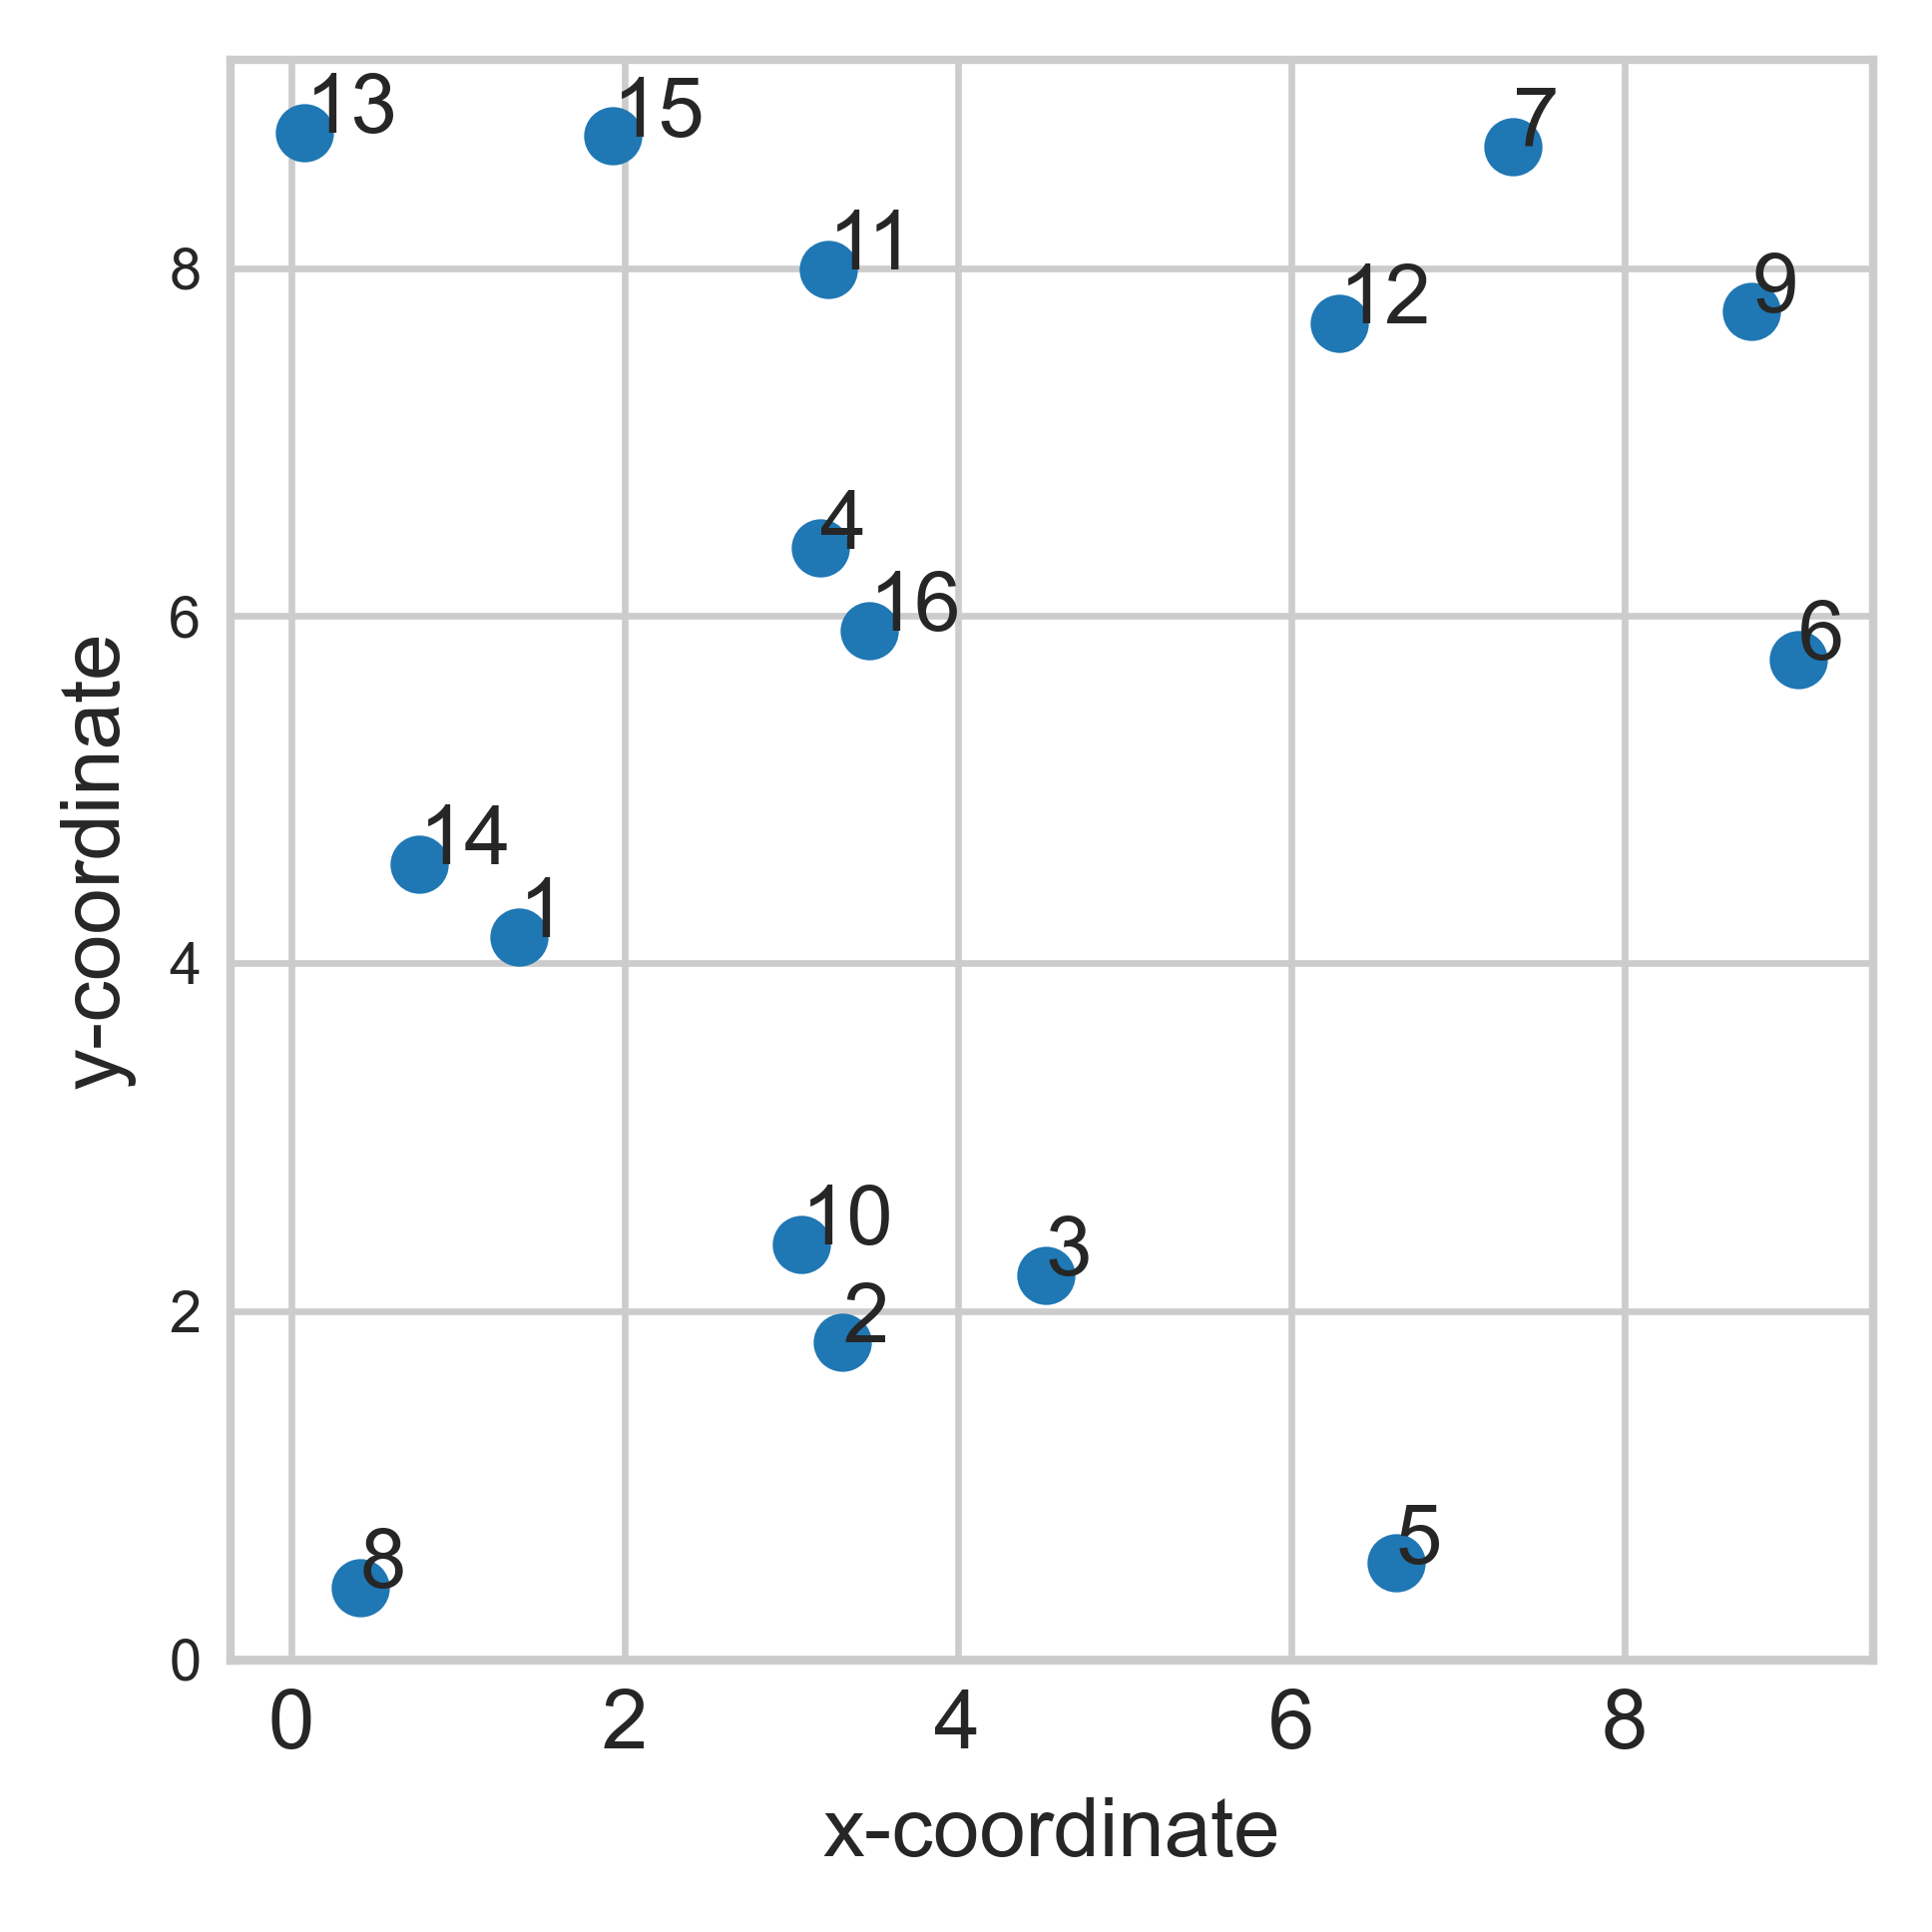

In [8]:
plt.rc('ytick', labelsize='x-small')
fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
plt.scatter(Samp_location_X[0,:,0], Samp_location_Y[0,:,0], label='WSN Layout', marker='o')
for index in range(N):
    plt.text(x=Samp_location_X[0,index,0],y=Samp_location_Y[0,index,0], s= index+1)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

In [8]:
#DEFINING THE FUNCTION TO OBTAIN WEIGHT FOR EACH NODE'S NN
def Dnn_Out(DNN_INPUT):
    #DNN_INPUT IS AN N X 2(N-1) MATRIX OF INPUT DATA
    Net_Weight={}
    Net_Weight[0] = model.T0_forward(DNN_INPUT[0:1,:]).reshape(1, (N-1))
    Net_Weight[1] = model.T1_forward(DNN_INPUT[1:2,:]).reshape(1, (N-1))
    Net_Weight[2] = model.T2_forward(DNN_INPUT[2:3,:]).reshape(1, (N-1))
    Net_Weight[3] = model.T3_forward(DNN_INPUT[3:4,:]).reshape(1, (N-1))
    Net_Weight[4] = model.T4_forward(DNN_INPUT[4:5,:]).reshape(1, (N-1))
    Net_Weight[5] = model.T5_forward(DNN_INPUT[5:6,:]).reshape(1, (N-1))
    Net_Weight[6] = model.T6_forward(DNN_INPUT[6:7,:]).reshape(1, (N-1))
    Net_Weight[7] = model.T7_forward(DNN_INPUT[7:8,:]).reshape(1, (N-1))
    Net_Weight[8] = model.T8_forward(DNN_INPUT[8:9,:]).reshape(1, (N-1))
    Net_Weight[9] = model.T9_forward(DNN_INPUT[9:10,:]).reshape(1, (N-1))
    Net_Weight[10] = model.T10_forward(DNN_INPUT[10:11,:]).reshape(1, (N-1))
    Net_Weight[11] = model.T11_forward(DNN_INPUT[11:12,:]).reshape(1, (N-1))
    Net_Weight[12] = model.T12_forward(DNN_INPUT[12:13,:]).reshape(1, (N-1))
    Net_Weight[13] = model.T13_forward(DNN_INPUT[13:14,:]).reshape(1, (N-1))
    Net_Weight[14] = model.T14_forward(DNN_INPUT[14:15,:]).reshape(1, (N-1))
    Net_Weight[15] = model.T15_forward(DNN_INPUT[15:16,:]).reshape(1, (N-1))
    
    return Net_Weight

In [9]:
def classical1(node,Currenttime, Dnn_diff, weight):
# Dnn-diffis the phse difference vector 
#     diff=Dnn_diff.clone()
    prod=torch.sum(Dnn_diff* weight)
    t_next=Currenttime.item() +Tnode[node].item() + Eps0*prod #evaluates the next timestamp for node 0, i.e., t[0,i+1]
    return t_next 

In [11]:
#DEFINING THE FUNCTION TO OBTAIN WEIGHT FOR EACH NODE'S NN
def Dnn_OutMulti(DNN_INPUT):
    #DNN_INPUT IS AN N X 2(N-1) MATRIX OF INPUT DATA
    Net_Weight={}
    Net_Weight[0] = model.T0_forward(DNN_INPUT[:,0,:]).reshape(samp_batch, (N-1))
    Net_Weight[1] = model.T1_forward(DNN_INPUT[:,1,:]).reshape(samp_batch, (N-1))
    Net_Weight[2] = model.T2_forward(DNN_INPUT[:,2,:]).reshape(samp_batch, (N-1))
    Net_Weight[3] = model.T3_forward(DNN_INPUT[:,3,:]).reshape(samp_batch, (N-1))
    Net_Weight[4] = model.T4_forward(DNN_INPUT[:,4,:]).reshape(samp_batch, (N-1))
    Net_Weight[5] = model.T5_forward(DNN_INPUT[:,5,:]).reshape(samp_batch, (N-1))
    Net_Weight[6] = model.T6_forward(DNN_INPUT[:,6,:]).reshape(samp_batch, (N-1))
    Net_Weight[7] = model.T7_forward(DNN_INPUT[:,7,:]).reshape(samp_batch, (N-1))
    Net_Weight[8] = model.T8_forward(DNN_INPUT[:,8,:]).reshape(samp_batch, (N-1))
    Net_Weight[9] = model.T9_forward(DNN_INPUT[:,9,:]).reshape(samp_batch, (N-1))
    Net_Weight[10] = model.T10_forward(DNN_INPUT[:,10,:]).reshape(samp_batch, (N-1))
    Net_Weight[11] = model.T11_forward(DNN_INPUT[:,11,:]).reshape(samp_batch, (N-1))
    Net_Weight[12] = model.T12_forward(DNN_INPUT[:,12,:]).reshape(samp_batch, (N-1))
    Net_Weight[13] = model.T13_forward(DNN_INPUT[:,13,:]).reshape(samp_batch, (N-1))
    Net_Weight[14] = model.T14_forward(DNN_INPUT[:,14,:]).reshape(samp_batch, (N-1))
    Net_Weight[15] = model.T15_forward(DNN_INPUT[:,15,:]).reshape(samp_batch, (N-1))
    
    
    return Net_Weight

In [12]:
def classicalMulti1(index,Data, DnnWeight):
# ind is time index
# Traindata is the entire data for all nodes
# Weight is the entire dictionary of dnn o/p for all nodes
    weightdict={}
    loc_lossNN={}
#     for node in range(N):
#         for samp in range(samp_batch):
#             loc_lossNN[samp, node]=0
            
    for node in range(N):
#         weightdict[node]=DnnWeight[node]
        for samp in range(samp_batch):
            NodeInst_time=classical1(node,Samp_timenump[samp,node,index], Data[samp,node,0:N-1], DnnWeight[node][samp])
            Samp_timenump[samp,node,index+1]=NodeInst_time.cpu().detach().numpy() #Saving a detached version of the successive time
            loc_lossNN[samp,node] = lossfn1(Sys_Data[samp, index+1,node,0:N-1],NodeInst_time)
    return loc_lossNN

In [6]:
Samp_timenump=np.zeros((Samplesize,N,TT))
Samp_timenump[:,:,0]=Samp_t[:,:,0].detach().numpy()
#training using mini-batch
torch.autograd.set_detect_anomaly(True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.3, momentum=0.99)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

epoch_size=2
tot_SampleLoss=[]
Sys_Data=torch.tensor(load('MydataOffline0_1000samples.npy')).to(device).requires_grad_(False)
samp_batch=10 #topology samples per batch
# TrainData=torch.zeros(samp_batch,N,2*(N-1)).requires_grad_(False)
# print(id(TrainData))
sumloss_node={}
# local_lossNN=torch.zeros(samp_batch,N)
for epoch in range(epoch_size):
    print('epoch', epoch)
    for batch in range(100):#should be 100
        epoch_lossNN={}
        for nn in range(N):
            epoch_lossNN[nn]=0
#         lgcoulgcountnt=0
    
        for i in range(Tbatch-1):
            TrainData=Sys_Data[batch*samp_batch:(batch*samp_batch+samp_batch),i,:,:].clone()
            #obtain phase difference for non-zero received times.
            for samp in range(samp_batch):
                for node in range(N):
                    for ind in range(N-1):
                        if (TrainData[samp,node,ind]!=0):
                            TrainData[samp,node,ind]=TrainData[samp,node,ind].item()-Samp_timenump[samp,node,i]
                        else:
                            TrainData[samp,node,ind]=0
        
        
            Weight= Dnn_OutMulti(TrainData) #does the forward pass to produce softmax o/p
            lgtensor=(2+i)
            local_lossNN= classicalMulti1(i,TrainData, Weight)
            for node in range(N):
                sumloss_node[node]=0
                for sample in range(samp_batch):
                    sumloss_node[node]=sumloss_node[node]+local_lossNN[sample,node]
                epoch_lossNN[node] = epoch_lossNN[node] +math.log(lgtensor)*(sumloss_node[node]/samp_batch)

        sumloss=sum(epoch_lossNN.values())        
        tot_SampleLoss.append(sumloss)
            
        #     optimizer.zero_grad()
        for param in model.parameters():
            param.grad = None
            
        for node in range(N):
            epoch_lossNN[node].backward()
        print(sumloss.cpu().detach().numpy())  
    
        optimizer.step()
        scheduler.step()


epoch 0
9.753121e-05
0.00047522373
0.0007440116
0.00069360127
0.0004729504
0.00086261454
0.00073126575
0.0010067374
0.0009633169
0.0007485852
0.00056079903
0.00052318425
0.00043200777
0.0008669142
0.001015699
0.0008464913
0.00070142804
0.00046876914
0.0009251113
0.0008248843
0.0007125007
0.00052285794
0.00088812126
0.00084046053
0.001199987
0.00048619442
0.0005669463
0.00045038847
0.0008989568
0.0013189072
0.00097085553
0.00051542267
0.0007262985
0.0006006793
0.00043289704
0.0008793533
0.0009370549
0.0004809951
0.00093593495
0.0010670605
0.00029808184
0.0005916944
0.0008493926
0.00063545967
0.0008460887
0.00039729144
0.0007123654
0.0008989037
0.00088190933
0.00048392167
0.0008425155
0.0008839263
0.0004227143
0.000688395
0.000687333
0.00033506585
0.00084458466
0.0007252624
0.0008056151
0.00073849387
0.00053927593
0.0005140454
0.0007694661
0.0007034929
0.0009959574
0.00056604523
0.000521219
0.0010612279
0.0007006882
0.000670281
0.0005294935
0.0006142679
0.000981036
0.00066319545
0.000500

In [7]:
# torch.save(model.state_dict(), 'mymodelweightOfflinesmultiple_only.pth')

### TESTING THE MODEL ON A NEW SET OF TOPOLOGIES

In [13]:
model.load_state_dict(torch.load('mymodelweightOfflinesmultiple_only.pth'))

<All keys matched successfully>

In [14]:
# location_X=X_max*np.random.rand(N,1)
# location_Y=Y_max*np.random.rand(N,1)
# save('mycoordinateX_TestOffline.npy',location_X)
# save('mycoordinateY_TestOffline.npy',location_Y)
# initialtime=0.005*np.random.rand(N,1)
# save('myinitial_time_TestOffline.npy',initialtime)

In [14]:
timenump=np.zeros((N,TT))
timenump[:,0]=load('myinitial_time_TestOffline.npy').reshape(1, (N))
#lOADING EXAMPLE PARAMETERS AS TENSORS
location_X=torch.tensor(load('mycoordinateX_TestOffline.npy')) #X Co-ordinates of all the nodes

location_Y=torch.tensor(load('mycoordinateY_TestOffline.npy')) #Y Co-ordinates of al the nodes

#Allocating the different node distance randomly
Distance_matrix=torch.zeros((N,N))
for i in range(N):
    for j in range(i+1, N):
        Distance_matrix[i,j]=1000*torch.sqrt(torch.square(location_X[j]-location_X[i])+torch.square(location_Y[j]-location_Y[i]))
        Distance_matrix[j,i]=Distance_matrix[i,j]

#Evaluating the time of flight across different node distances 
TimeOfFlight_Matrix = torch.zeros((N,N))

for ii in range (N):
    for jj in range (N):
        TimeOfFlight_Matrix[ii,jj]=Distance_matrix[ii,jj]/C
        TimeOfFlight_Matrix[jj,ii]=TimeOfFlight_Matrix[ii,jj]

#Generating power RSSI matrix, i.e. Pr
#Row index = receiver, Column index = transmitter
RSSI_Matrix = torch.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i != j :     # If ii=jj the RSSI is infinite
            RSSI_Matrix[i,j] = (Tx_powers[j]*N_height**2)/(Distance_matrix[i,j]**AttExp)
            if RSSI_Matrix[i,j]<p_0:
                RSSI_Matrix[i,j]=0
        elif i == j:
            RSSI_Matrix[i,j] = 0

# Tnode=torch.tensor(load('myNodePeriod.npy'))

# t[:,0]=torch.tensor(load('myinitial_time.npy'))

In [11]:
#Testing for the TT time indexes
diff=torch.zeros(N,N-1)
prod=torch.zeros(1,N)
TT=2800
t_new_test = torch.zeros(N,N)
Nodeintest=torch.zeros(N,2*(N-1))
for i in range(TT):
    for ii in range(N):
        for jj in range(N):
            with torch.no_grad():
                t_new_test[ii,jj]=torch.tensor(timenump[ii,i]) + TimeOfFlight_Matrix[ii,jj].clone()
                if (RSSI_Matrix[ii,jj]==0 and ii!=jj):
                    t_new_test[ii,jj]=0
    
    for b in range(N):
        Node=torch.cat([t_new_test[0:b,b],t_new_test[b+1:,b],RSSI_Matrix[b,0:b],RSSI_Matrix[b,b+1:]]) #let the NN TAKE IN JUST THE TIME AND NOT THE DIFFERENCE
        Nodeintest[b,:]=Node
        #Setting the input phase difference to be zero for uncoupled nodes
    for b in range(N): 
        for ind in range(N-1):
            if Nodeintest[b,ind]!=0:
                Nodeintest[b,ind]=Nodeintest[b,ind]-timenump[b,i]
            else:
                Nodeintest[b,ind]=0
               
    if i<=TT-2:
        Weight_Test=Dnn_Out(Nodeintest[:,:])
#         for node in range(N):
#             NN_weight[node,:]=Weight_Test[node]
            
        
        for node in range(N):
            diff[node,:]=Nodeintest[node,0:N-1].reshape(1, (N-1))
            prod[0,node]=torch.sum(diff[node,:]* Weight_Test[node])
            timenump[node,i+1]=timenump[node,i] +Tnode[node].item() + Eps0*prod[0,node] 
        
        

NameError: name 'per_var' is not defined

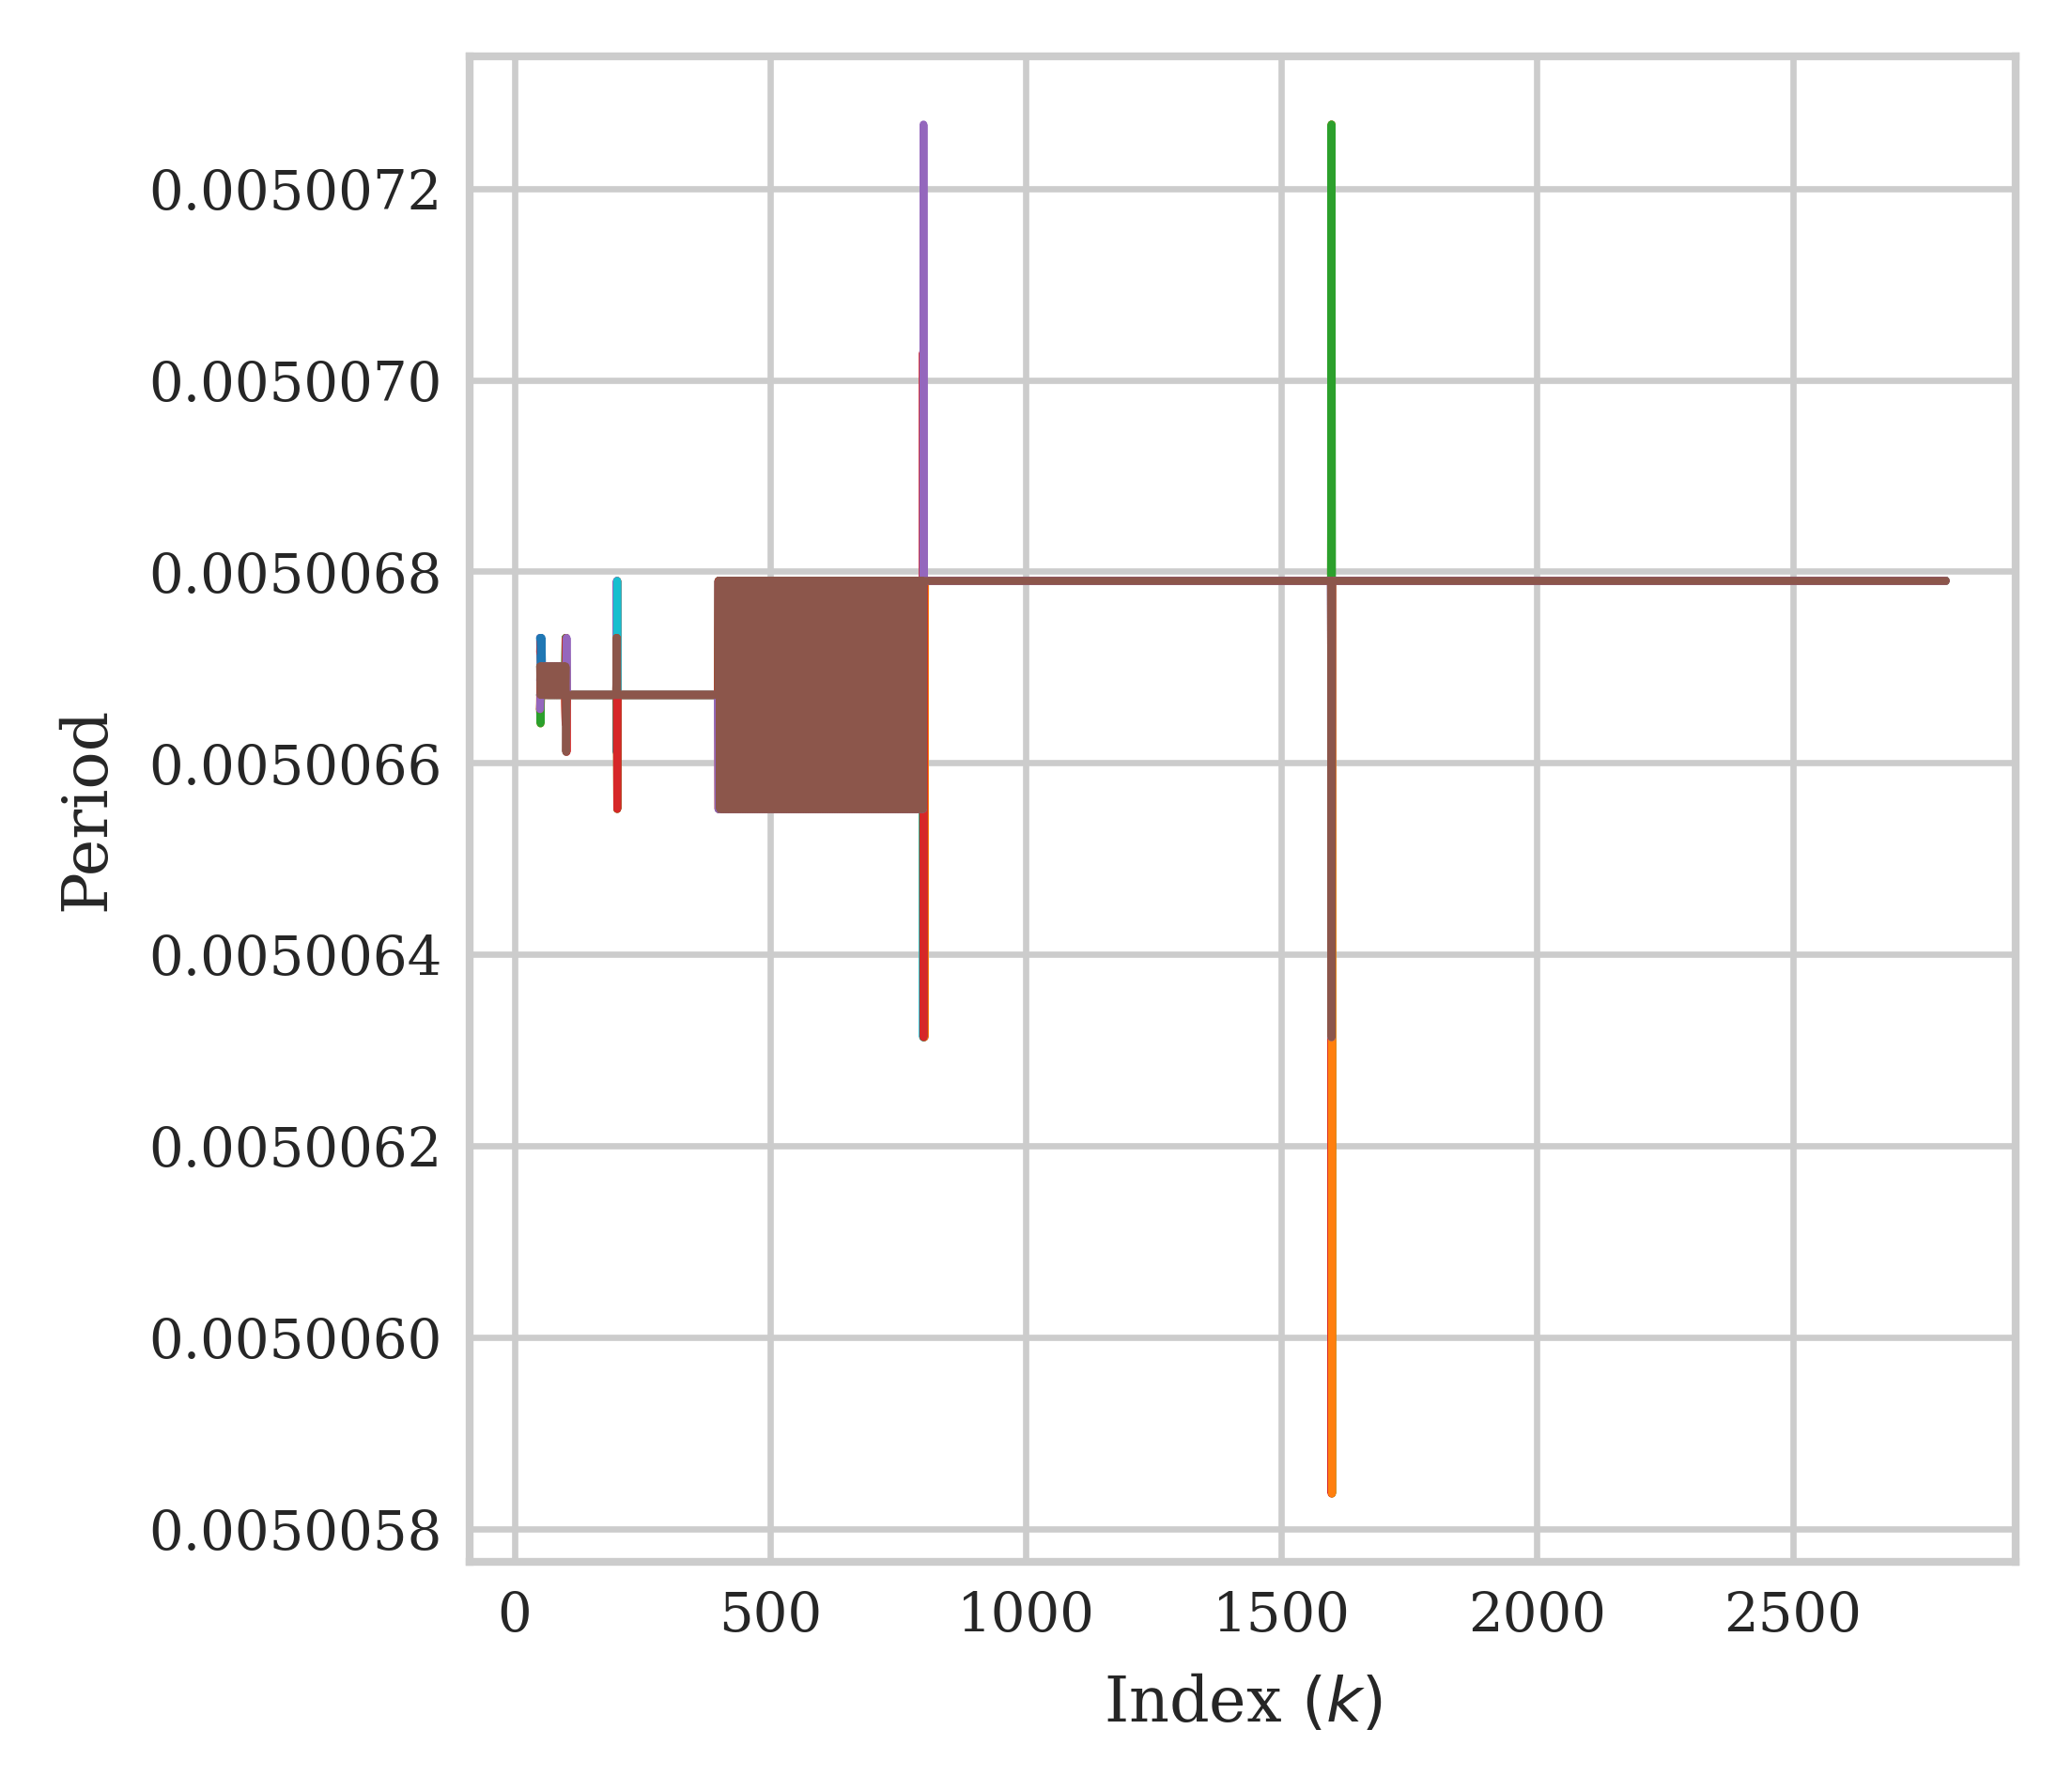

<Figure size 3600x2400 with 0 Axes>

In [12]:
#plot period
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
period=torch.zeros(N,TT)
per_std=torch.zeros(TT)
per_mean=torch.zeros(TT)
for ind in range(TT):
    for i in range(N):
        if ind==0:
            period[i,ind]=torch.tensor(timenump[i,ind])
        else:
            period[i,ind]=torch.tensor(timenump[i,ind])-torch.tensor(timenump[i,ind-1])
    per_mean[ind]= torch.mean(period[:,ind])
    per_std[ind]=torch.std(period[:,ind])


for node in range(N):
    plt.plot(range(50,TT),(period[node,50:TT]), linewidth=1)
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('Period', fontsize=8)


print("period is", per_mean[2799].detach().numpy())

#MEAN OF THE VARIANCE NORMALIZED TO THE CLOCK
mean_per_var=torch.mean(per_var)/Time_res
print(per_std[2799])

Text(0, 0.5, '$\\phi_i(k)$ mod $T_{c,DNN}(2799)$')

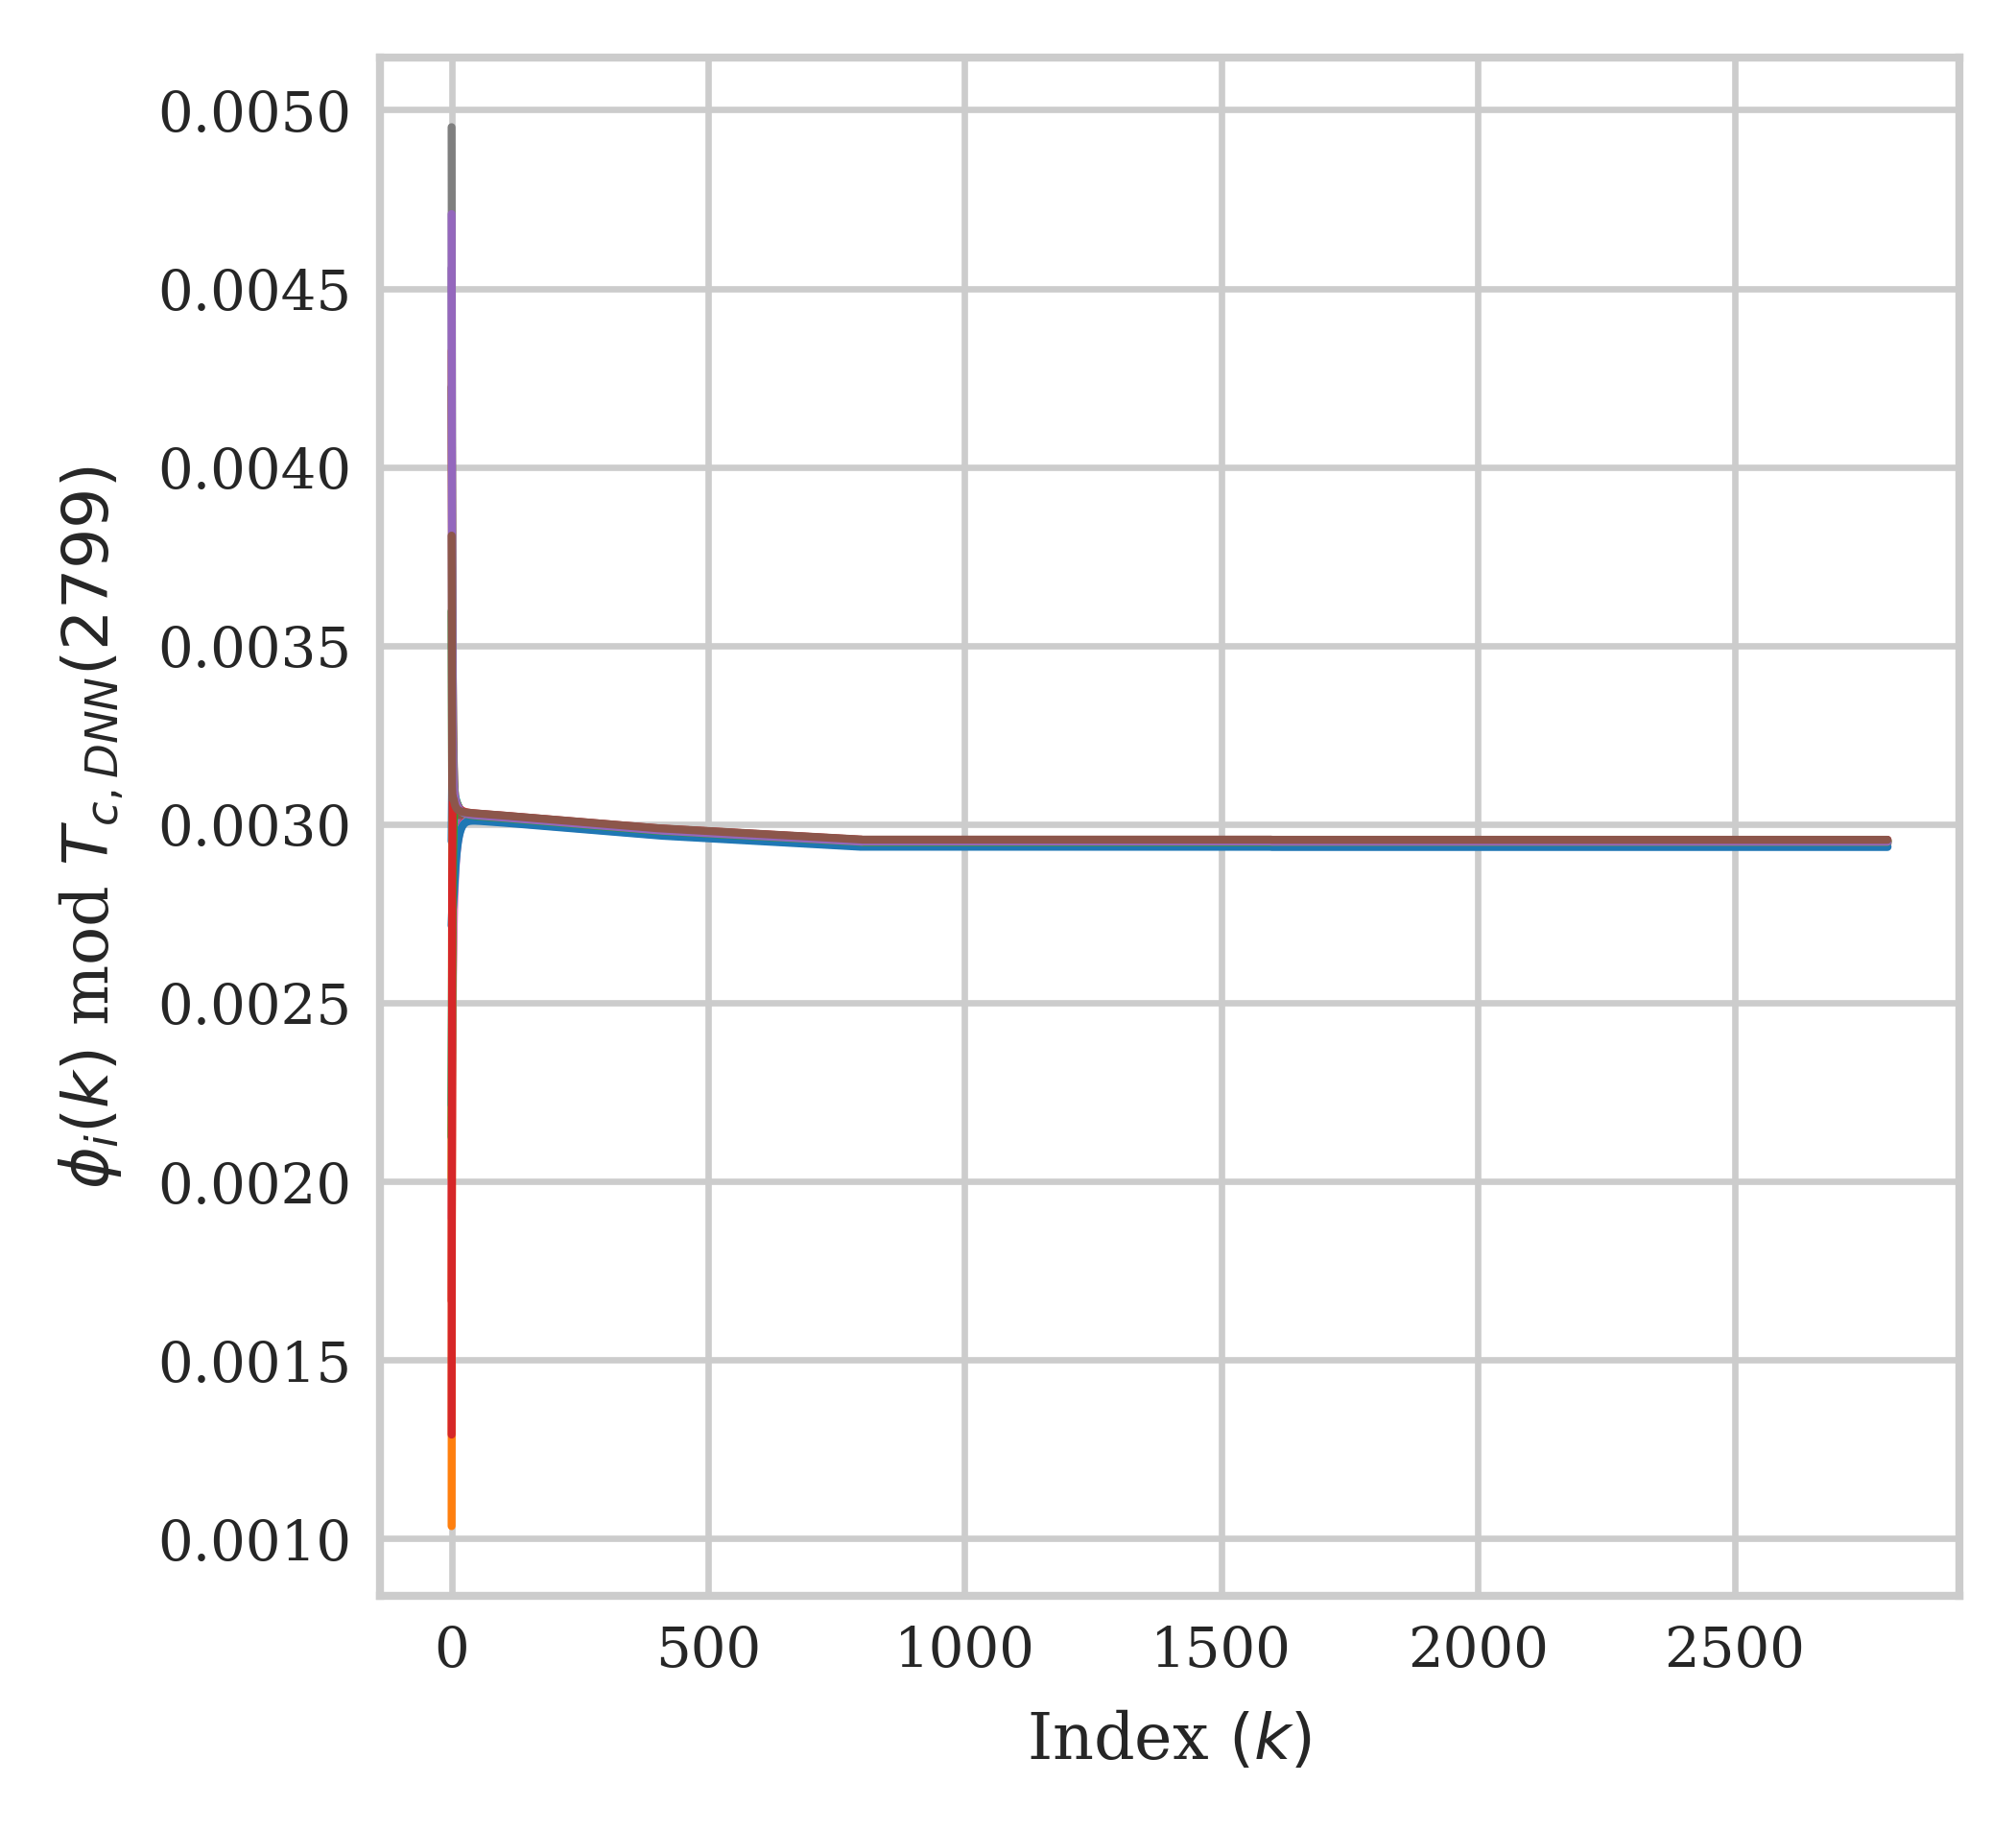

In [13]:
# MODULO PLOT
modulo=np.zeros((N,TT))

fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
# per_mean_exp[9,0]=torch.mean(torch.tensor(time_exp[exp,0,:,1215]-time_exp[exp,0,:,1214]))

for ind in range(TT):
    for node in range (N):
        modulo[node,ind]=timenump[node,ind]%per_mean[2799]

for node in range(N):
    plt.plot(modulo[node,0:2799], linewidth=1)
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('$\phi_i(k)$ mod $T_{c,DNN}(2799)$', fontsize=8)
# plt.legend(['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16',],loc="upper left",fontsize='8')

mean_norm_delay= 0.0006428571359720081
STD_norm_delay= 0.00111244250105919


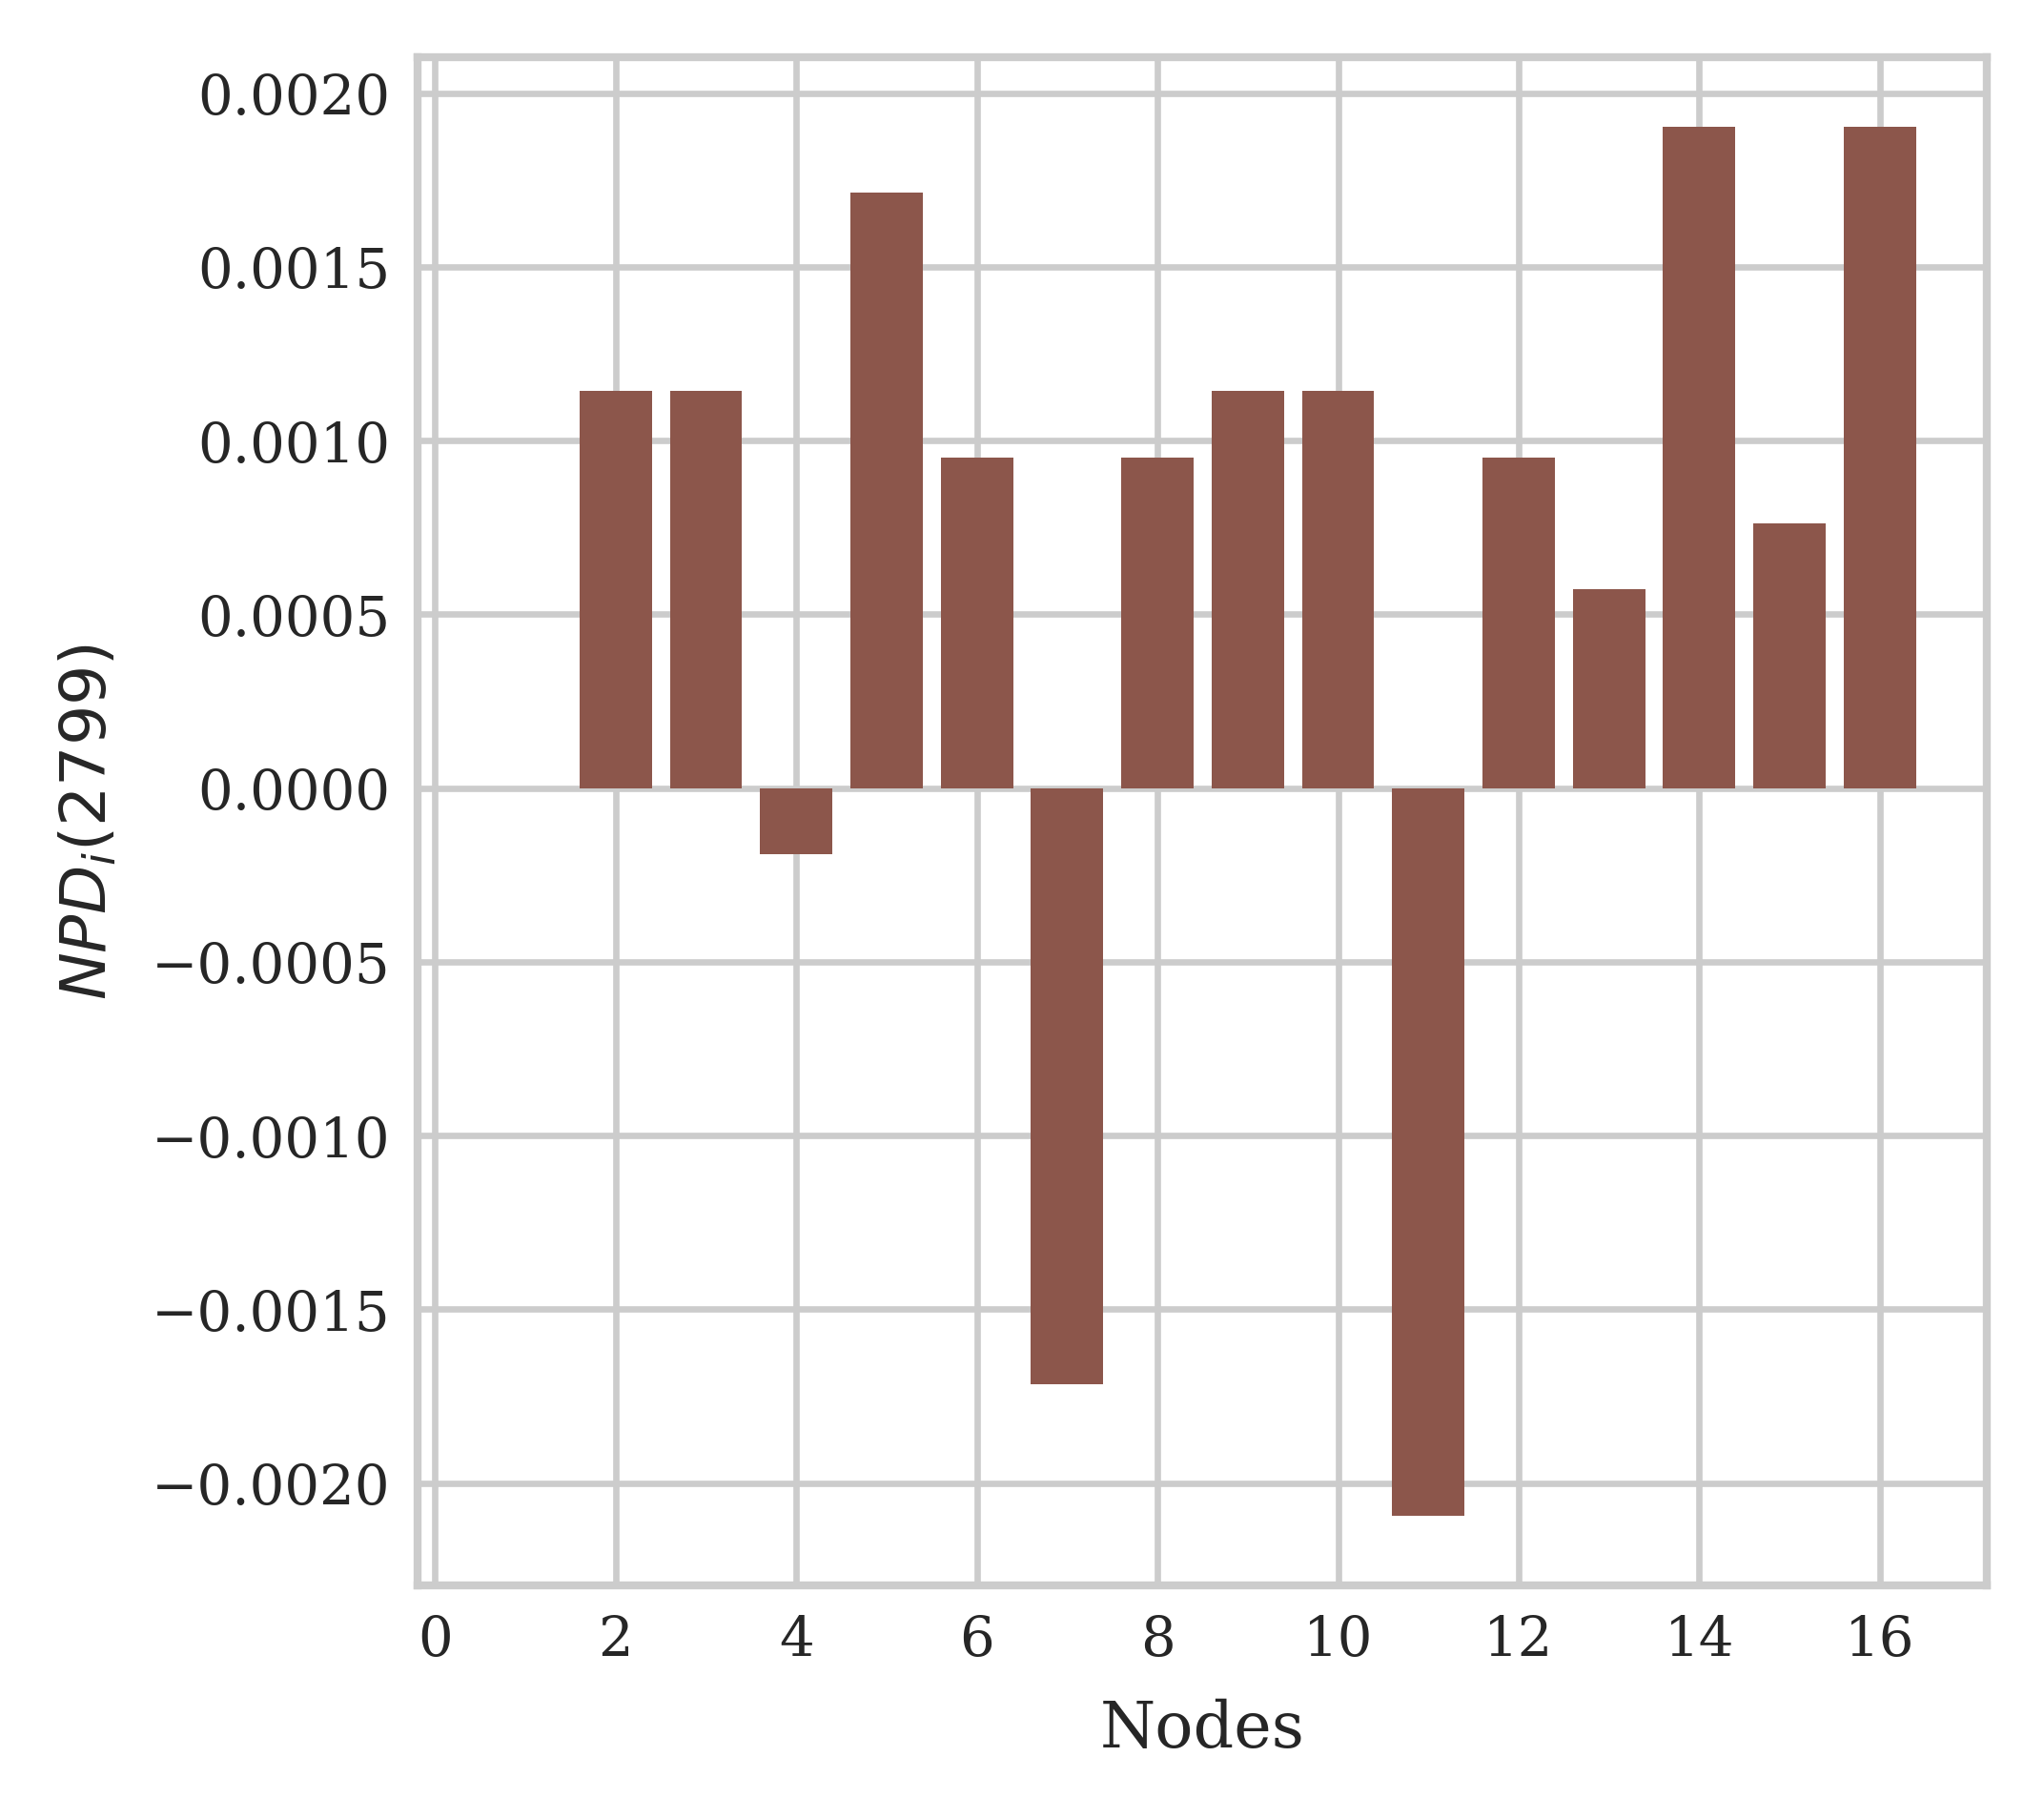

In [60]:
#npd_i(2799)
norm_delay=np.empty([N,1])
# print(norm_delay)

for node in range(N):
    norm_delay[node]=(timenump[node,2799]-timenump[0,2799])/per_mean[2799]
    
fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)

for node in range(N):
    plt.bar(range(N)+np.ones(N),norm_delay[:,0])
plt.xlabel('Nodes', fontsize=8)
plt.ylabel('$NPD_i(2799)$', fontsize=8)

mean_norm_delay=np.mean(norm_delay)
STD_norm_delay=np.std(norm_delay)
print('mean_norm_delay=', mean_norm_delay)
print('STD_norm_delay=', STD_norm_delay)

Text(0.5, 0, 'Index $(k)$')

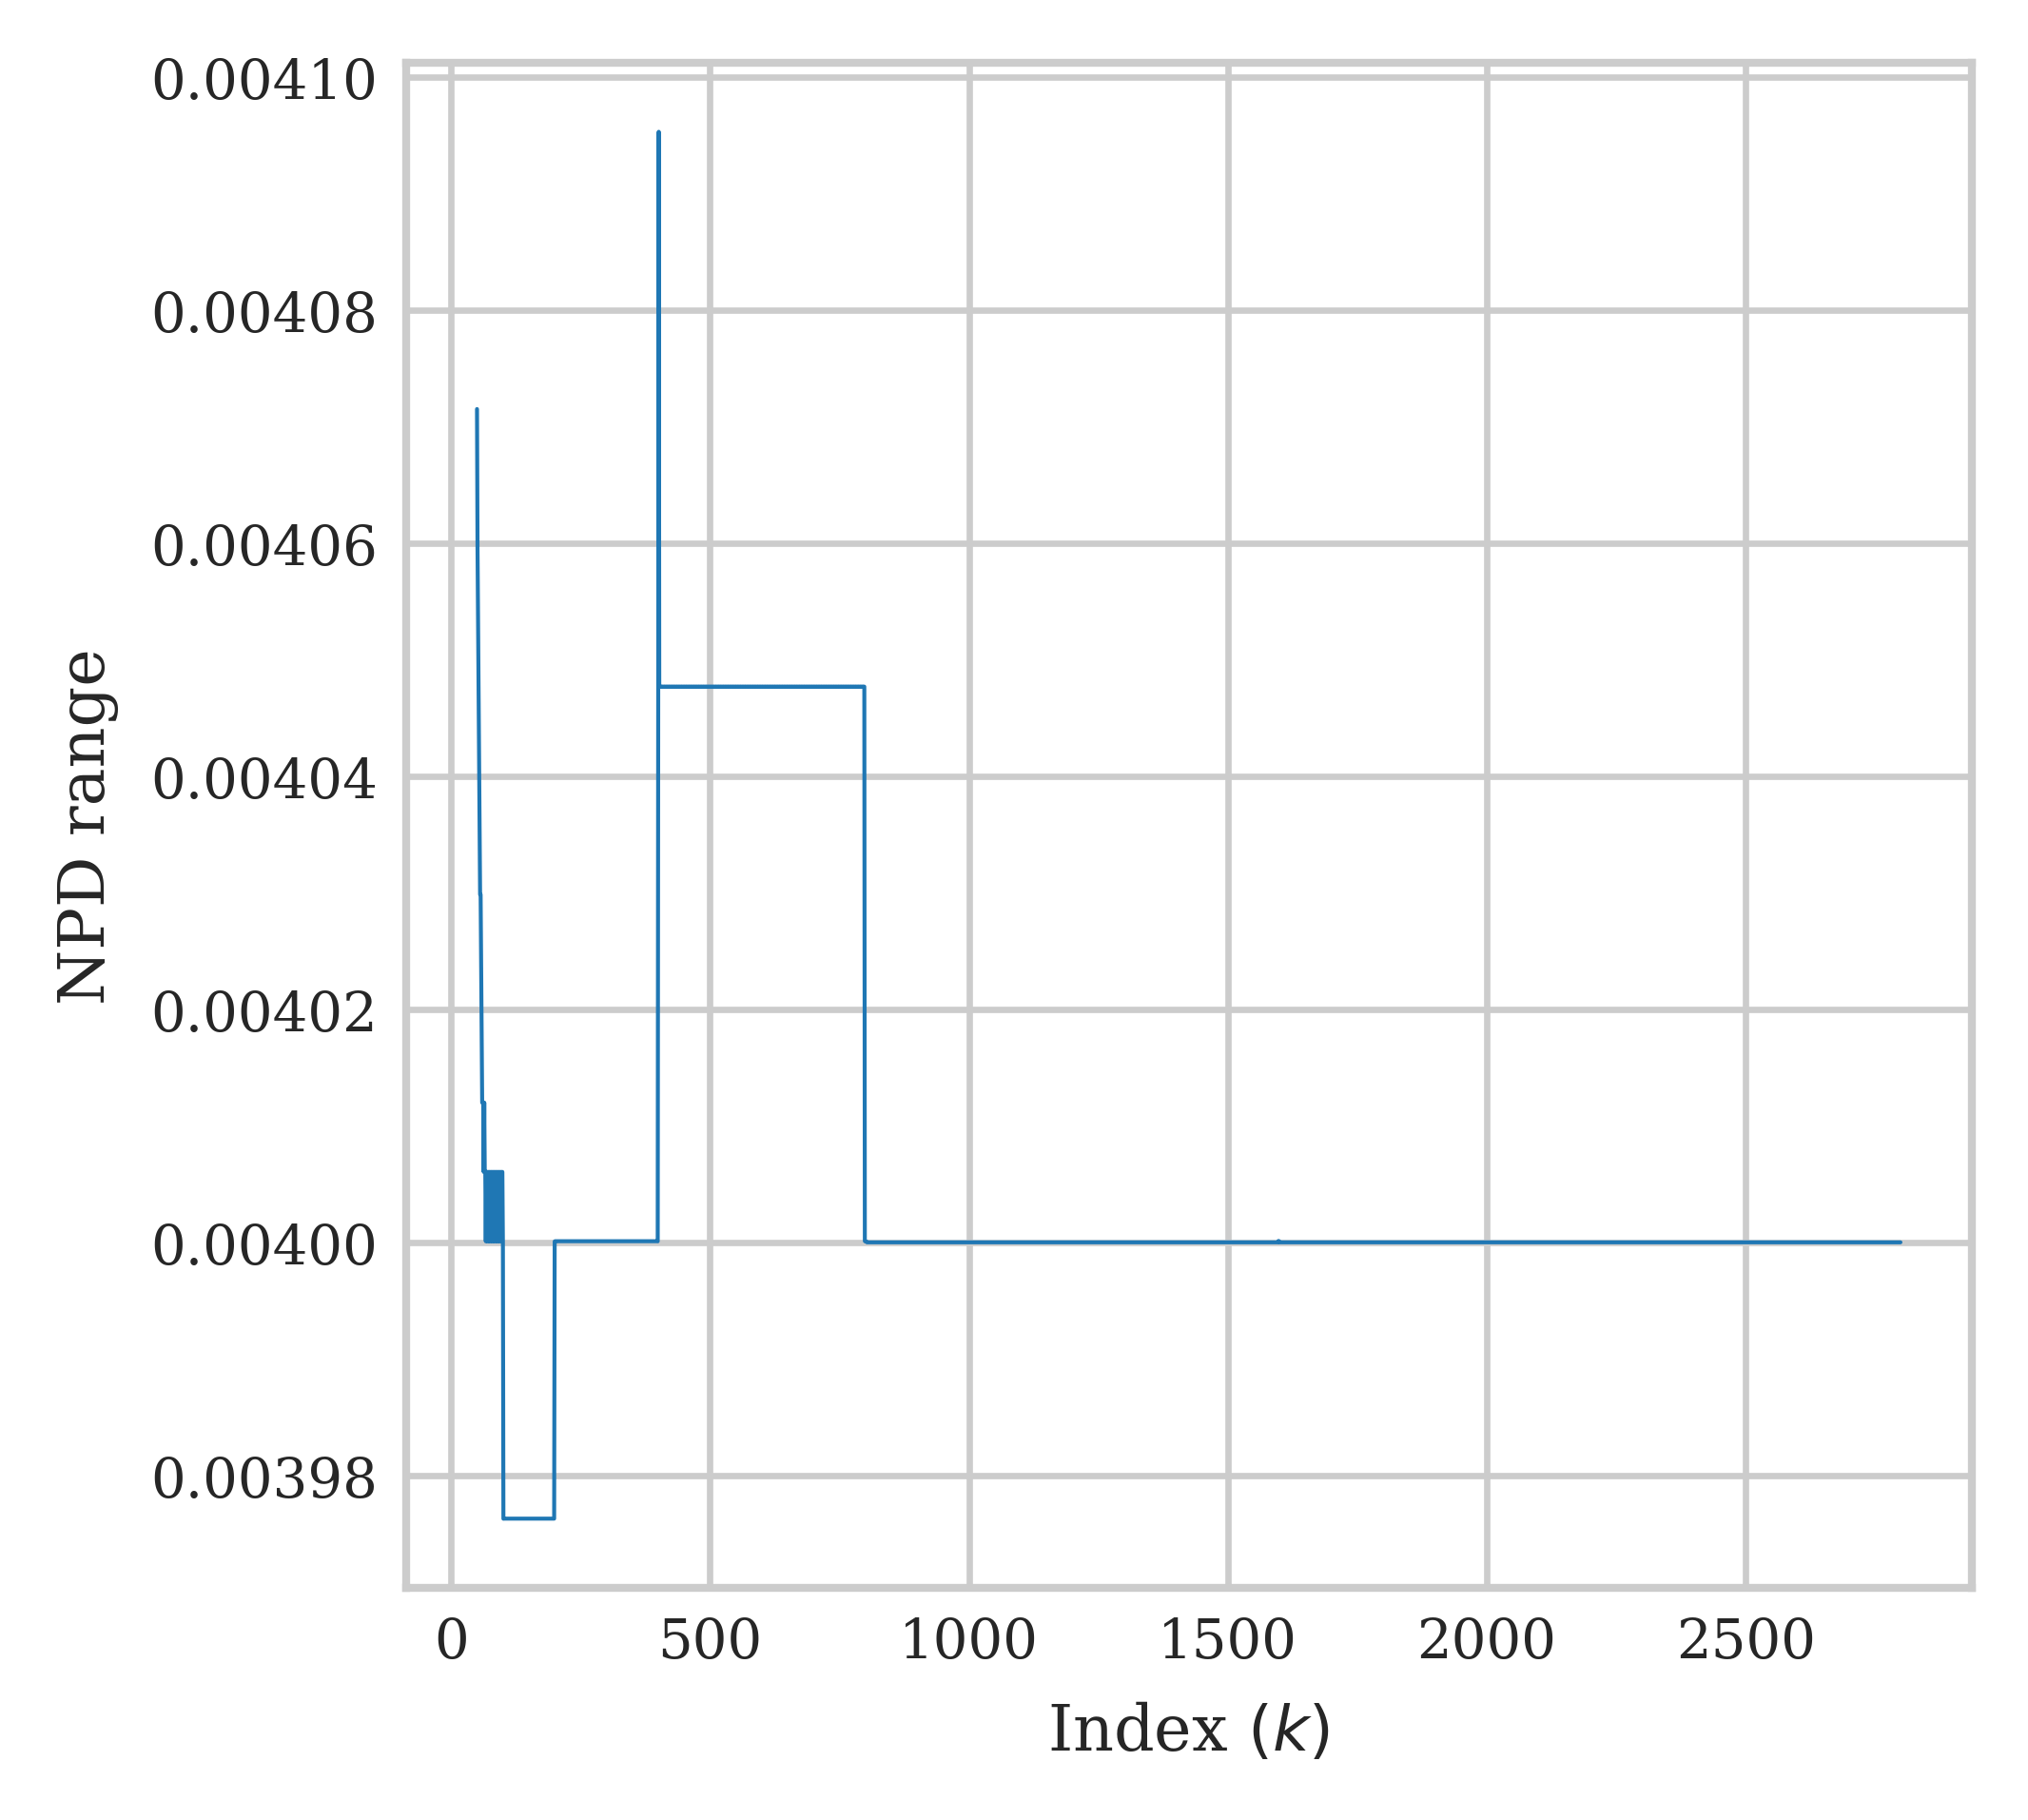

In [14]:
# NPD range
MAT_norm_delay=np.zeros([N,TT])
MAT_Delay_spread=np.zeros((1,TT))
for ind in range(TT):
    for node in range(N):
        MAT_norm_delay[node,ind]=(timenump[node,ind]-timenump[0,ind])/per_mean[ind]
    MAT_Delay_spread[0,ind]=np.amax(MAT_norm_delay[:,ind])-np.amin(MAT_norm_delay[:,ind])
fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
plt.plot(range(50,TT),torch.tensor(MAT_Delay_spread[0,50:TT]), linewidth=0.5)
plt.ylabel('NPD range', fontsize=8)
plt.xlabel('Index $(k)$', fontsize=8)


### TESTING WITH MOBILITY WITH WALKING SPEED 1KM AND DIFF DIRECTION PER MOBILE NODE

In [15]:
#lOADING EXAMPLE PARAMETERS AS TENSORS
location_X=torch.zeros((N,1))
location_X[:,:]=torch.tensor(load('mycoordinateX.npy')) #X Co-ordinates of all the nodes

location_Y=torch.zeros((N,1))
location_Y[:,:]=torch.tensor(load('mycoordinateY.npy')) #Y Co-ordinates of al the nodes

# for time in range(1,TT):
#     location_X[time,:,:]=location_X[0,:,:]
#     location_Y[time,:,:]=location_Y[0,:,:]

#Allocating the different node distance randomly
Distance_matrix=torch.zeros((N,N))
for i in range(N):
    for j in range(i+1, N):
        Distance_matrix[i,j]=1000*torch.sqrt(torch.square(location_X[j,0]-location_X[i,0])+torch.square(location_Y[j,0]-location_Y[i,0]))
        Distance_matrix[j,i]=Distance_matrix[i,j]

# Distance_matrix[1:Tbatch,:,:]=Distance_matrix[0,:,:]

#Evaluating the time of flight across different node distances 
TimeOfFlight_Matrix = torch.zeros((N,N))

for ii in range (N):
    for jj in range (N):
        TimeOfFlight_Matrix[ii,jj]=Distance_matrix[ii,jj]/C
        TimeOfFlight_Matrix[jj,ii]=TimeOfFlight_Matrix[ii,jj]

# TimeOfFlight_Matrix[1:Tbatch,:,:]=TimeOfFlight_Matrix[0,:,:] #check this line

#Generating power RSSI matrix, i.e. Pr
#Row index = receiver, Column index = transmitter
RSSI_Matrix = torch.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i != j :     # If ii=jj the RSSI is infinite
            RSSI_Matrix[i,j] = (Tx_powers[j]*N_height**2)/(Distance_matrix[i,j]**AttExp)
            if RSSI_Matrix[i,j]<p_0:
                RSSI_Matrix[i,j]=0
        elif i == j:
            RSSI_Matrix[i,j] = 0

# RSSI_Matrix[1:Tbatch,:,:]=RSSI_Matrix[0,:,:]
            
Tnode=load('myNodePeriod.npy')

timey=load('clockphase_fixedtrainFixedtest.npy')
timenump=np.zeros((N,TT))
timenump[:,0:Tbatch]=timey[:,0:Tbatch]

In [16]:
speed=71.45 #defining walking speed of movement for some nodes
#Testing with the other time indexes and including mobility
# Nodeintest=torch.zeros(TT, N,2*N)
t_new = torch.zeros(N,N)
Nodeintest=torch.zeros((TT,N,2*(N-1)))
start=1
stop=TT
N_EXP=10
N_RESET=5 #Number of reset nodes in an iteration
# missclk=np.array([8, 15, 3, 6, 5])
# print(missclk)
MAT_location_X=np.zeros((N_EXP,TT,N,1))
MAT_location_Y=np.zeros((N_EXP,TT,N,1))
MAT_timenump=np.zeros((N_EXP,1,N,TT))
MAT_Distance_matrix=np.zeros((N_EXP,TT,N,N))
MAT_TimeOfFlight_Matrix =np.zeros((N_EXP,TT,N,N))
MAT_RSSI_Matrix=np.zeros((N_EXP,TT,N,N))
NN_weight=torch.zeros(N,(N-1))
diff=torch.zeros(N,N-1)
prod=torch.zeros(1,N)


for exp in range(N_EXP):
    for index in range(TT):
        MAT_location_X[exp,index,:,:]=location_X[:,:]
        MAT_location_Y[exp,index,:,:]=location_Y[:,:]

for exp in range(N_EXP):
    for index in range(1):
        MAT_timenump[exp,0,:,index]=timenump[:,index]
        MAT_Distance_matrix[exp,index,:,:]=Distance_matrix[:,:]
        MAT_TimeOfFlight_Matrix[exp,index,:,:]=TimeOfFlight_Matrix[:,:]
        MAT_RSSI_Matrix[exp,index,:,:] = RSSI_Matrix[:,:]


MAT_missclk=load('movingnodesetperexperiment_fixedtrain_walk1km.npy')
Theta=load('AngleOfMovement_fixedtrain_walk1km.npy')


for exp in range(N_EXP):
    print(exp)
#     MAT_missclk.append(np.array(random.sample(range(N),5)))
#     Theta[exp,:]=np.radians(random.sample(range(360),5))
    for i in range(start,stop):
        deg_ind=0
        for ncnt in MAT_missclk[exp]:
            MAT_location_X[exp,i,ncnt,0]=MAT_location_X[exp,i-1,ncnt,0]+(speed*Time_res/1000)*math.cos(Theta[exp,deg_ind])
            MAT_location_Y[exp,i,ncnt,0]=MAT_location_Y[exp,i-1,ncnt,0]+(speed*Time_res/1000)*math.sin(Theta[exp,deg_ind])
            


        #Allocating the different node distance randomly for ii in range(N):
        for ii in range(N):
            for jj in range(ii+1, N):
                MAT_Distance_matrix[exp,i,ii,jj]=1000*np.sqrt(np.square(MAT_location_X[exp,i,jj,0]-MAT_location_X[exp,i,ii,0])+np.square(MAT_location_Y[exp,i,jj,0]-MAT_location_Y[exp,i,ii,0]))
                MAT_Distance_matrix[exp,i,jj,ii]=MAT_Distance_matrix[exp,i,ii,jj]


        #Evaluating the time of flight across different node distances 
        for ii in range (N):
            for jj in range (N):
                MAT_TimeOfFlight_Matrix[exp,i,ii,jj]=MAT_Distance_matrix[exp,i,ii,jj]/C
                MAT_TimeOfFlight_Matrix[exp,i,jj,ii]=MAT_TimeOfFlight_Matrix[exp,i,ii,jj]
         
        #Generating power RSSI matrix, i.e. Pr
        for ii in range(N):
            for jj in range(N):
                if ii != jj :     # If ii=jj the RSSI is infinite
                    MAT_RSSI_Matrix[exp,i,ii,jj] = (Tx_powers[jj]*N_height**2)/(MAT_Distance_matrix[exp,i,ii,jj]**AttExp)
                    if MAT_RSSI_Matrix[exp,i,ii,jj]<p_0:
                        MAT_RSSI_Matrix[exp,i,ii,jj]=0
                elif ii == jj:
                    MAT_RSSI_Matrix[exp,i,ii,jj] = 0

        #ORGANIZING NEW DATA FOR FORWARD PASS
        for ii in range(N):
            for jj in range(N):
                with torch.no_grad():
                    t_new[ii,jj]=MAT_timenump[exp,0,ii,i]+ MAT_TimeOfFlight_Matrix[exp,i,ii,jj]
                    if (MAT_RSSI_Matrix[exp,i,ii,jj]==0 and ii!=jj):
                        t_new[ii,jj]=0
                        
        for b in range(N):
            Node=torch.cat([t_new[0:b,b],t_new[b+1:,b],torch.tensor(MAT_RSSI_Matrix[exp,i,b,0:b]),torch.tensor(MAT_RSSI_Matrix[exp,i,b,b+1:])]) #let the NN TAKE IN JUST THE TIME AND NOT THE DIFFERENCE
            Nodeintest[i,b,:]=Node.clone()
            #Setting the input phase difference to be zero for uncoupled nodes
        for b in range(N):
            for ind in range(N-1):
                if Nodeintest[i,b,ind]!=0:
                    Nodeintest[i,b,ind]=Nodeintest[i,b,ind]-MAT_timenump[exp,0,b,i]
                else:
                    Nodeintest[i,b,ind]=0

        if i<=TT-2:
            Weight=Dnn_Out(Nodeintest[i,:,:])
            for node in range(N):
                NN_weight[node,:]=Weight[node]
            
        
            for node in range(N):
                diff[node,:]=Nodeintest[i,node,0:N-1].reshape(1, (N-1))
                prod[0,node]=torch.sum(diff[node,:]* NN_weight[node,:])
                MAT_timenump[exp,0,node,i+1]=MAT_timenump[exp,0,node,i] +Tnode[node].item() + Eps0*prod[0,node] 
            



0
1
2
3
4
5
6
7
8
9


In [16]:
#SAVING FOR 1KM DATA

save('locationx_fixedtrain_walkOFFLINE1km.npy',MAT_location_X)
save('locationy_fixedtrain_walkOFFLINE1km.npy',MAT_location_Y)
save('Clockphases_fixedtrain_walkOFFLINE1km.npy',MAT_timenump)
save('AngleOfMovement_fixedtrain_walkOFFLINE1km.npy',Theta)
save('RSSI_fixedtrain_manywalkOFFLINE1km.npy',MAT_RSSI_Matrix)
save('movingnodesetperexperiment_fixedtrain_walkOFFLINE1km.npy',MAT_missclk)

Text(0, 0.5, 'NPD range')

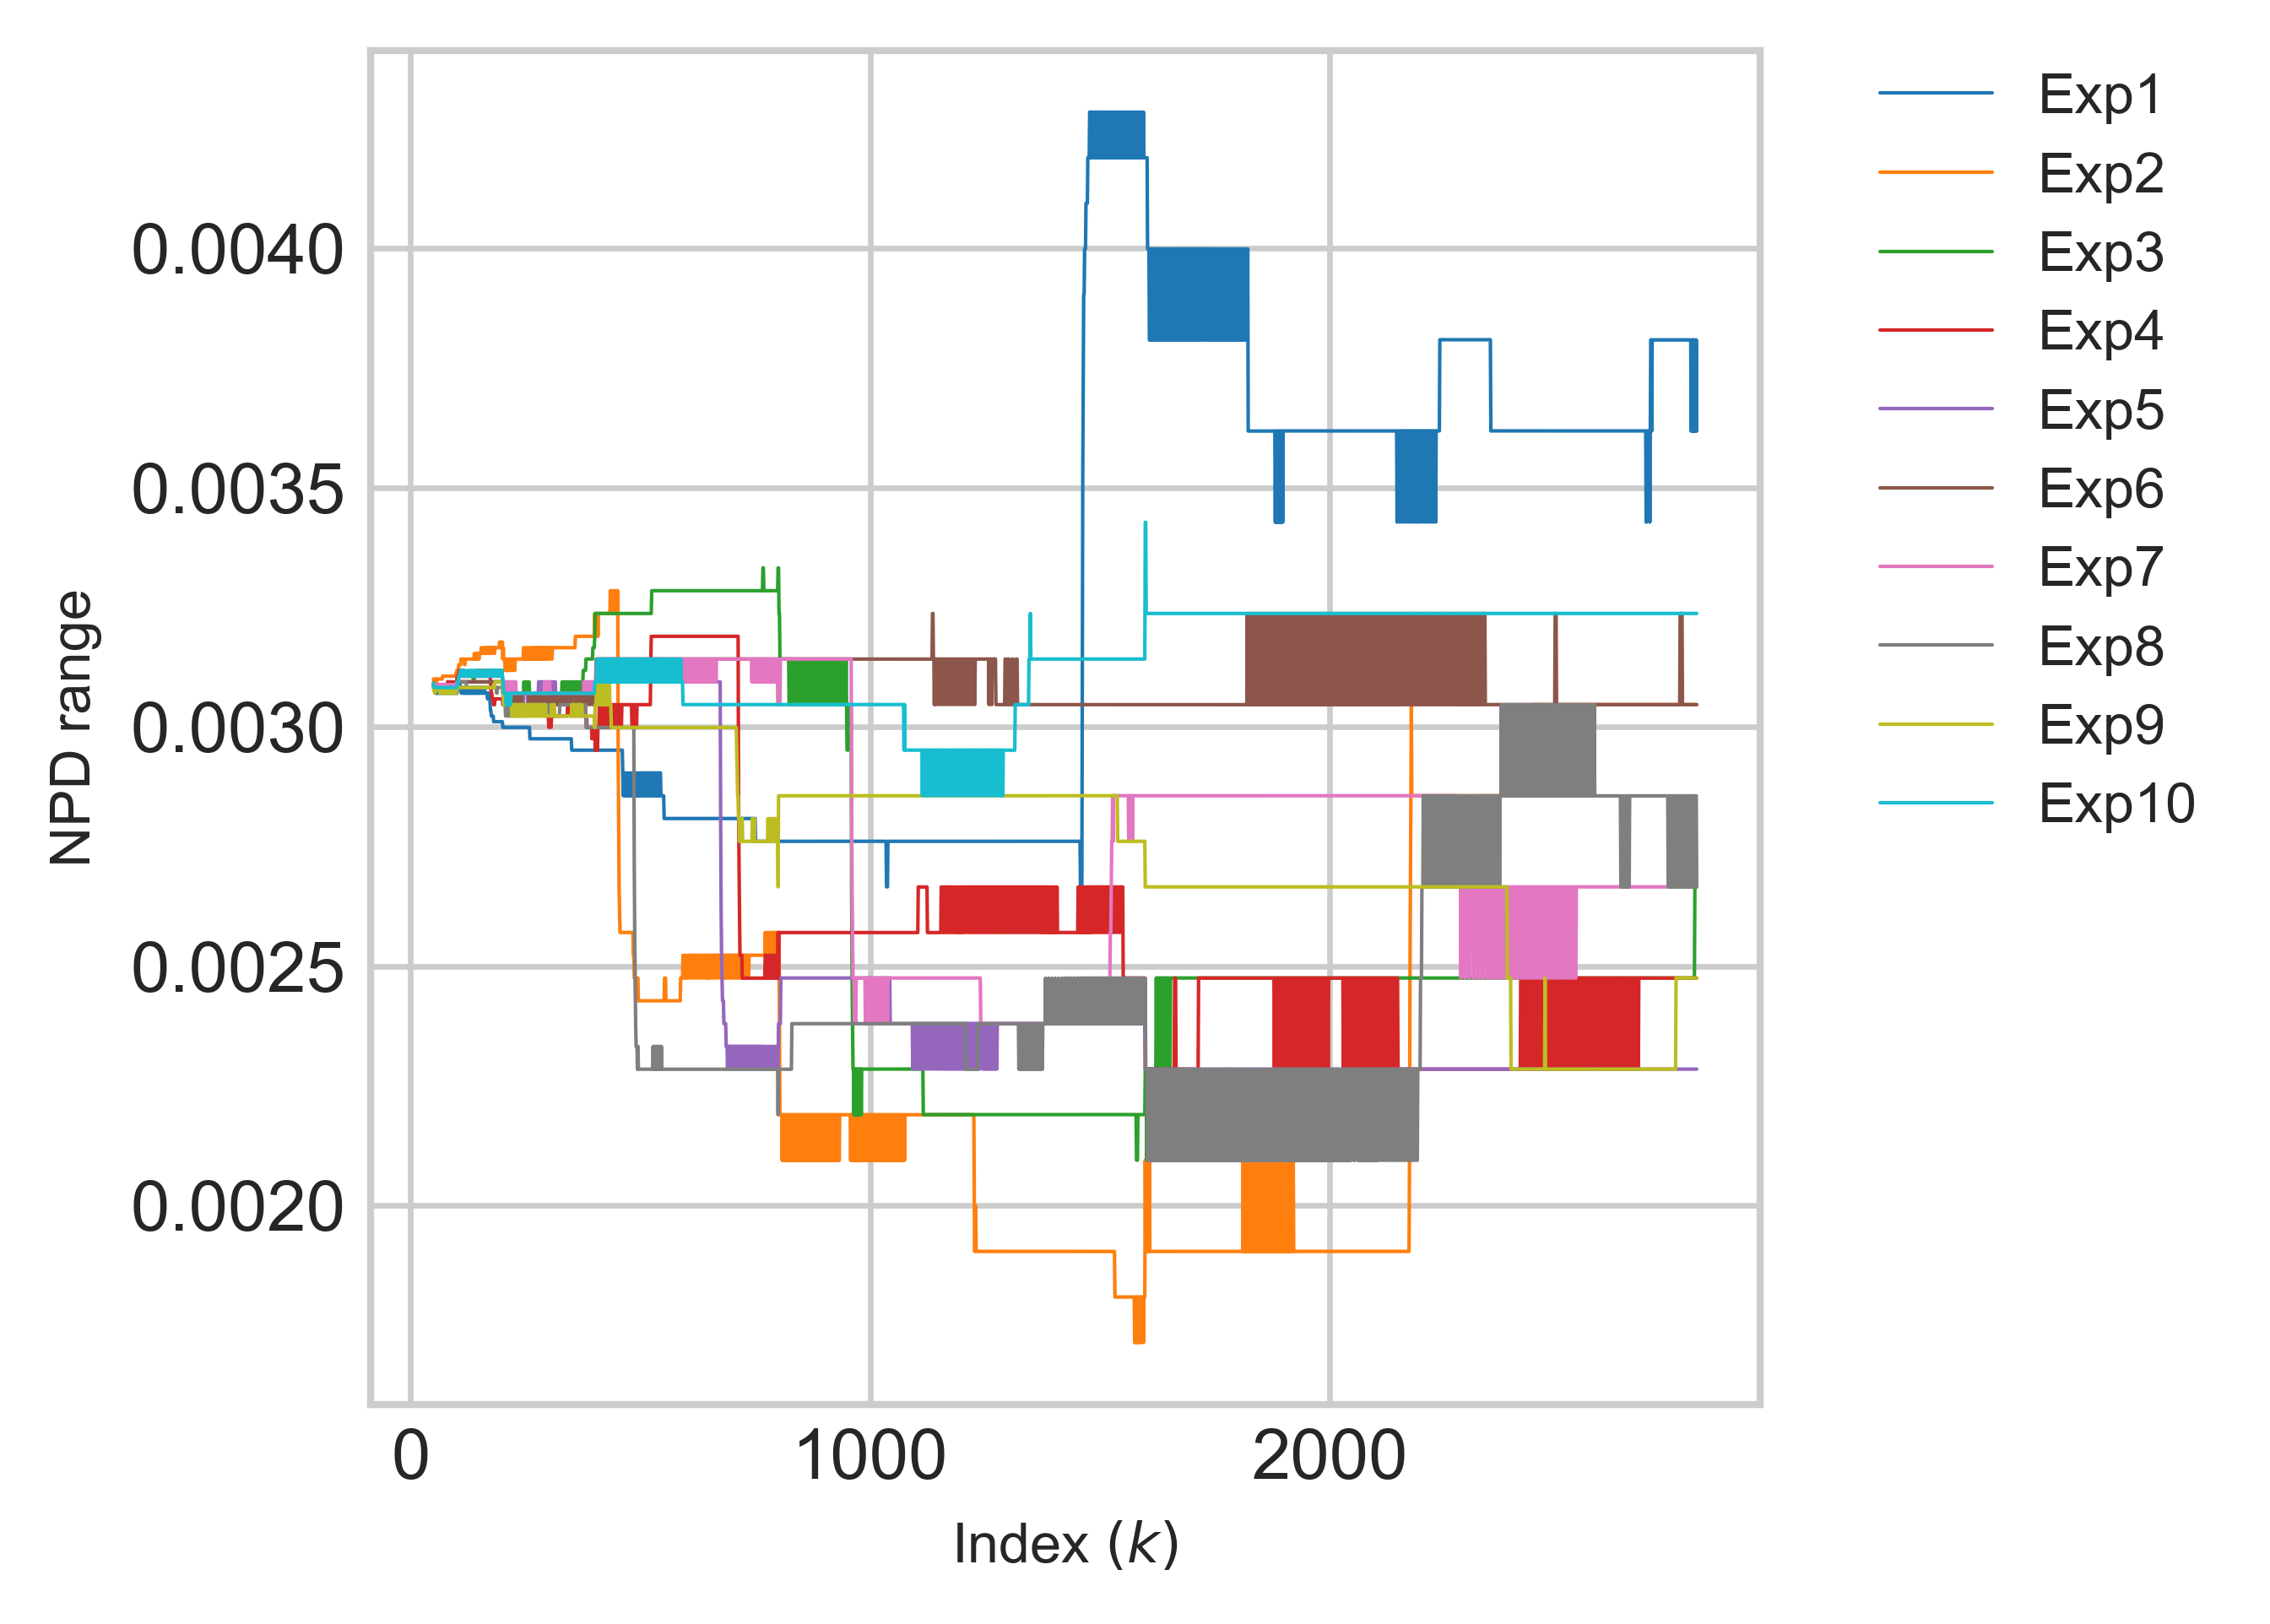

In [18]:
per_allexp=np.zeros((N_EXP,N,2800))
per_mean_allexp=np.zeros((N_EXP,2800))


# modulo=torch.tensor(time_exp[Expref,0,:,:])%per_mean_exp[Expref,0]
for exp in range (N_EXP):
    for ind in range(2800):
        if ind==0:
            per_allexp[exp,:,ind]=MAT_timenump[exp,0,:,ind]
            per_mean_allexp[exp,ind]=np.mean(per_allexp[exp,:,ind])
        else:
            per_allexp[exp,:,ind]=MAT_timenump[exp,0,:,ind]-MAT_timenump[exp,0,:,ind-1]
            per_mean_allexp[exp,ind]=np.mean(per_allexp[exp,:,ind])
        
        
MAT_norm_delay=np.zeros([N_EXP,N,TT])
MAT_Delay_spread=np.zeros((N_EXP,TT))
for exp in range(N_EXP):
    for ind in range(TT):
        for node in range(N):
            MAT_norm_delay[exp,node,ind]=(MAT_timenump[exp,0,node,ind]-MAT_timenump[exp,0,0,ind])/per_mean_allexp[exp,ind]
        MAT_Delay_spread[exp,ind]=np.amax(MAT_norm_delay[exp,:,ind])-np.amin(MAT_norm_delay[exp,:,ind])
        

    
fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
for exp in range(N_EXP):
        plt.plot(range(50,2800),torch.tensor(MAT_Delay_spread[exp,50:2800]), linewidth=0.5)
plt.legend(['Exp1','Exp2','Exp3','Exp4','Exp5','Exp6','Exp7','Exp8','Exp9','Exp10',],bbox_to_anchor=(1.07,1), borderaxespad=0,fontsize='8')
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('NPD range', fontsize=8)
# print('Maximum delay spread:', np.amax(MAT_Delay_spread))
# print('Minimum delay spread:', np.amin(MAT_Delay_spread))

##### TESTING WITH MOBILITY WITH FAST SPEED 20KM

In [9]:
speed=1.4 #defining walking speed of movement for some nodes
#Testing with the other time indexes and including mobility
# Nodeintest=torch.zeros(TT, N,2*N)
t_new = torch.zeros(N,N)
Nodeintest=torch.zeros((TT,N,2*(N-1)))
start=1
stop=TT
N_EXP=10
N_RESET=5 #Number of reset nodes in an iteration
# missclk=np.array([8, 15, 3, 6, 5])
# print(missclk)
MAT_location_X=np.zeros((N_EXP,TT,N,1))
MAT_location_Y=np.zeros((N_EXP,TT,N,1))
MAT_timenump=np.zeros((N_EXP,1,N,TT))
MAT_Distance_matrix=np.zeros((N_EXP,TT,N,N))
MAT_TimeOfFlight_Matrix =np.zeros((N_EXP,TT,N,N))
MAT_RSSI_Matrix=np.zeros((N_EXP,TT,N,N))
NN_weight=torch.zeros(N,(N-1))
diff=torch.zeros(N,N-1)
prod=torch.zeros(1,N)


for exp in range(N_EXP):
    for index in range(TT):
        MAT_location_X[exp,index,:,:]=location_X[:,:]
        MAT_location_Y[exp,index,:,:]=location_Y[:,:]

for exp in range(N_EXP):
    for index in range(1):
        MAT_timenump[exp,0,:,index]=timenump[:,index]
        MAT_Distance_matrix[exp,index,:,:]=Distance_matrix[:,:]
        MAT_TimeOfFlight_Matrix[exp,index,:,:]=TimeOfFlight_Matrix[:,:]
        MAT_RSSI_Matrix[exp,index,:,:] = RSSI_Matrix[:,:]


MAT_missclk=[]
Theta=torch.zeros((N_EXP,1))


for exp in range(N_EXP):
    print(exp)
    MAT_missclk.append(np.array(random.sample(range(N),5)))
    Theta[exp,0]=math.radians(random.sample(range(360),1)[0])
    for i in range(start,stop):
        for ncnt in MAT_missclk[exp]:
            MAT_location_X[exp,i,ncnt,0]=MAT_location_X[exp,i-1,ncnt,0]+(speed*Time_res)*math.cos(Theta[exp,0])
            MAT_location_Y[exp,i,ncnt,0]=MAT_location_Y[exp,i-1,ncnt,0]+(speed*Time_res)*math.sin(Theta[exp,0])
            


        #Allocating the different node distance randomly for ii in range(N):
        for ii in range(N):
            for jj in range(ii+1, N):
                MAT_Distance_matrix[exp,i,ii,jj]=1000*np.sqrt(np.square(MAT_location_X[exp,i,jj,0]-MAT_location_X[exp,i,ii,0])+np.square(MAT_location_Y[exp,i,jj,0]-MAT_location_Y[exp,i,ii,0]))
                MAT_Distance_matrix[exp,i,jj,ii]=MAT_Distance_matrix[exp,i,ii,jj]


        #Evaluating the time of flight across different node distances 
        for ii in range (N):
            for jj in range (N):
                MAT_TimeOfFlight_Matrix[exp,i,ii,jj]=MAT_Distance_matrix[exp,i,ii,jj]/C
                MAT_TimeOfFlight_Matrix[exp,i,jj,ii]=MAT_TimeOfFlight_Matrix[exp,i,ii,jj]
         
        #Generating power RSSI matrix, i.e. Pr
        for ii in range(N):
            for jj in range(N):
                if ii != jj :     # If ii=jj the RSSI is infinite
                    MAT_RSSI_Matrix[exp,i,ii,jj] = (Tx_powers[jj]*N_height**2)/(MAT_Distance_matrix[exp,i,ii,jj]**AttExp)
                    if MAT_RSSI_Matrix[exp,i,ii,jj]<p_0:
                        MAT_RSSI_Matrix[exp,i,ii,jj]=0
                elif ii == jj:
                    MAT_RSSI_Matrix[exp,i,ii,jj] = 0

        #ORGANIZING NEW DATA FOR FORWARD PASS
        for ii in range(N):
            for jj in range(N):
                with torch.no_grad():
                    t_new[ii,jj]=MAT_timenump[exp,0,ii,i]+ MAT_TimeOfFlight_Matrix[exp,i,ii,jj]
                    if (MAT_RSSI_Matrix[exp,i,ii,jj]==0 and ii!=jj):
                        t_new[ii,jj]=0
                        
        for b in range(N):
            Node=torch.cat([t_new[0:b,b],t_new[b+1:,b],torch.tensor(MAT_RSSI_Matrix[exp,i,b,0:b]),torch.tensor(MAT_RSSI_Matrix[exp,i,b,b+1:])]) #let the NN TAKE IN JUST THE TIME AND NOT THE DIFFERENCE
            Nodeintest[i,b,:]=Node.clone()
            #Setting the input phase difference to be zero for uncoupled nodes
        for b in range(N):
            for ind in range(N-1):
                if Nodeintest[i,b,ind]!=0:
                    Nodeintest[i,b,ind]=Nodeintest[i,b,ind]-MAT_timenump[exp,0,b,i]
                else:
                    Nodeintest[i,b,ind]=0

        if i<=TT-2:
            Weight=Dnn_Out(Nodeintest[i,:,:])
            for node in range(N):
                NN_weight[node,:]=Weight[node]
            
        
            for node in range(N):
                diff[node,:]=Nodeintest[i,node,0:N-1].reshape(1, (N-1))
                prod[0,node]=torch.sum(diff[node,:]* NN_weight[node,:])
                MAT_timenump[exp,0,node,i+1]=MAT_timenump[exp,0,node,i] +Tnode[node].item() + Eps0*prod[0,node] 
            



0
1
2
3


In [30]:
# # save('ClockphasesOfflineMobility',MAT_timenump)
# MAT_timenump=load('ClockphasesOfflineMobility.npy')

In [33]:
reftime=1921
Expref=2
N_EXP=10

In [108]:
#now we set the value of the RSSI MATRIX
#p_0=3.55 * (10**(-16)) # Threshold power
# for i in range(N):
#     for j in range(N):
#         if RSSI_Matrix[i,j] < p_0:     # If ii=jj the RSSI is below threshold
#             print(i,j)
#             RSSI_Matrix[i,j] = 0

#MAKING A DISPLAY OF CONNECTED NODES            
CONNECTION=np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if MAT_RSSI_Matrix[Expref,reftime,i,j] == 0:     # If ii=jj the RSSI is infinite
            CONNECTION[i,j]=0
        else:
            CONNECTION[i,j] = 1
CONNECTION=CONNECTION.astype(int)
K=nx.from_numpy_matrix(CONNECTION) #creates the graph from connection matrix
mapping=dict(zip(K,range(1,17))) #Reorders the node labels such that it counts from 1-16 instead of 0-15
K=nx.relabel_nodes(K,mapping, copy=False) #applies the new label to the network
nt=Network('400px','400px')
nt.from_nx(K)
nt.show('example.html')

IndexError: index 9 is out of bounds for axis 0 with size 1

Text(0, 0.5, 'Period')

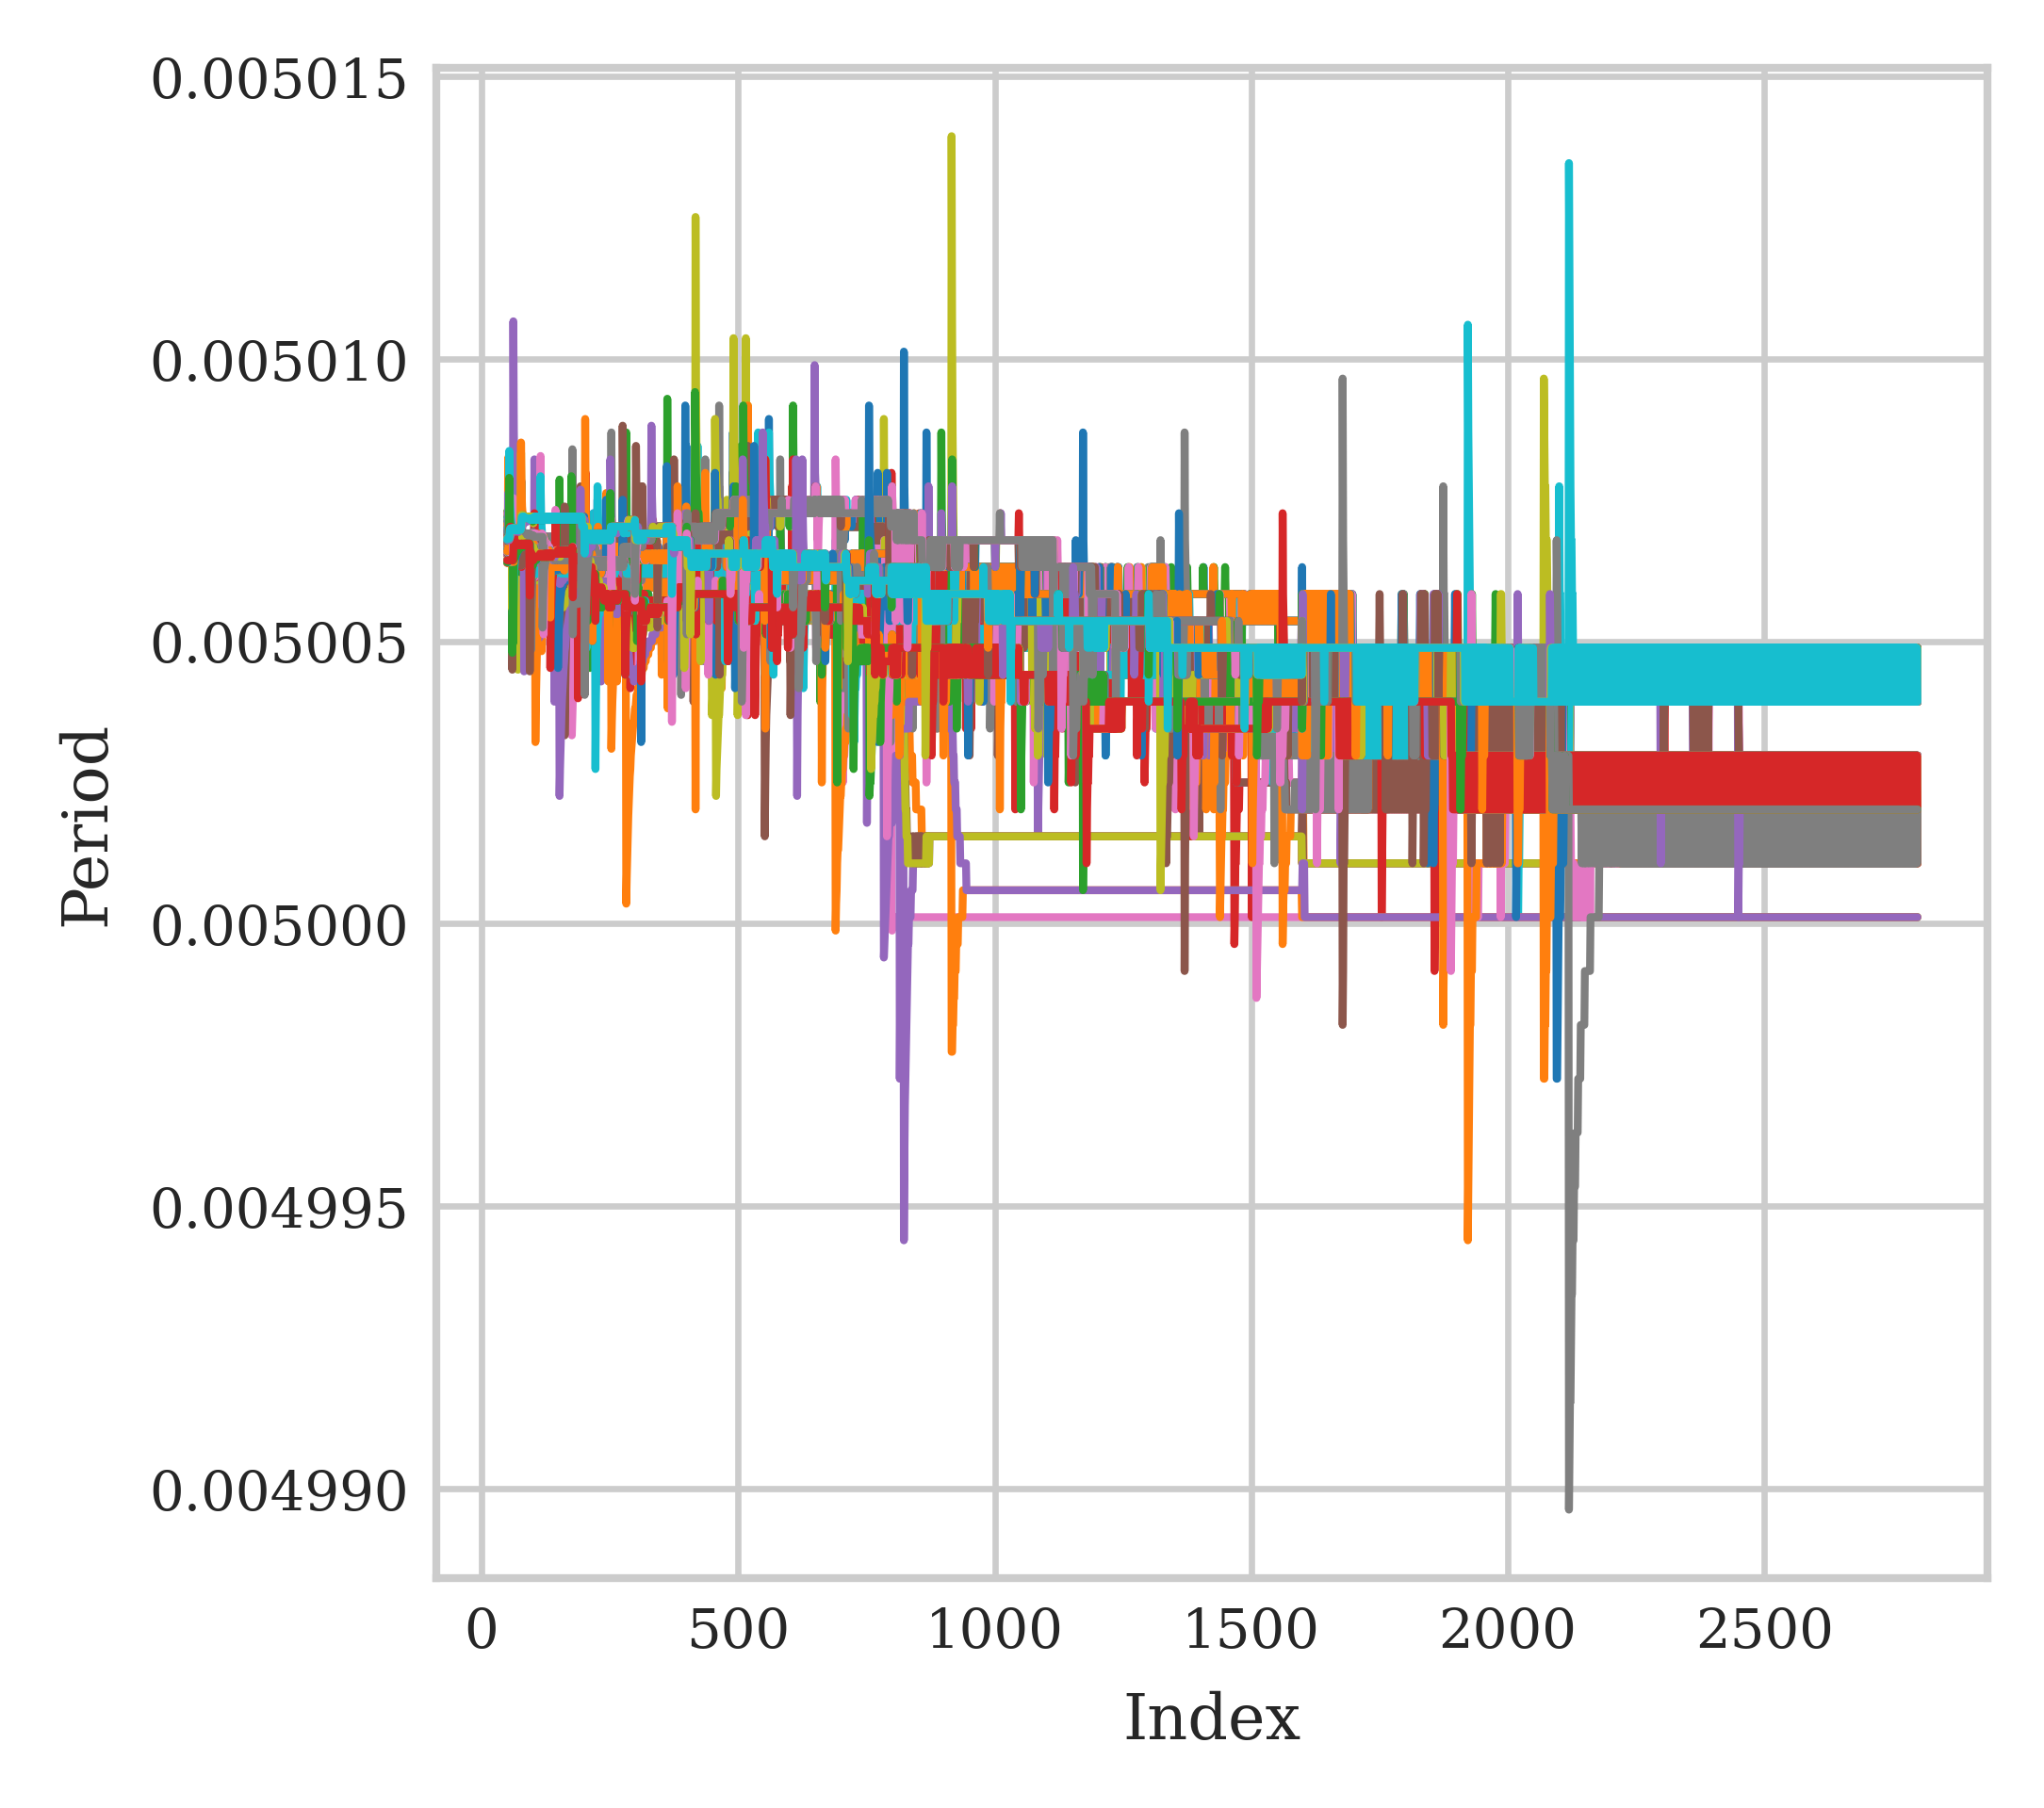

In [35]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)
MAT_period=torch.zeros(N_EXP,N,TT-1)
per_var=torch.zeros(TT-1)
per_mean_vec=torch.zeros(TT-1)#THIS SHOULD BE REMOVED

for ee in range(N_EXP):
    for ind in range(TT-1):
        for i in range(N):
            MAT_period[ee,i,ind]=MAT_timenump[ee,0,i,ind+1]-MAT_timenump[ee,0,i,ind]
#         per_var[ind]=torch.var(period[:,ind])

for exp in range(N_EXP):
    for node in range(N):
        plt.plot(range(50,TT-1),(MAT_period[exp,node,50:TT-1]), linewidth=1)
plt.xlabel('Index', fontsize=8)
plt.ylabel('Period', fontsize=8)

Text(0, 0.5, 'Period')

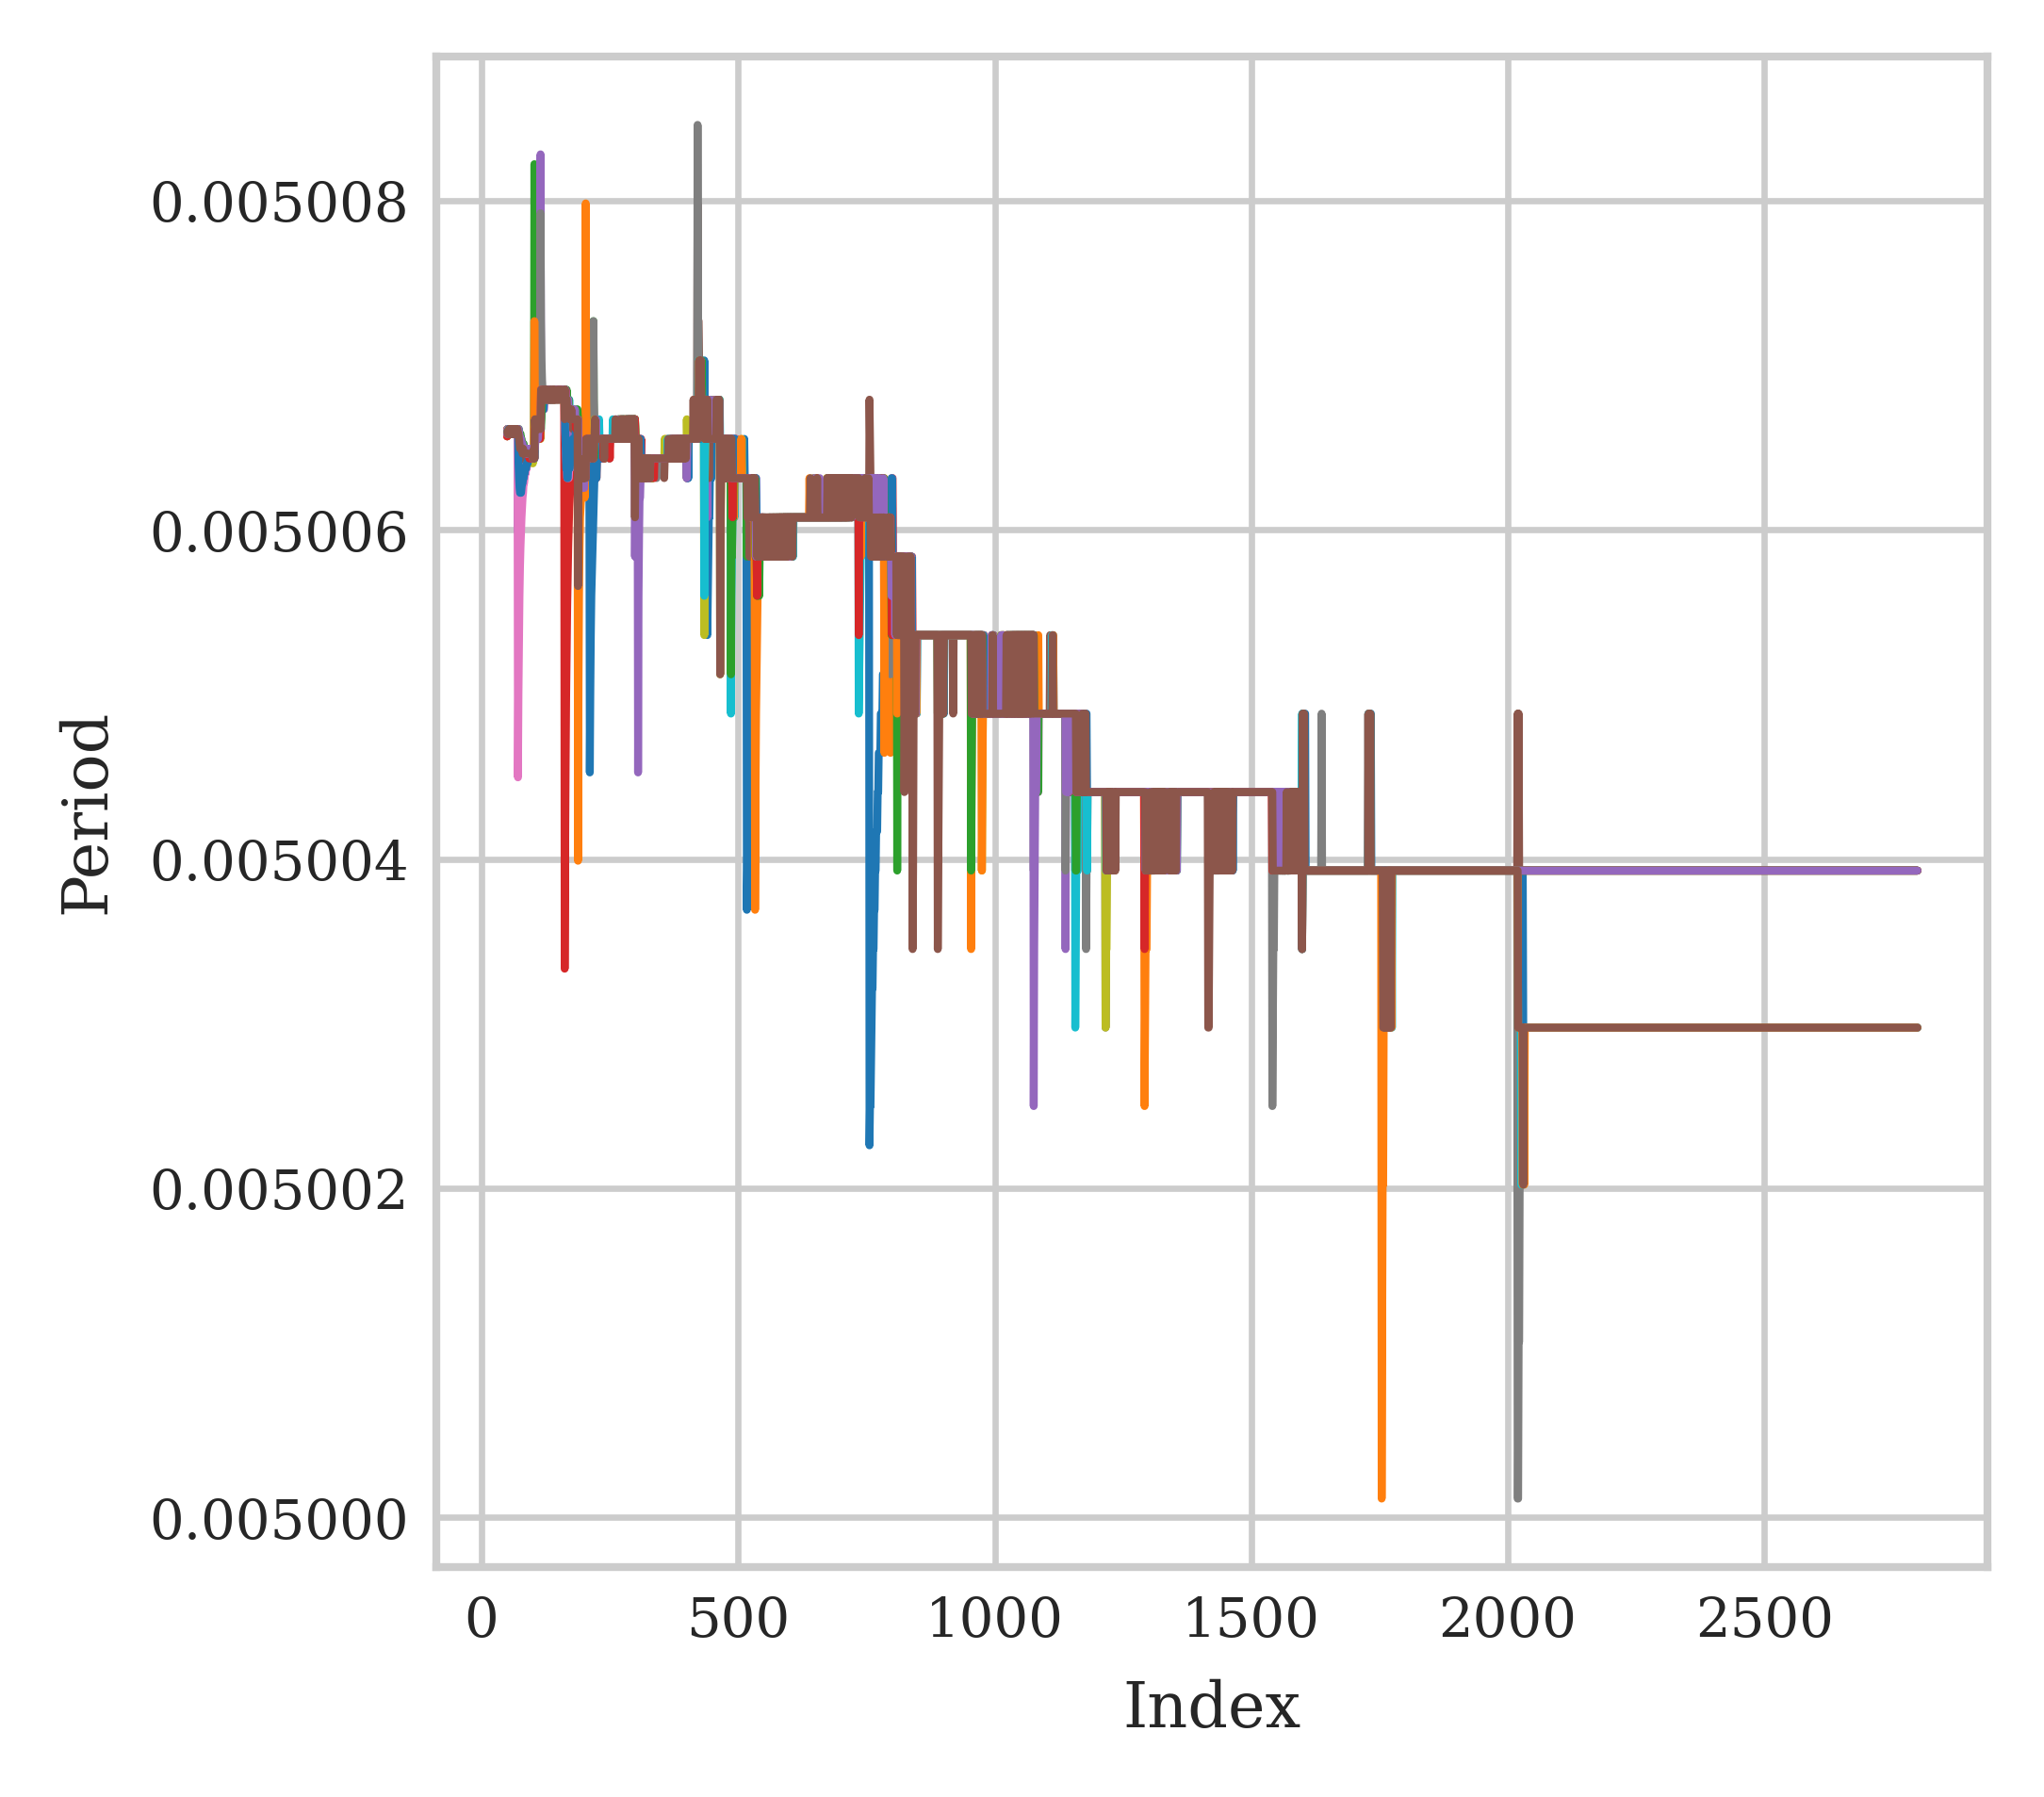

In [36]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig2=plt.figure(dpi=600)
fig2.set_size_inches(3.54,3.54)

for node in range(N):
    plt.plot(range(50,TT-1),(MAT_period[Expref,node,50:TT-1]), linewidth=1)
plt.xlabel('Index', fontsize=8)
plt.ylabel('Period', fontsize=8)

Text(0, 0.5, 'Period')

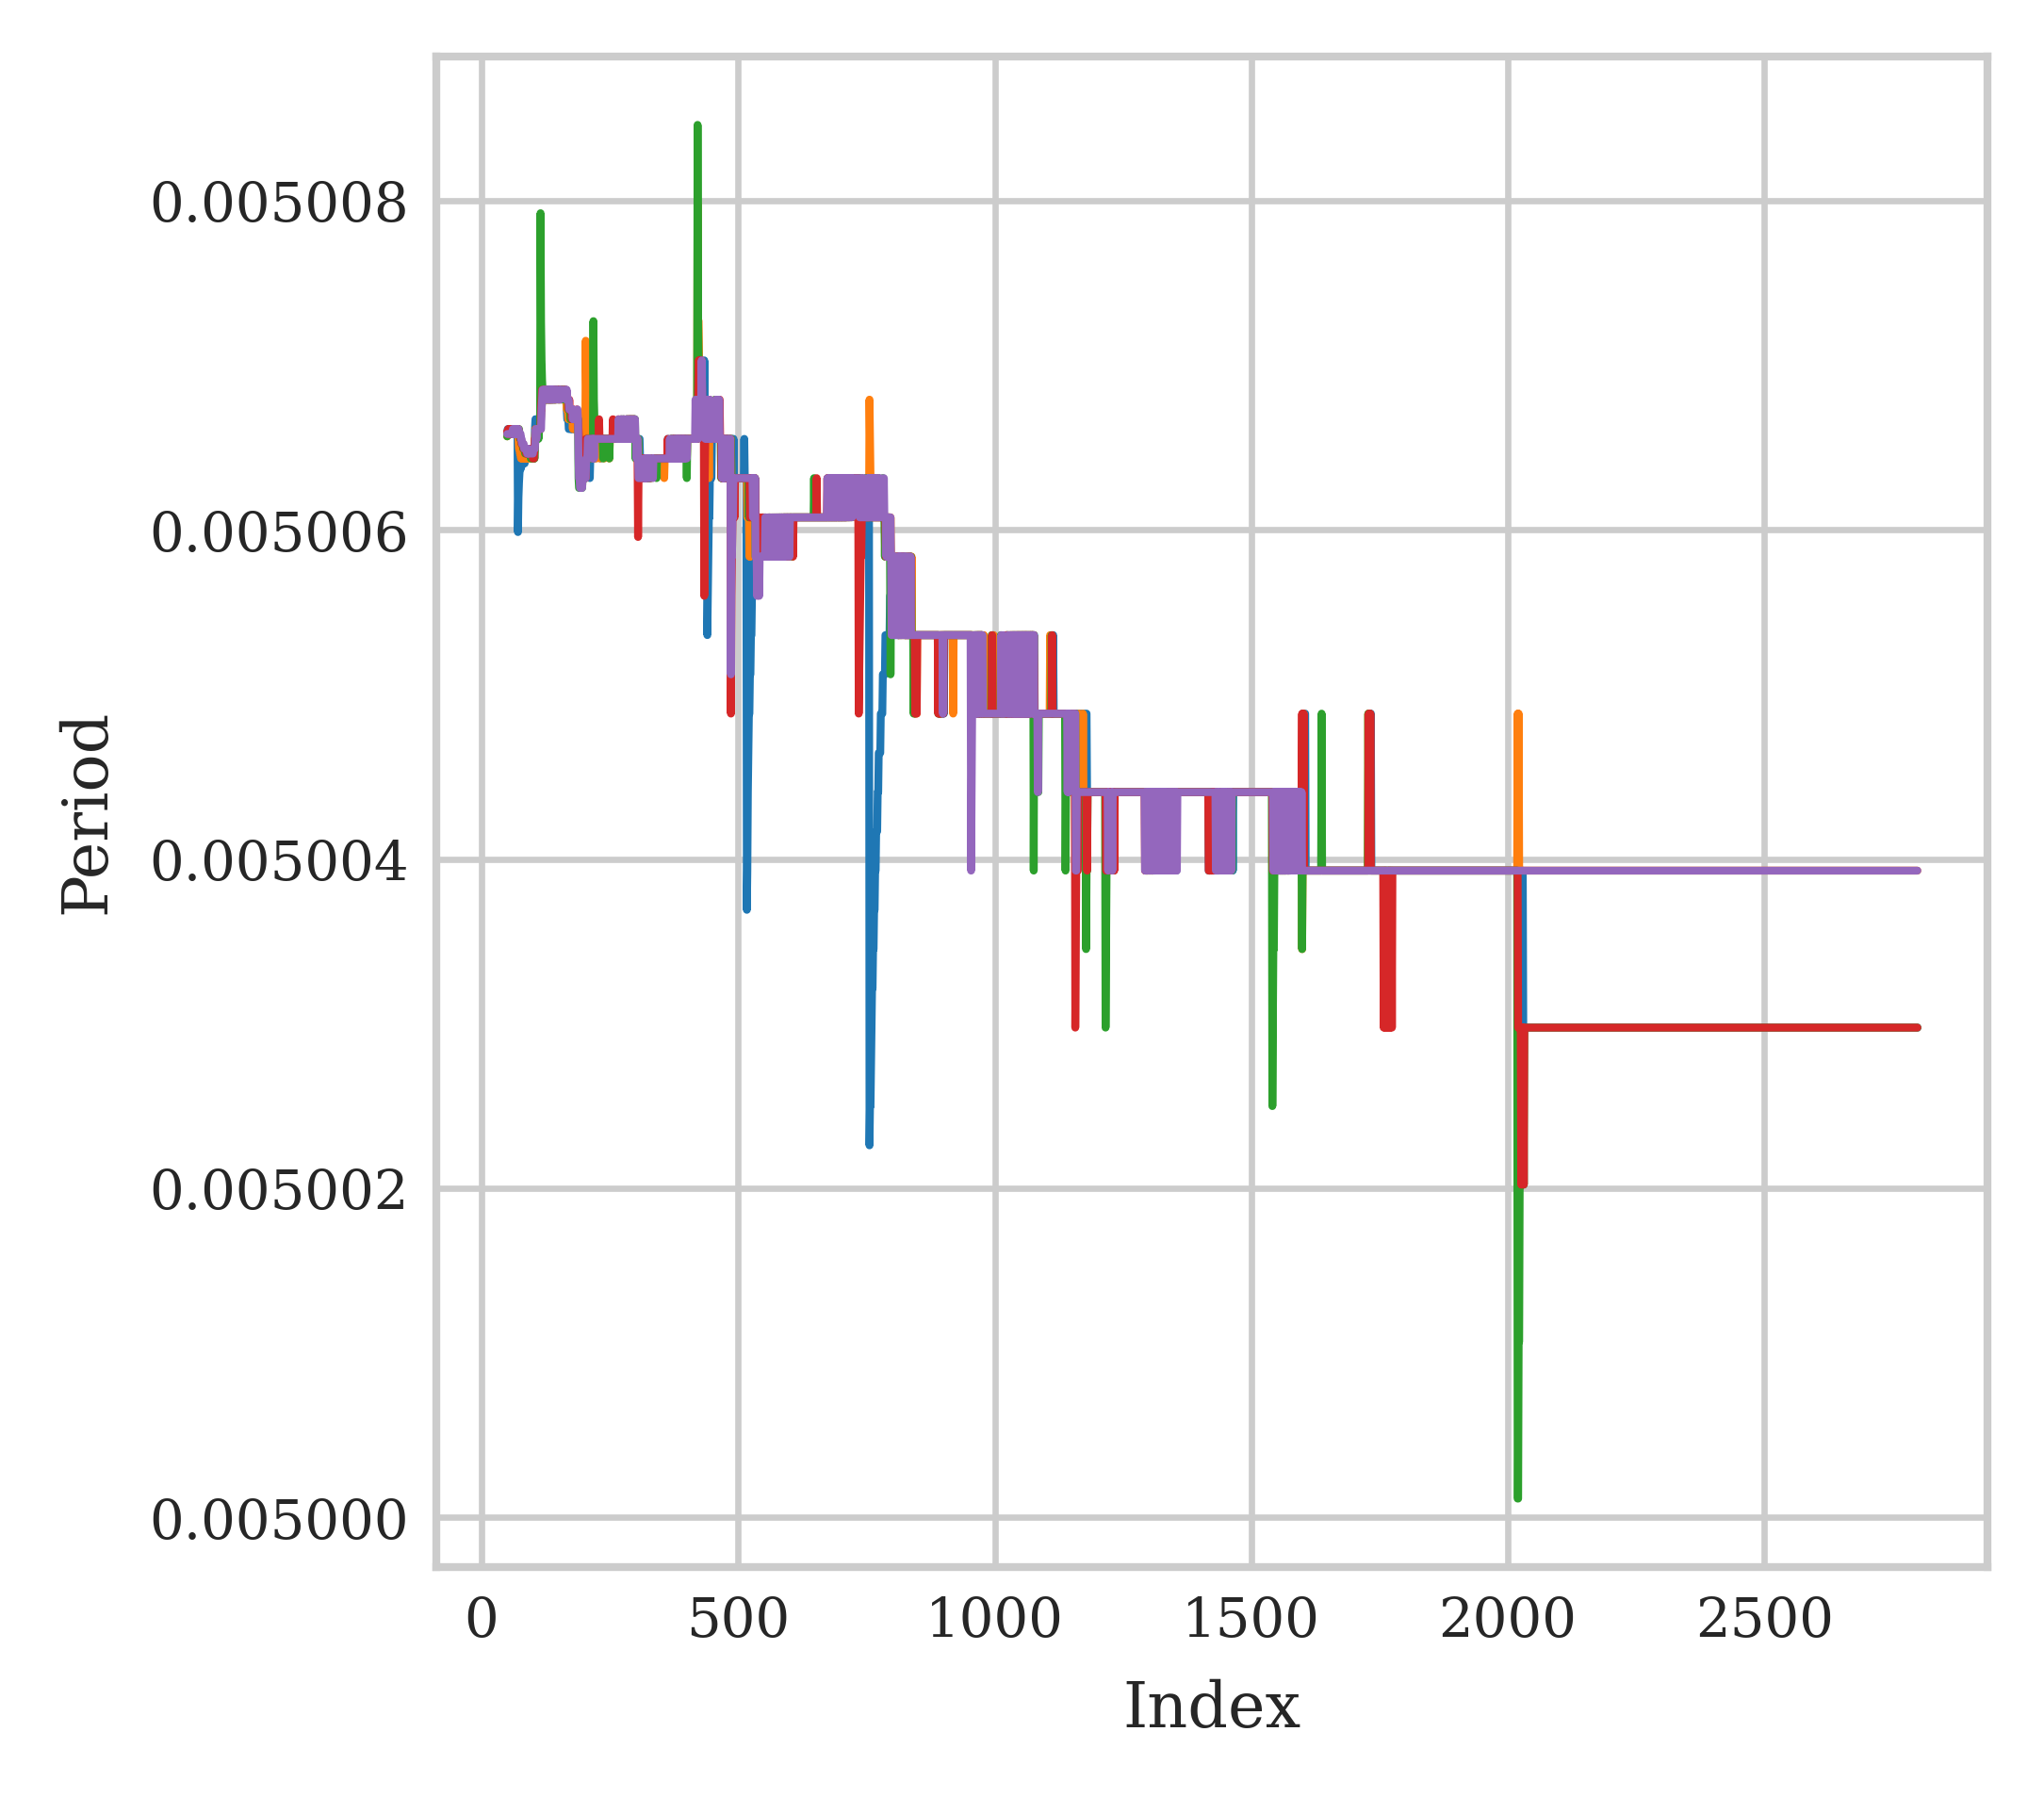

In [37]:
#PLOT MOBILE NODES FREQ
#### plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)
per_var=torch.zeros(TT-1)
# for exp in range(N_EXP):

plt.plot(range(50,TT-1),(MAT_period[Expref,0,50:TT-1]), linewidth=1)
plt.plot(range(50,TT-1),(MAT_period[Expref,5,50:TT-1]), linewidth=1)
plt.plot(range(50,TT-1),(MAT_period[Expref,7,50:TT-1]), linewidth=1)
plt.plot(range(50,TT-1),(MAT_period[Expref,9,50:TT-1]), linewidth=1)
plt.plot(range(50,TT-1),(MAT_period[Expref,12,50:TT-1]), linewidth=1)
plt.xlabel('Index', fontsize=8)
plt.ylabel('Period', fontsize=8)    
# plt.legend(bbox_to_anchor=(1.07,1), borderaxespad=0,fontsize='8')
# plt.title('Exp{}'.format(nexp+1))

Text(0, 0.5, 'Period')

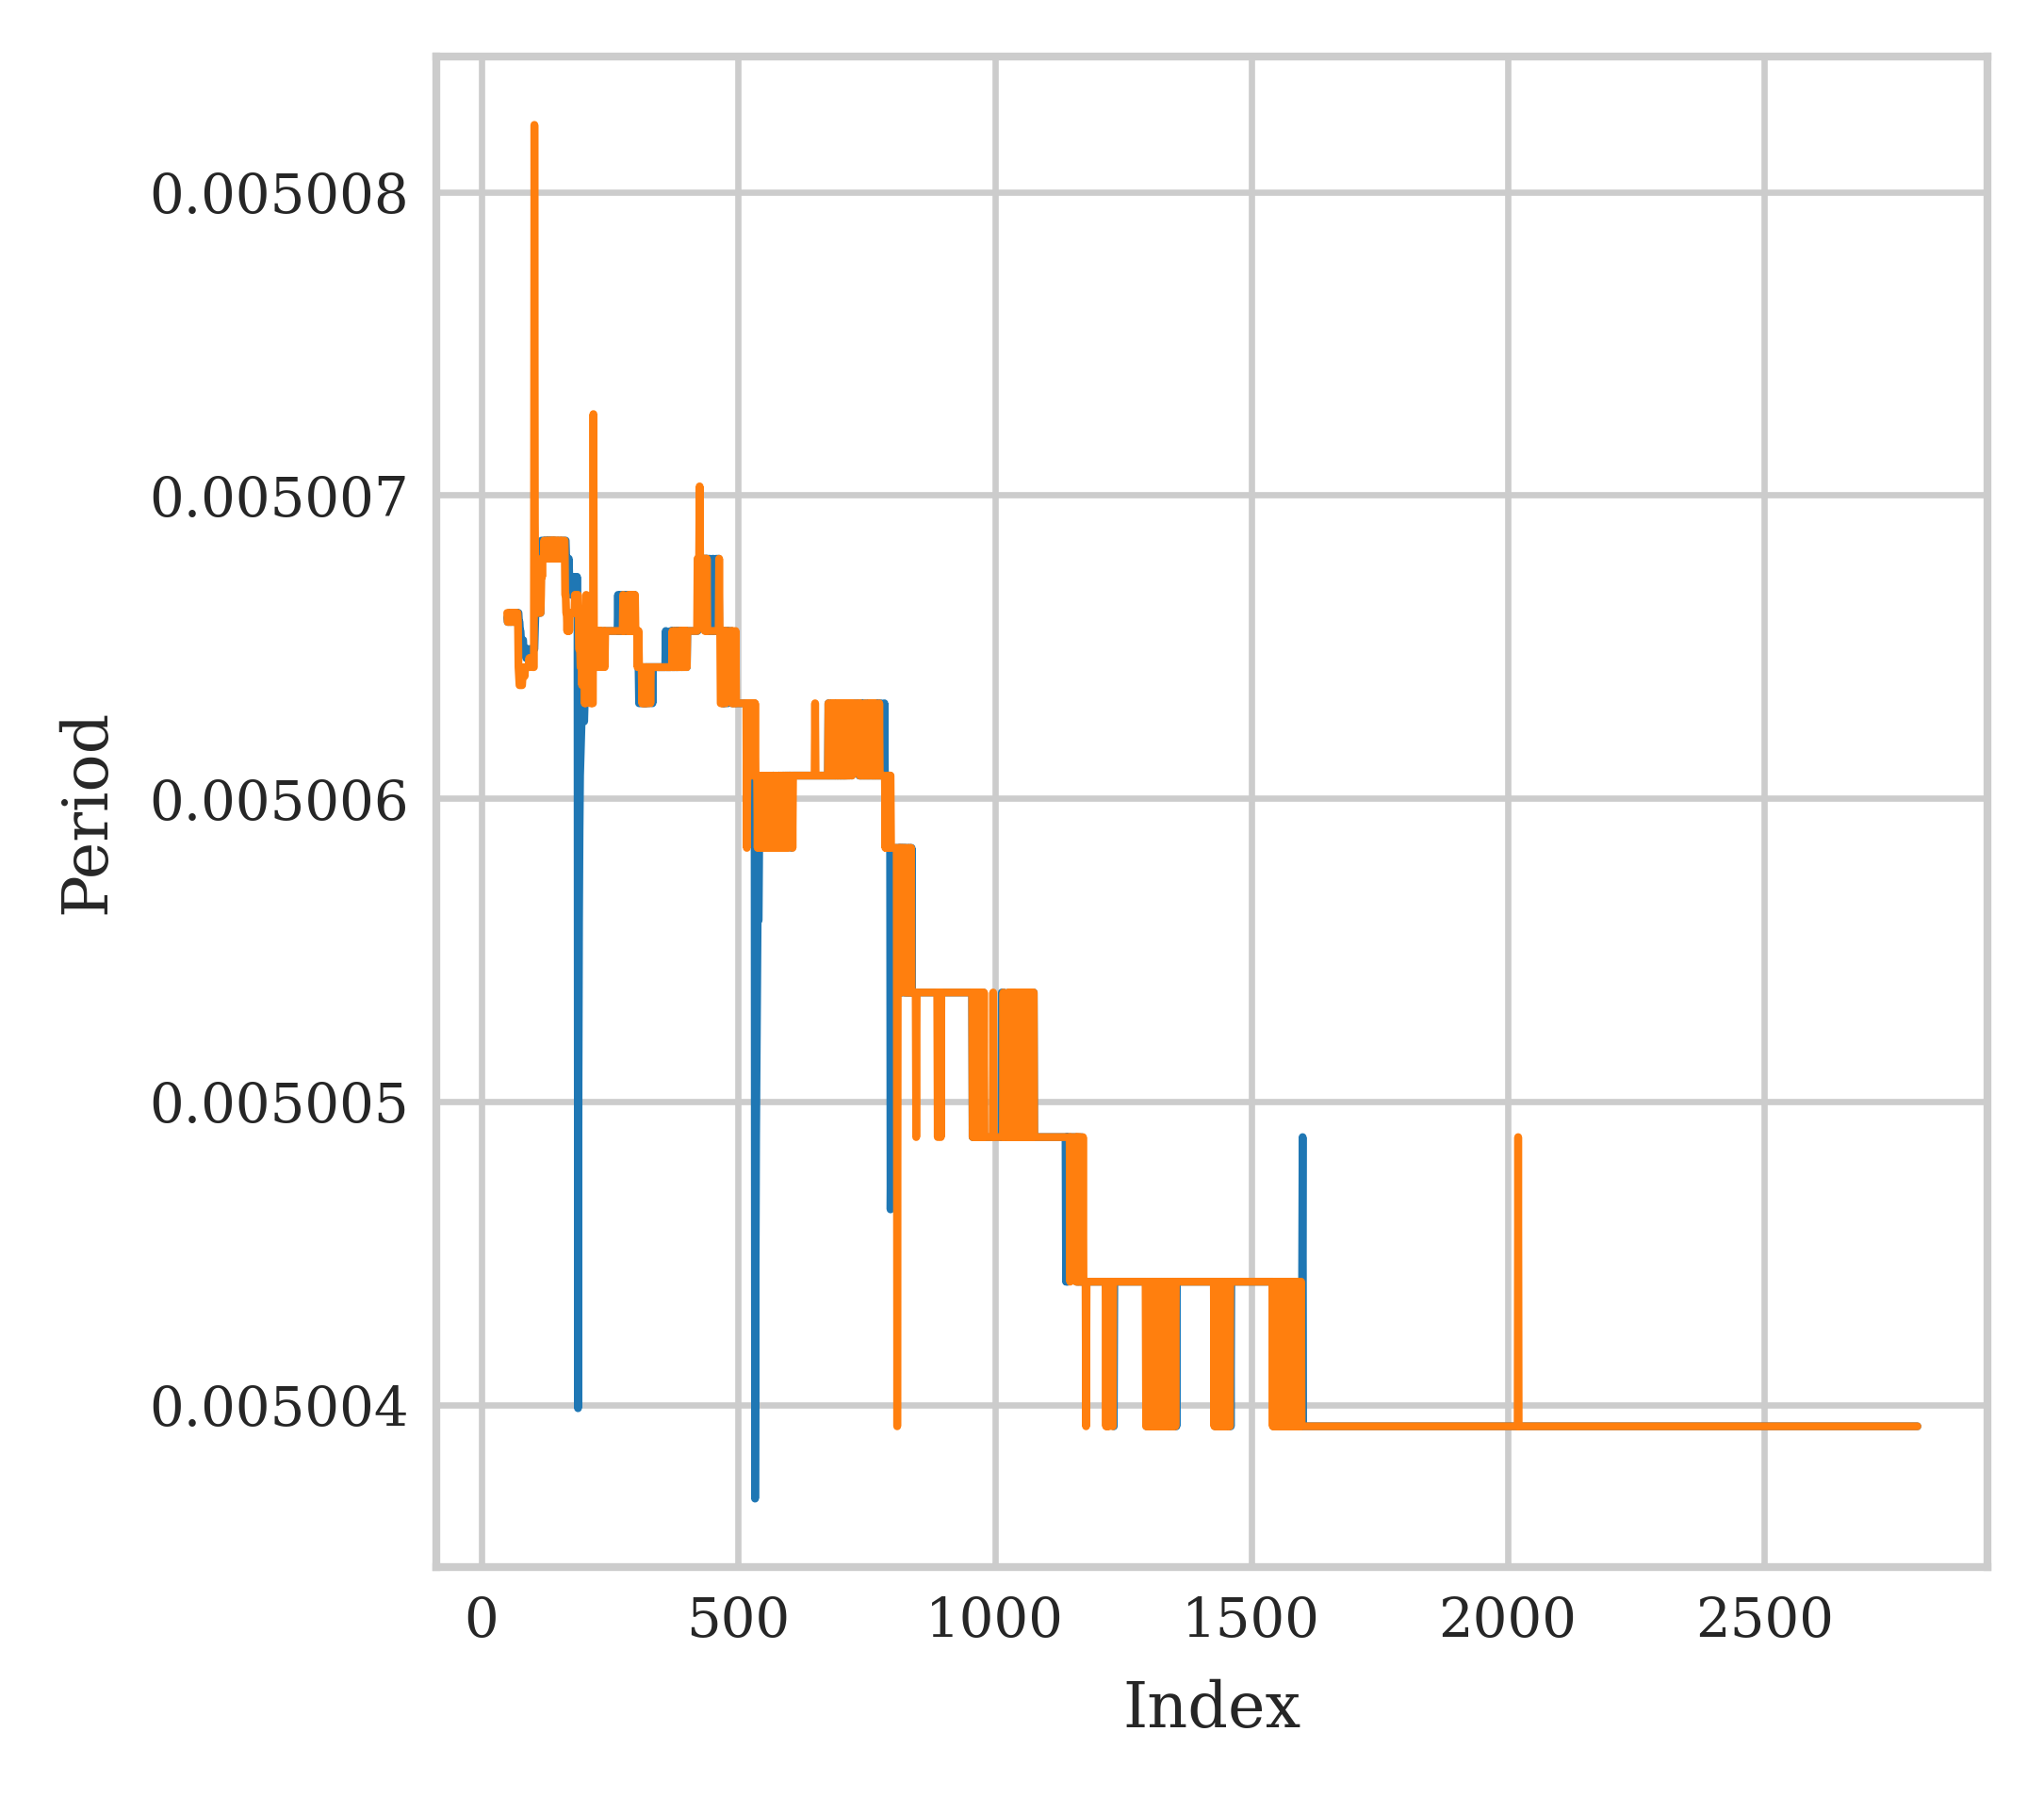

In [38]:
#PLOT STATICNODES FREQ
#### plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)
per_var=torch.zeros(TT-1)
# for exp in range(N_EXP):

for node in range(0,3):
    if (node==0 or node==5 or node==7 or node==9 or node==12):
        continue
    else:
        plt.plot(range(50,TT-1),(MAT_period[Expref,node,50:TT-1]), linewidth=1)

plt.xlabel('Index', fontsize=8)
plt.ylabel('Period', fontsize=8)    
# plt.legend(bbox_to_anchor=(1.07,1), borderaxespad=0,fontsize='8')
# plt.title('Exp{}'.format(nexp+1))

In [20]:
per_allexp=np.zeros((N_EXP,N,2800))
per_mean_allexp=np.zeros((N_EXP,2800))


for exp in range (N_EXP):
    for ind in range(2800):
        if ind==0:
            per_allexp[exp,:,ind]=MAT_timenump[exp,0,:,ind]
            per_mean_allexp[exp,ind]=np.mean(per_allexp[exp,:,ind])
        else:
            per_allexp[exp,:,ind]=MAT_timenump[exp,0,:,ind]-MAT_timenump[exp,0,:,ind-1]
            per_mean_allexp[exp,ind]=np.mean(per_allexp[exp,:,ind])
        
        
per_exp_branch=np.zeros((5,2800))
per_mean_exp_branch=np.zeros((1,2800))  


per_exp_branch[0,:]=per_allexp[Expref,0,:]
per_exp_branch[1,:]=per_allexp[Expref,5,:]
per_exp_branch[2,:]=per_allexp[Expref,7,:]
per_exp_branch[3,:]=per_allexp[Expref,9,:]
per_exp_branch[4,:]=per_allexp[Expref,12,:]

# per_exp_branch[4,:]=per_exp[0,12,:]

for ind in range(2800):
    per_mean_exp_branch[0,ind]=per_mean_allexp[Expref,ind]

for ind in range(reftime+1,2800):
    per_allexp[Expref,0,ind]=0
    per_allexp[Expref,5,ind]=0
    per_allexp[Expref,7,ind]=0
    per_allexp[Expref,9,ind]=0
    per_allexp[Expref,12,ind]=0
    per_mean_allexp[Expref,ind]=np.sum(per_allexp[Expref,:,ind])/11
    per_mean_exp_branch[0,ind]=np.mean(per_exp_branch[:,ind])


NameError: name 'Expref' is not defined

In [3]:
modulo=np.zeros((N,TT))

fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
# per_mean_exp[9,0]=torch.mean(torch.tensor(time_exp[exp,0,:,1215]-time_exp[exp,0,:,1214]))

for ind in range(TT):
    for node in range (N):
        if (ind<=reftime):
            modulo[node,ind]=MAT_timenump[Expref,0,node,ind]%per_mean_allexp[Expref,ind]
        
        elif ((ind>reftime) and (node==0 or node==5 or node==7 or node==9 or node==12)):
#             modulo[node,ind]=MAT_timenump[Expref,0,node,ind]%per_mean_exp_branch[0,ind]
            modulo[node,ind]=MAT_timenump[Expref,0,node,ind]%per_mean_exp_branch[0,ind]
       
        else:
#             modulo[node,ind]=MAT_timenump[Expref,0,node,ind]%per_mean_allexp[0,ind]
            modulo[node,ind]=MAT_timenump[Expref,0,node,ind]%per_mean_allexp[Expref,ind]



for node in range(N):
    plt.plot(range(0,2800),modulo[node,0:], linewidth=1)
plt.xlabel('Index', fontsize=8)
plt.ylabel('$\phi_i(k)$ mod $T_{c,DNN}(k)$', fontsize=8)
# plt.legend(['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16',],loc="upper left",fontsize='8')

NameError: name 'reftime' is not defined

<Figure size 2124x2124 with 0 Axes>

### TESTING FOR RANDOM MOVEMENT WITHIN THE 10 SQUARE KM

In [13]:
speed=1.4 #defining walking speed of movement for some nodes
#Testing with the other time indexes and including mobility
# Nodeintest=torch.zeros(TT, N,2*N)
t_new = torch.zeros(N,N)
Nodeintest=torch.zeros((TT,N,2*(N-1)))
start=1
stop=TT
N_EXP=1
N_RESET=5 #Number of reset nodes in an iteration
# missclk=np.array([8, 15, 3, 6, 5])
# print(missclk)
MAT_location_X=np.zeros((N_EXP,TT,N,1))
MAT_location_Y=np.zeros((N_EXP,TT,N,1))
MAT_timenump=np.zeros((N_EXP,1,N,TT))
MAT_Distance_matrix=np.zeros((N_EXP,TT,N,N))
MAT_TimeOfFlight_Matrix =np.zeros((N_EXP,TT,N,N))
MAT_RSSI_Matrix=np.zeros((N_EXP,TT,N,N))
NN_weight=torch.zeros(N,(N-1))
diff=torch.zeros(N,N-1)
prod=torch.zeros(1,N)


for exp in range(N_EXP):
    for index in range(TT):
        MAT_location_X[exp,index,:,:]=location_X[:,:]
        MAT_location_Y[exp,index,:,:]=location_Y[:,:]

for exp in range(N_EXP):
    for index in range(1):
        MAT_timenump[exp,0,:,index]=timenump[:,index]
        MAT_Distance_matrix[exp,index,:,:]=Distance_matrix[:,:]
        MAT_TimeOfFlight_Matrix[exp,index,:,:]=TimeOfFlight_Matrix[:,:]
        MAT_RSSI_Matrix[exp,index,:,:] = RSSI_Matrix[:,:]


MAT_missclk=[]
Theta=torch.zeros((N_EXP,1))


for exp in range(N_EXP):
    print(exp)
    MAT_missclk.append(np.array(random.sample(range(N),5)))
    
    for i in range(start,stop):
        for ncnt in MAT_missclk[exp]:
            angle=math.radians(random.sample(range(360),1)[0])
            temp_X=MAT_location_X[exp,i-1,ncnt,0]+(speed*Time_res)*math.cos(angle)
            temp_Y=MAT_location_Y[exp,i-1,ncnt,0]+(speed*Time_res)*math.sin(angle)
            
            if ((temp_X<0 or temp_X>X_max) and (temp_Y>=0 and temp_Y<=Y_max)):
                MAT_location_X[exp,i,ncnt,0]=2*location_X[exp,i-1,ncnt,0]-temp_X.item()
                MAT_location_Y[ncnt,0]=temp_Y.item()

            elif ((temp_X>=0 and temp_X<=X_max) and (temp_Y<0 or temp_Y>Y_max)):
                MAT_location_X[exp,i,ncnt,0]=temp_X.item()
                MAT_location_Y[exp,i,ncnt,0]=2*location_Y[exp,i-1,ncnt,0]-temp_Y.item()

            elif ((temp_X<0 or temp_X>X_max) and (temp_Y<0 or temp_Y>Y_max)):
                MAT_location_X[exp,i,ncnt,0]=2*location_X[exp,i-1,ncnt,0]-temp_X.item()
                MAT_location_Y[exp,i,ncnt,0]=2*location_Y[exp,i-1,ncnt,0]-temp_Y.item()

            else:
                MAT_location_X[exp,i,ncnt,0]=temp_X.item()
                MAT_location_Y[exp,i,ncnt,0]=temp_Y.item()


        #Allocating the different node distance randomly for ii in range(N):
        for ii in range(N):
            for jj in range(ii+1, N):
                MAT_Distance_matrix[exp,i,ii,jj]=1000*np.sqrt(np.square(MAT_location_X[exp,i,jj,0]-MAT_location_X[exp,i,ii,0])+np.square(MAT_location_Y[exp,i,jj,0]-MAT_location_Y[exp,i,ii,0]))
                MAT_Distance_matrix[exp,i,jj,ii]=MAT_Distance_matrix[exp,i,ii,jj]


        #Evaluating the time of flight across different node distances 
        for ii in range (N):
            for jj in range (N):
                MAT_TimeOfFlight_Matrix[exp,i,ii,jj]=MAT_Distance_matrix[exp,i,ii,jj]/C
                MAT_TimeOfFlight_Matrix[exp,i,jj,ii]=MAT_TimeOfFlight_Matrix[exp,i,ii,jj]
         
        #Generating power RSSI matrix, i.e. Pr
        for ii in range(N):
            for jj in range(N):
                if ii != jj :     # If ii=jj the RSSI is infinite
                    MAT_RSSI_Matrix[exp,i,ii,jj] = (Tx_powers[jj]*N_height**2)/(MAT_Distance_matrix[exp,i,ii,jj]**AttExp)
                    if MAT_RSSI_Matrix[exp,i,ii,jj]<p_0:
                        MAT_RSSI_Matrix[exp,i,ii,jj]=0
                elif ii == jj:
                    MAT_RSSI_Matrix[exp,i,ii,jj] = 0

        #ORGANIZING NEW DATA FOR FORWARD PASS
        for ii in range(N):
            for jj in range(N):
                with torch.no_grad():
                    t_new[ii,jj]=MAT_timenump[exp,0,ii,i]+ MAT_TimeOfFlight_Matrix[exp,i,ii,jj]
                    if (MAT_RSSI_Matrix[exp,i,ii,jj]==0 and ii!=jj):
                        t_new[ii,jj]=0
                        
        for b in range(N):
            Node=torch.cat([t_new[0:b,b],t_new[b+1:,b],torch.tensor(MAT_RSSI_Matrix[exp,i,b,0:b]),torch.tensor(MAT_RSSI_Matrix[exp,i,b,b+1:])]) #let the NN TAKE IN JUST THE TIME AND NOT THE DIFFERENCE
            Nodeintest[i,b,:]=Node.clone()
            #Setting the input phase difference to be zero for uncoupled nodes
        for b in range(N):
            for ind in range(N-1):
                if Nodeintest[i,b,ind]!=0:
                    Nodeintest[i,b,ind]=Nodeintest[i,b,ind]-MAT_timenump[exp,0,b,i]
                else:
                    Nodeintest[i,b,ind]=0

        if i<=TT-2:
            Weight=Dnn_Out(Nodeintest[i,:,:])
            for node in range(N):
                NN_weight[node,:]=Weight[node]
            
        
            for node in range(N):
                diff[node,:]=Nodeintest[i,node,0:N-1].reshape(1, (N-1))
                prod[0,node]=torch.sum(diff[node,:]* NN_weight[node,:])
                MAT_timenump[exp,0,node,i+1]=MAT_timenump[exp,0,node,i] +Tnode[node].item() + Eps0*prod[0,node] 
            



0


In [21]:
N_EXP=1

Text(0, 0.5, 'Period')

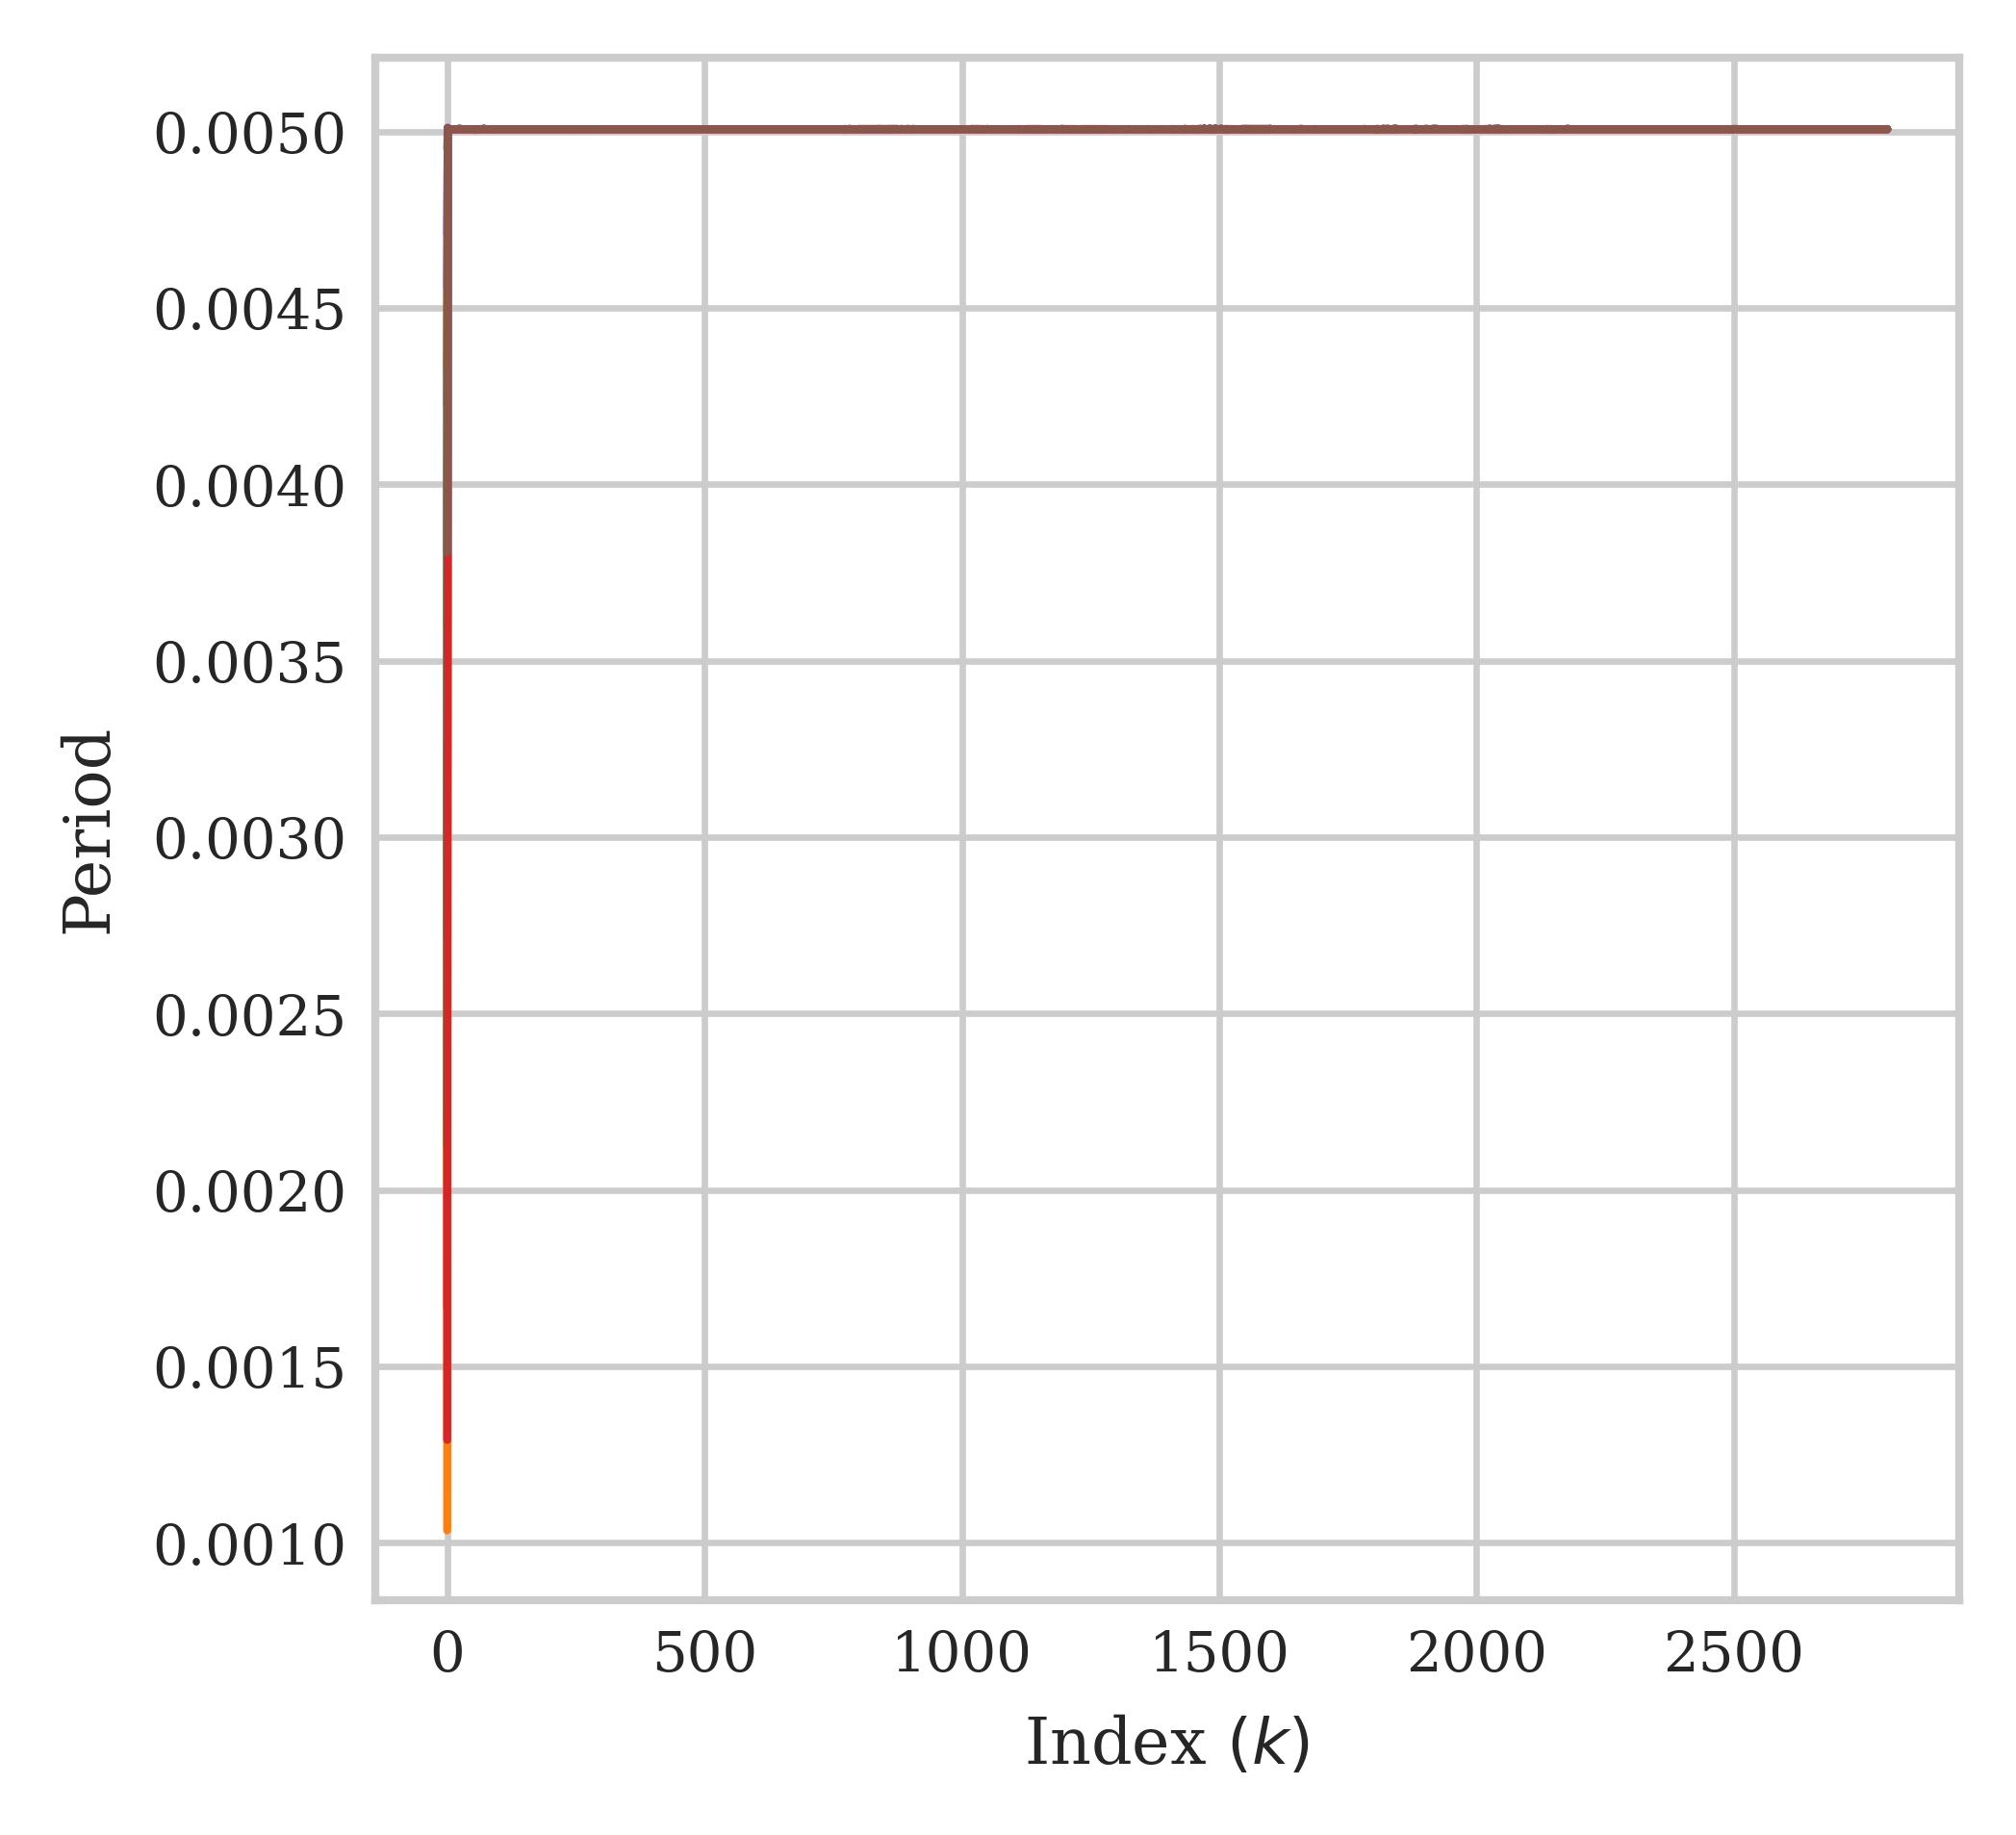

In [24]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)
MAT_period=torch.zeros(N_EXP,N,TT-1)
per_var=torch.zeros(TT-1)
per_mean_vec=torch.zeros(TT-1)#THIS SHOULD BE REMOVED

for ee in range(N_EXP):
    for ind in range(TT-1):
        for i in range(N):
            if ind==0:
                MAT_period[ee,i,ind]=MAT_timenump[ee,0,i,ind]
            elif ind!=0:
                MAT_period[ee,i,ind]=MAT_timenump[ee,0,i,ind+1]-MAT_timenump[ee,0,i,ind]
#         per_var[ind]=torch.var(period[:,ind])

for exp in range(N_EXP):
    for node in range(N):
        plt.plot(range(0,TT-1),(MAT_period[exp,node,0:TT-1]), linewidth=1)
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('Period', fontsize=8)
# plt.legend(bbox_to_anchor=(1.07,1), borderaxespad=0,fontsize='8')
# plt.title('Exp{}'.format(nexp+1))

# #VARIANCE OF THE CLOCK
# fig=plt.figure(dpi=600)
# for node in range(N):+
#     plt.plot(per_var, linewidth=1)
# plt.xlabel('Index', fontsize=8)
# plt.ylabel('Variance of Period', fontsize=8)
# plt.legend(['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16',],loc="upper left",fontsize='8')



In [94]:
# save('clockphases_randommovementOFFLINE',MAT_timenump)
# save('xcoordinate_randommovementOFFLINE', MAT_location_X)
# save('ycoordinate_randommovementOFFLINE', MAT_location_Y)

In [18]:
MAT_timenump=load('clockphases_randommovementOFFLINE.npy')

In [19]:
#MOBILE NODES
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)

for node in range(N):
    if (node==9 or node==2 or node==10 or node==3 or node==4):
        plt.plot(range(50,TT-1),(MAT_period[0,node,50:TT-1]), linewidth=1)
    else:
        continue


plt.xlabel('Index', fontsize=8)
plt.ylabel('Period', fontsize=8)

NameError: name 'MAT_period' is not defined

<Figure size 2124x2124 with 0 Axes>

Text(0, 0.5, 'Period')

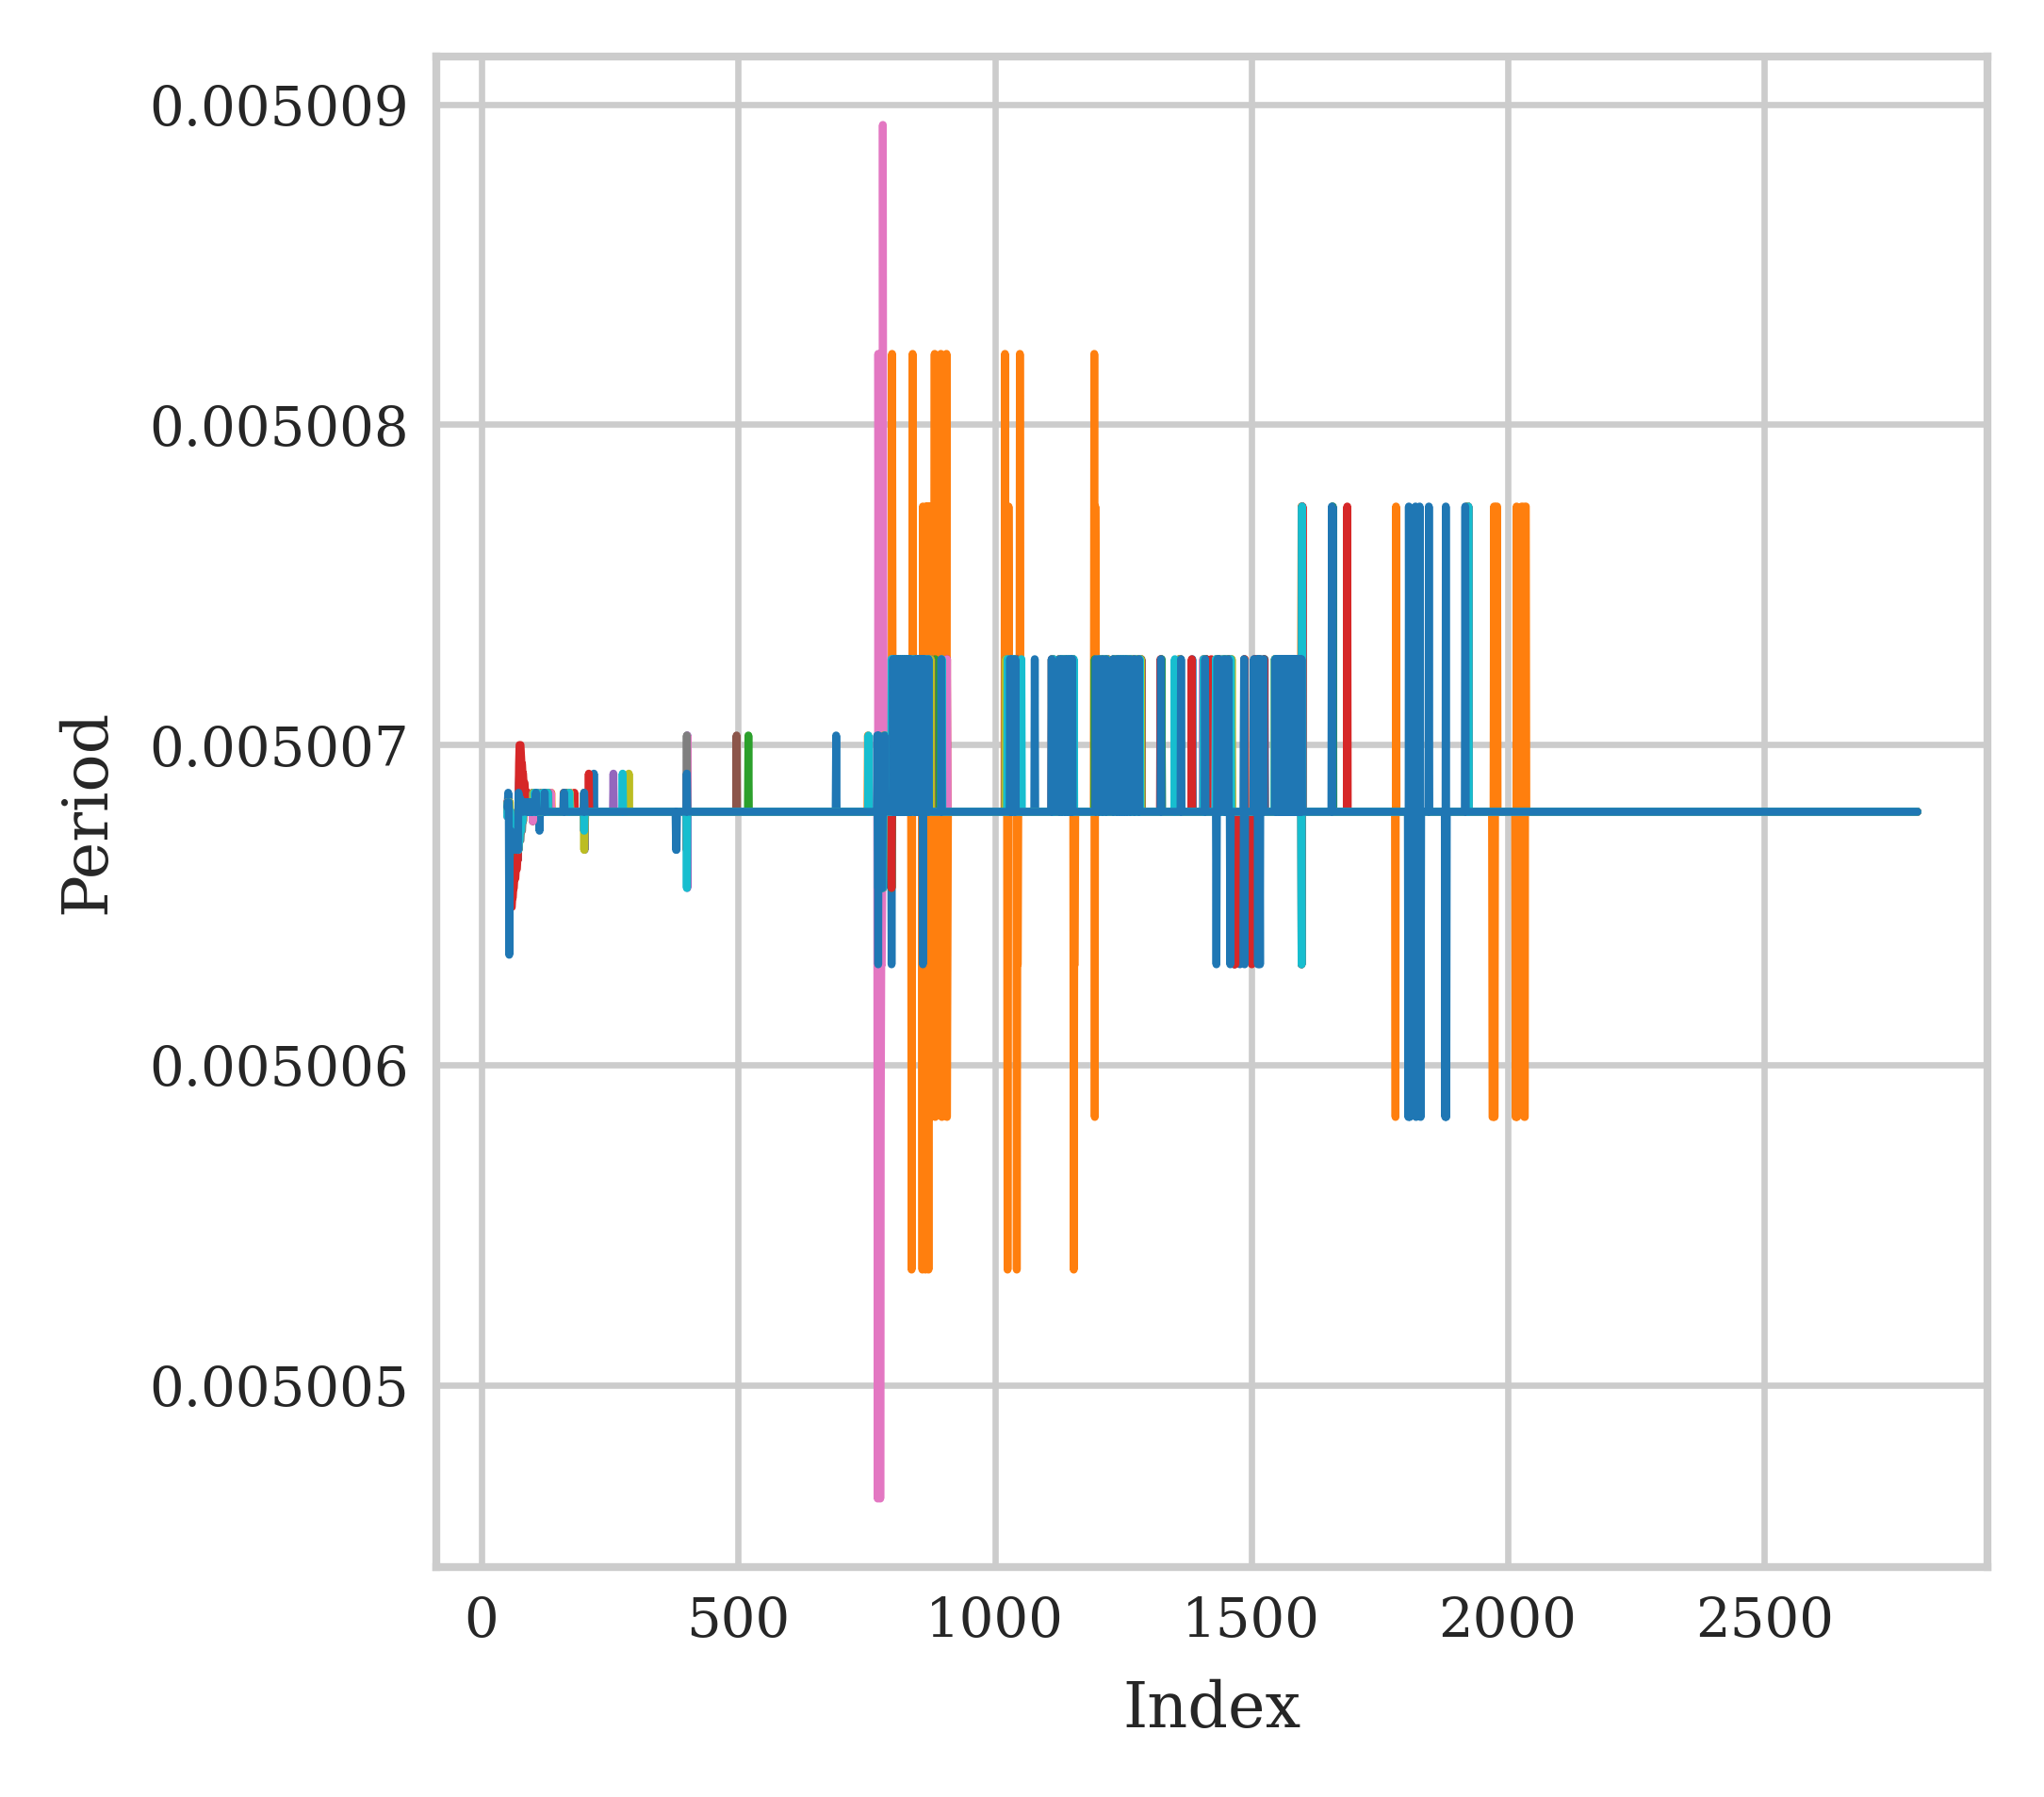

In [32]:
#FIXED NODES
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)

for node in range(N):
    if (node==9 or node==2 or node==10 or node==3 or node==4):
        continue
    else:
        plt.plot(range(50,TT-1),(MAT_period[0,node,50:TT-1]), linewidth=1)

plt.xlabel('Index', fontsize=8)
plt.ylabel('Period', fontsize=8)

Text(0, 0.5, 'Mean Period')

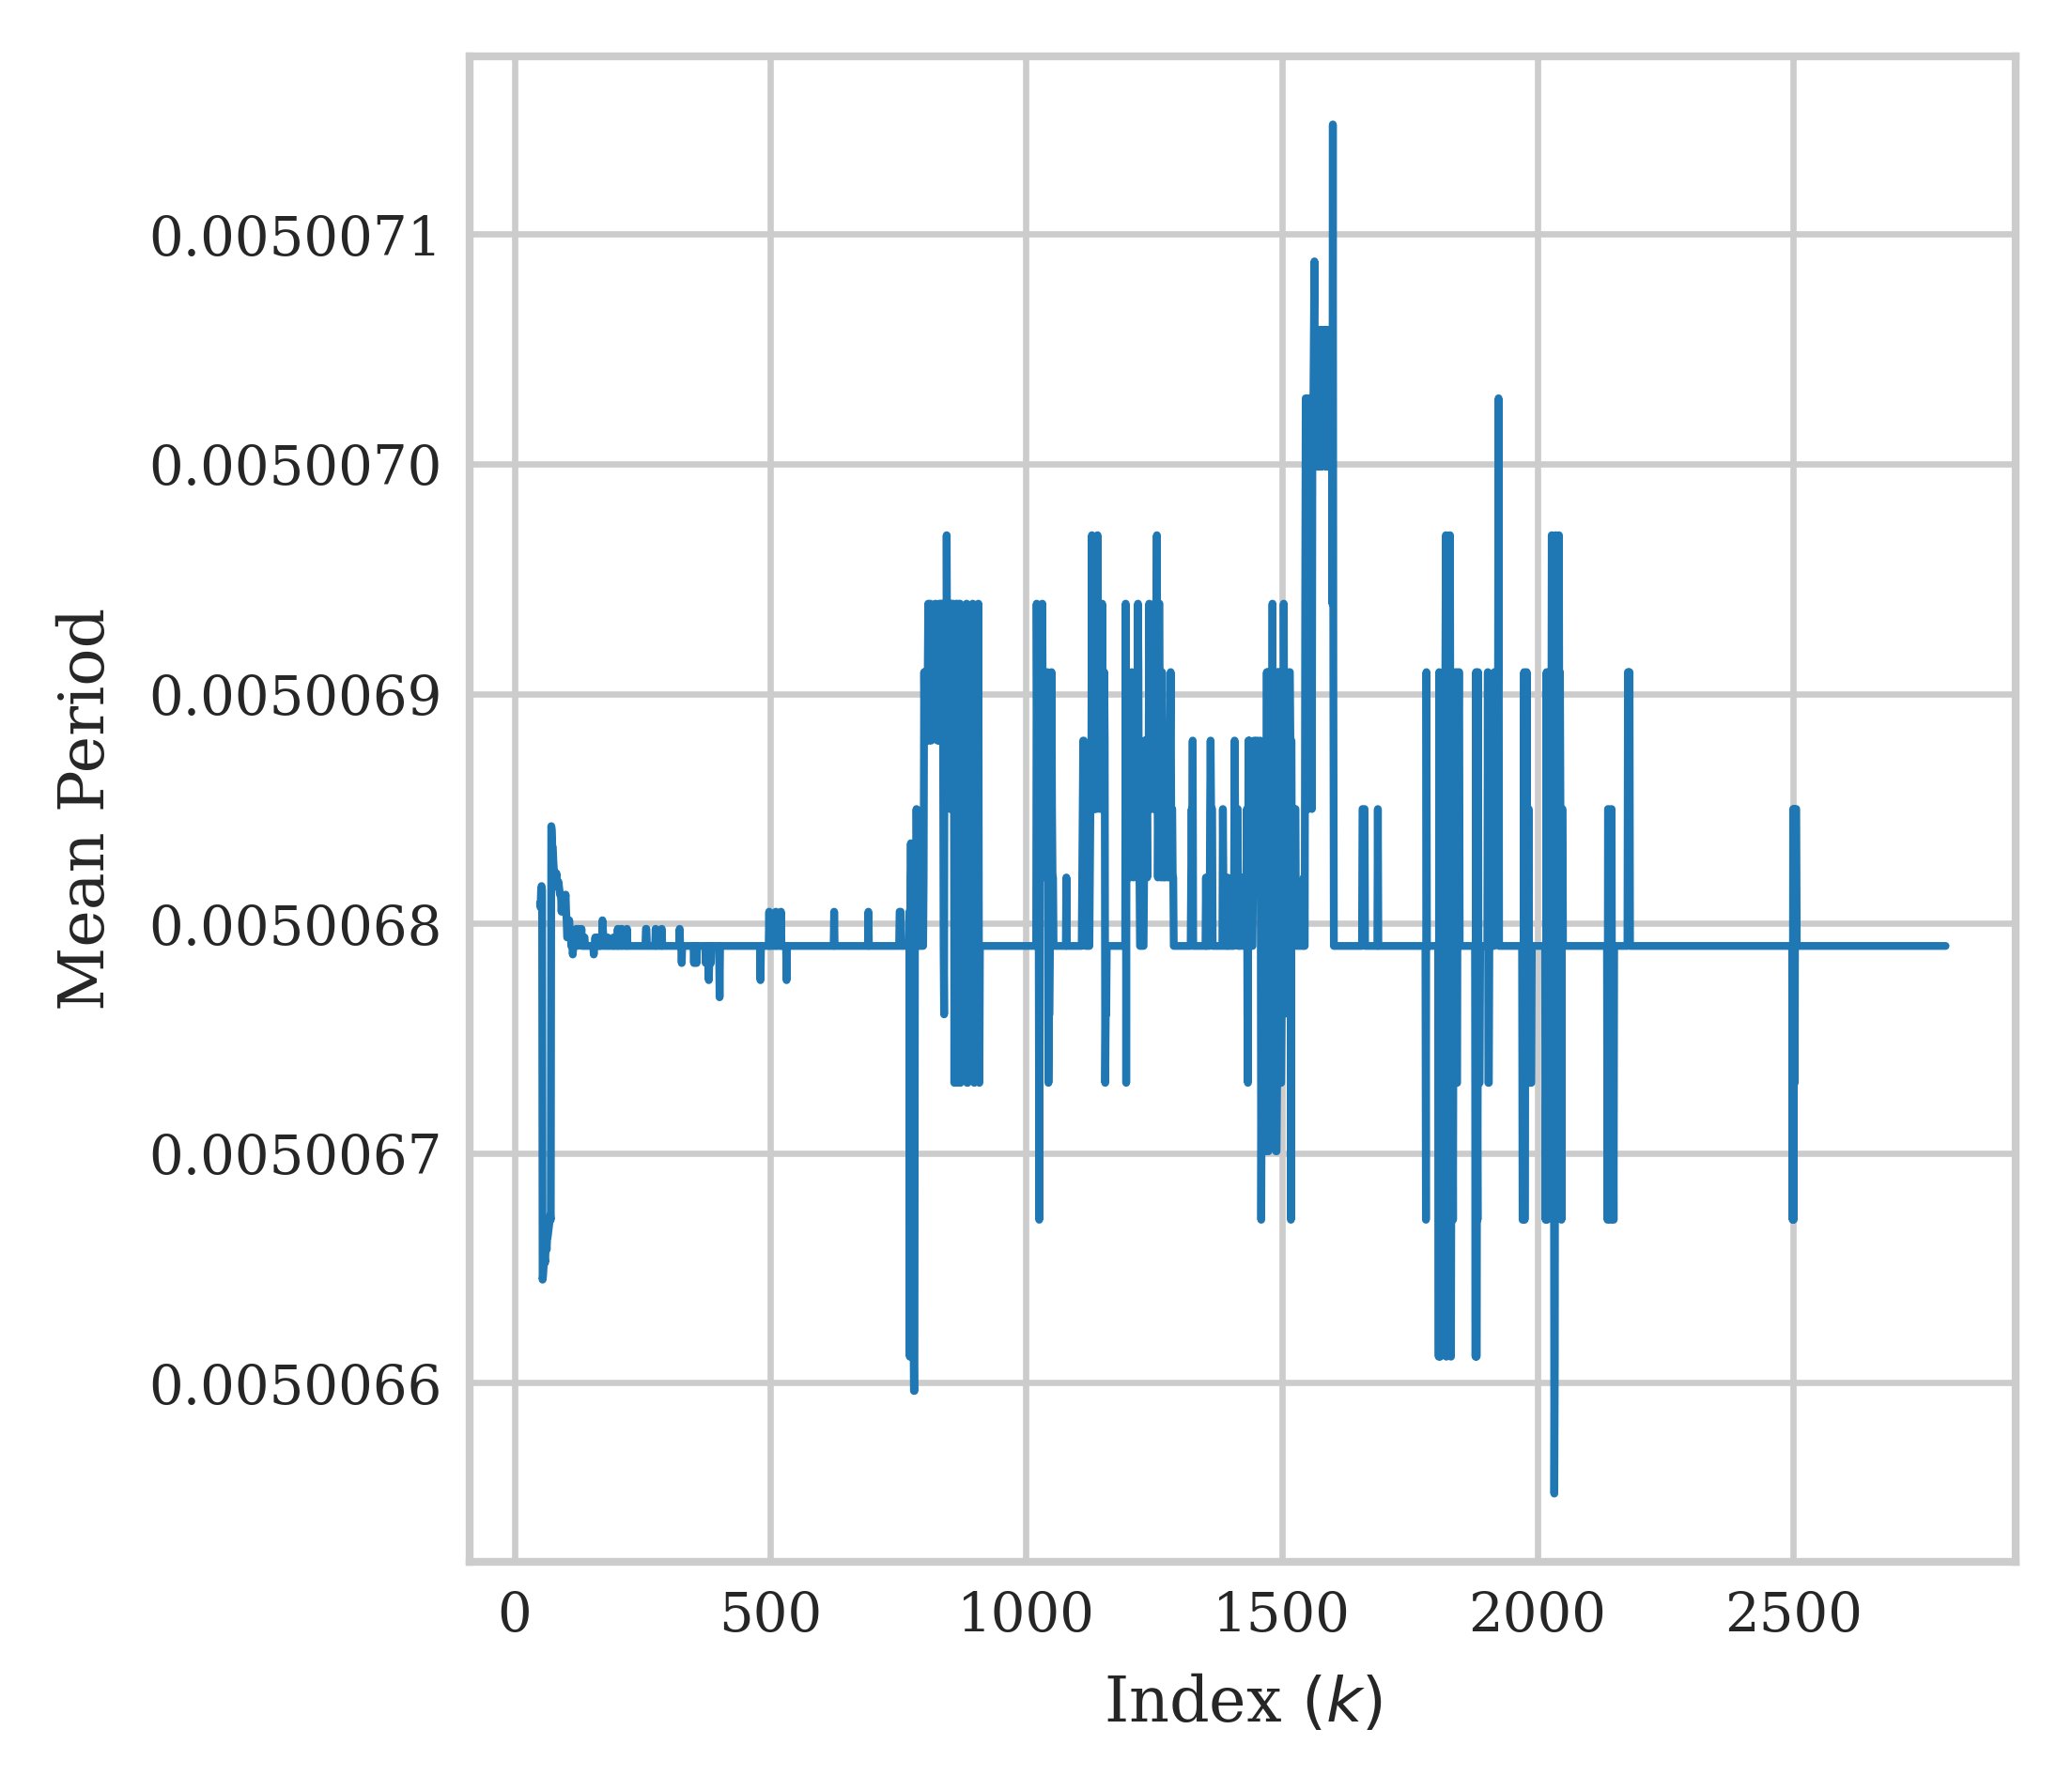

In [25]:
per_allexp=np.zeros((N_EXP,N,2800))
per_mean_allexp=np.zeros((N_EXP,2800))


# modulo=torch.tensor(time_exp[Expref,0,:,:])%per_mean_exp[Expref,0]
for exp in range (N_EXP):
    for ind in range(2800):
        if ind==0:
            per_allexp[exp,:,ind]=MAT_timenump[exp,0,:,ind]
            per_mean_allexp[exp,ind]=np.mean(per_allexp[exp,:,ind])
        else:
            per_allexp[exp,:,ind]=MAT_timenump[exp,0,:,ind]-MAT_timenump[exp,0,:,ind-1]
            per_mean_allexp[exp,ind]=np.mean(per_allexp[exp,:,ind])
            
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)

plt.plot(range(50,TT-1),(per_mean_allexp[0,50:TT-1]), linewidth=1)

plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('Mean Period', fontsize=8)

Text(0, 0.5, '$\\phi_i(k)$ mod $T_{c,DNN}(k)$')

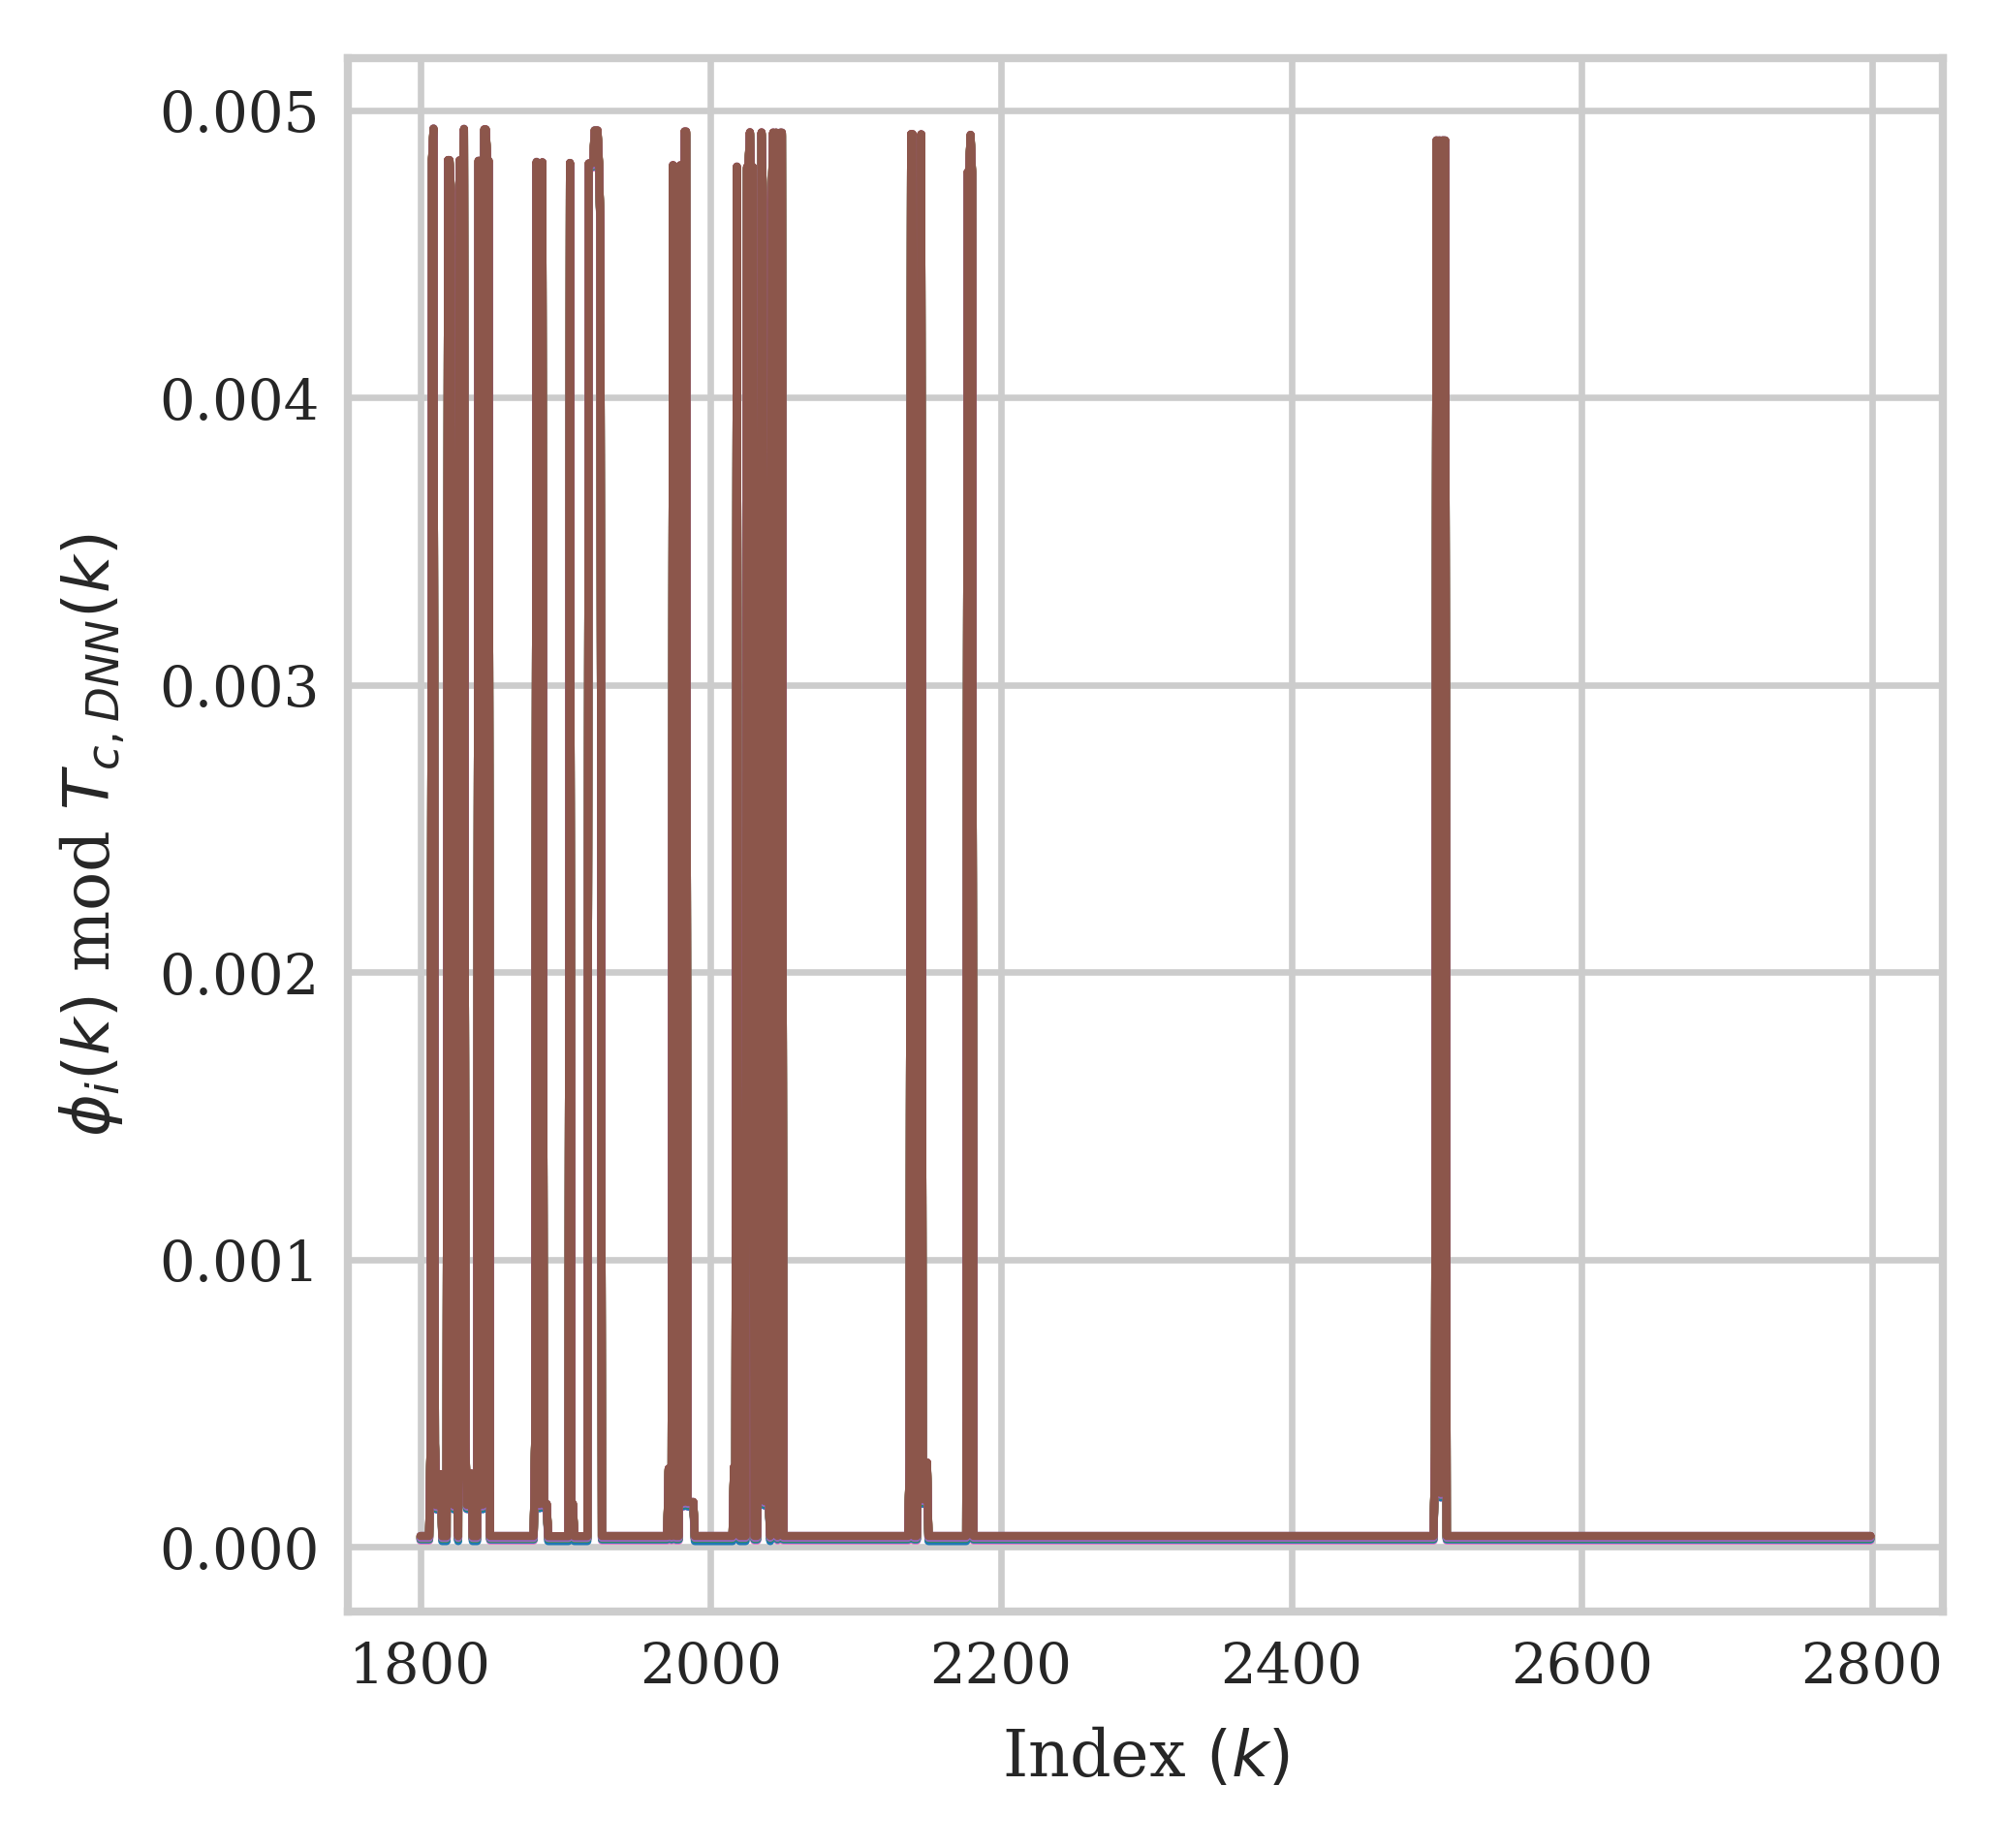

In [28]:
modulo=np.zeros((N,TT))

fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
# per_mean_exp[9,0]=torch.mean(torch.tensor(time_exp[exp,0,:,1215]-time_exp[exp,0,:,1214]))

for ind in range(TT):
    for node in range (N):
        modulo[node,ind]=MAT_timenump[0,0,node,ind]%per_mean_allexp[0,ind]
#         modulo[node,ind]=MAT_timenump[0,0,node,ind]%Time_res
        
for node in range(N):
    plt.plot(range(1800,TT),modulo[node,1800:TT], linewidth=1)
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('$\phi_i(k)$ mod $T_{c,DNN}(k)$', fontsize=8)
# plt.legend(['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16',],loc="upper left",fontsize='8')

Text(0.5, 0, 'Index $(k)$')

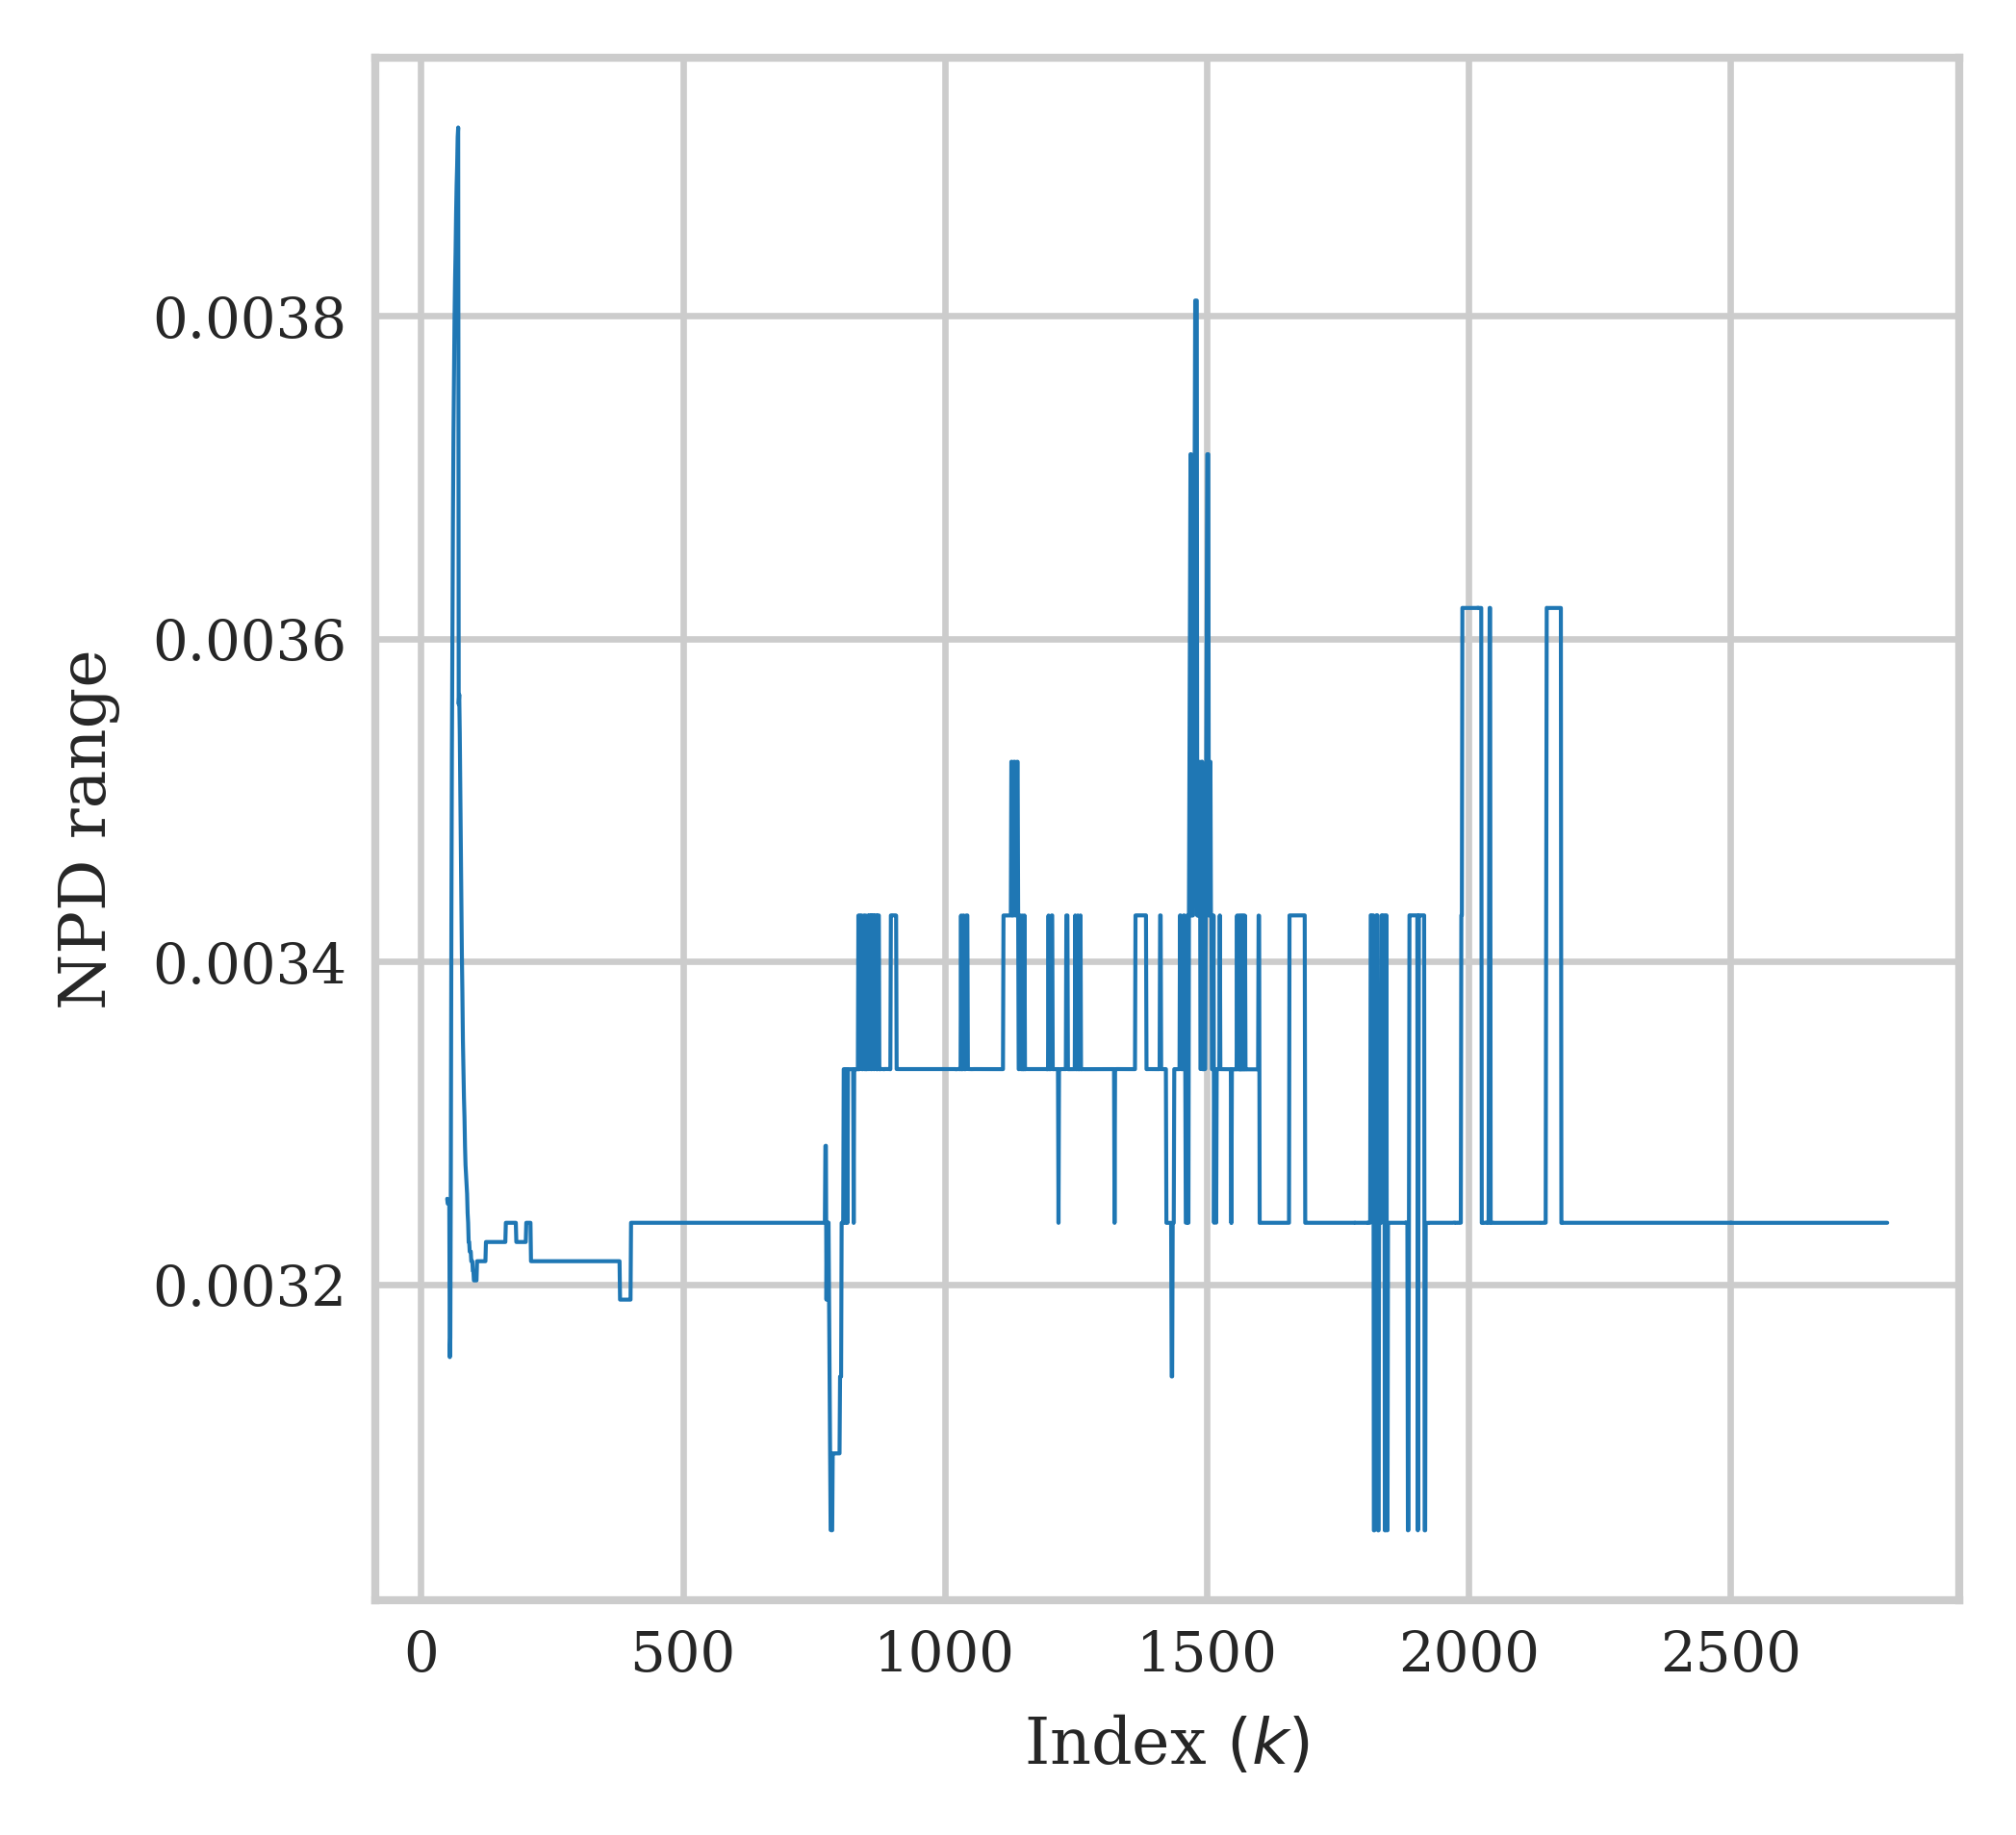

In [29]:
MAT_norm_delay=np.zeros([N,TT])
MAT_Delay_spread=np.zeros((1,TT))
for ind in range(TT):
    for node in range(N):
        MAT_norm_delay[node,ind]=(MAT_timenump[0,0,node,ind]-MAT_timenump[0,0,0,ind])/per_mean_allexp[0,ind]
    MAT_Delay_spread[0,ind]=np.amax(MAT_norm_delay[:,ind])-np.amin(MAT_norm_delay[:,ind])
fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
plt.plot(range(50,TT),torch.tensor(MAT_Delay_spread[0,50:TT]), linewidth=0.5)
plt.ylabel('NPD range', fontsize=8)
plt.xlabel('Index $(k)$', fontsize=8)
